**Ronaldlee Ejalu**  
**CSC 578:910**

# CSC 578 NN&DL Spring, 2022
## HW7: Image Classification using a CNN



This code is slightly modified from the TensorFlow tutorial [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets. Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.

Note that there are **three places** in the code, indicated with **IMPORTANT**, where you have to choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.

### Import Tensorflow
**IMPORTANT (1)**
Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)  # check the TF version!

2.8.0


In [ ]:
# For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

# For TF version 1 (need both lines)
# from tensorflow import keras
# from keras import datasets, layers, models

### Import Other packages

In [1]:
# import othe packages
import csv
import time
import pandas as pd
import numpy as np
from tensorflow.keras.regularizers import l1_l2, l1, l2
# for data Augmentation
from tensorflow.keras import Sequential 
from tensorflow.keras.utils import to_categorical # for processing the categorical labels

In [ ]:
EPOCHS = 30

In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 141 µs (started: 2022-05-28 15:03:20 +00:00)


### Mount the Google drive

In [ ]:
# mount my Google Drive
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive
time: 42.2 s (started: 2022-05-28 15:03:20 +00:00)


In [ ]:
# Change the working directory to hw7
import os
os.chdir('/content/drive/MyDrive/CSC578/hw7')

time: 234 ms (started: 2022-05-28 15:04:02 +00:00)


### Helper functions

In [ ]:
def writeResultsToCsv(predictions_L):
  """Function that writes the predictions Results to a csv file"""
  filePath = '/content/drive/MyDrive/CSC578/hw7/predictionResults.csv'
  with open(filePath, 'w') as csvFile:
    column_L = ['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
    # create a Writer object
    csvWriter = csv.writer(csvFile, delimiter=',' , quotechar='|', quoting=csv.QUOTE_MINIMAL) #lineterminator='\n'
    # write the header rows to the file 
    csvWriter.writerow(column_L)
    lineCnt = 1
    # loop through the list and write each item to a csv file
    for itemList in range(len(predictions_L)):
      csvWriter.writerow([lineCnt, predictions_L[itemList][0], predictions_L[itemList][1], predictions_L[itemList][2], 
          predictions_L[itemList][3], predictions_L[itemList][4], predictions_L[itemList][5], 
          predictions_L[itemList][6], predictions_L[itemList][7], predictions_L[itemList][8], predictions_L[itemList][9]])
      # increment lineCnt by 1
      lineCnt += 1 

time: 6.63 ms (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def generatePlot(history_D, titleStr='batch size'):
  """
  Function takes a dictionary of History callbacks and 
  plots line charts for the different mini batch sizes
  """
  # print('Training and validation loss line charts for the different mini batch sizes')
  # loop through the history dictionary to access the different items
  for key, value in history_D.items():
    # set the figure
    plt.figure(figsize=(10, 7))
    line_mse = plt.plot(range(0,EPOCHS), value.history['loss'], 'r')
    line_crossEntropy = plt.plot(range(0,EPOCHS), value.history['val_loss'], '#cdc50a')
    global hyperParam 
    hyperParam= titleStr
    if hyperParam == 'batch size':
      var_title = hyperParam

    elif hyperParam == 'learning rate':
      var_title = hyperParam

    elif hyperParam == 'l1 regularization with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l2 regularization with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l1 regularization applied within Dense layer with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l2 regularization applied within Dense layer with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l2 regularization applied within Convolutional and Dense layer with lambda value':
      var_title = hyperParam
    
    elif hyperParam == 'dropout value':
      var_title = hyperParam
    elif hyperParam == 'number_of_filters_used':
      var_title = hyperParam
    elif hyperParam == 'dense number units used are':
      var_title = hyperParam
    elif hyperParam == 'size of filter used':
      var_title = hyperParam
    elif hyperParam == 'stride used is':
      var_title = hyperParam
    plt.title('Train vs. Validation loss: when ' + var_title +' = ' + str(key))
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.legend(['Training loss', 'validation loss'])
    print('\n')

time: 20.1 ms (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def generate_accuracy_Plot(history_D, titleStr='batch size'):
  """
  Function takes a dictionary of History callbacks and 
  plots line charts for the different mini batch sizes
  """
  #print('Training and validation loss line charts for the different mini batch sizes')
  # loop through the history dictionary to access the different items
  for key, value in history_D.items():
    # set the figure
    plt.figure(figsize=(10, 7))
    line_mse = plt.plot(range(0,EPOCHS), value.history['accuracy'], 'r')
    line_crossEntropy = plt.plot(range(0,EPOCHS), value.history['val_accuracy'], '#cdc50a')
    global hyperParam 
    hyperParam= titleStr
    if hyperParam == 'batch size':
      var_title = hyperParam

    elif hyperParam == 'learning rate':
      var_title = hyperParam

    elif hyperParam == 'l1 regularization with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l2 regularization with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l1 regularization applied within Dense layer with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l2 regularization applied within Dense layer with lambda value':
      var_title = hyperParam

    elif hyperParam == 'l2 regularization applied within Convolutional and Dense layer with lambda value':
      var_title = hyperParam
    
    elif hyperParam == 'dropout value':
      var_title = hyperParam
    elif hyperParam == 'number_of_filters_used':
      var_title = hyperParam
    elif hyperParam == 'dense number units used are':
      var_title = hyperParam
    elif hyperParam == 'size of filter used':
      var_title = hyperParam
    elif hyperParam == 'stride used is':
      var_title = hyperParam
    plt.title('Train vs. Validation accuracy: when ' + var_title +' = ' + str(key))
    plt.ylabel('accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training accuracy', 'validation accuracy'])
    print('\n')

time: 20.5 ms (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def buildbestModel(mini_batch_size=64, eta=None, lambda_v=None, dropout=None, added_CNN_layer=None):
  """A function that returns the model's history"""
  v_added_CNN_layers = added_CNN_layer
  #seed = 7 
  if v_added_CNN_layers == 'Added more Convolution layers':
    print('Debugging if statement: %s' %v_added_CNN_layers)
    model = models.Sequential()
      
    model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(lambda_v),input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    
    model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    
    model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    # first dropout
    model.add(layers.Dropout(dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))

    # last dropout
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(10, activation='softmax'))  # As noted above
    model.summary()

  elif lambda_v is None:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # As noted above

  elif lambda_v is not None and dropout is not None:
    print('lambda and dropout are not null')

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(lambda_v),input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_v), activation='relu'))

    # first dropout
    model.add(layers.Dropout(dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))

    # last dropout
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(10, activation='softmax'))  # As noted above

  else:
    print('lambda_v is not null')
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(lambda_v),input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_v), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # As noted above

  # if dropout is None:


  learningRate = eta
  if learningRate is None :
    # compile the model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  else:
    # set the learning rate
    print('learning rate is given')
    opt = tf.keras.optimizers.Adam(learning_rate=learningRate)
    model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=mini_batch_size, 
                      validation_data=(valid_images, valid_labels))
  return history

time: 120 ms (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def saveModel(modelName):
  """Function that saves the current model for future use"""
  model.save(modelName)

time: 996 µs (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def load_saved_model(modelName):
  """Function that returns the saved model"""
  return tf.keras.models.load_model(modelName)

time: 1.29 ms (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, columnName):
  """A function that returns pandas data frames for losss, accuracy and run time execution"""
  column_Name = columnName
  if column_Name == 'Mini-batch-size':
    hyperParamName = column_Name
  elif column_Name == 'learningRate':
    hyperParamName = column_Name
  elif column_Name == 'lambda':
    hyperParamName = column_Name
  elif columnName == 'dropout':
    hyperParamName = columnName
  elif columnName == 'filter_pairs_used':
    hyperParamName = columnName
  elif columnName == 'number_of_units_used':
    hyperParamName = columnName
  elif columnName == 'size_of_filter':
    hyperParamName = columnName
  elif columnName == 'size_of_stride':
    hyperParamName = columnName
  # build the loss data frame
  val_loss_df = pd.DataFrame(val_loss_L, columns = [hyperParamName, 'val_loss'])
  # build the accuracy data frame
  val_accuracy_df = pd.DataFrame(val_accuracy_L, columns = [hyperParamName,'val_accuracy_L'])
  # build the run time data frame
  recordTime_df = pd.DataFrame(recordTime_L, columns = [hyperParamName, 'Time in seconds'])
  return val_loss_df, val_accuracy_df, recordTime_df

time: 8.06 ms (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def deriveAccuracy_df(train_loss_L, train_accuracy_L, columnName):
  """Function that derives and returns the train loss and accuracy data frames"""
  column_Name = columnName
  if columnName == 'size_of_stride':
    hyperParamName = columnName
  elif columnName == 'filter_pairs_used':
    hyperParamName = columnName
  elif columnName == 'number_of_units_used':
      hyperParamName = columnName
  elif columnName == 'dropout':
    hyperParamName = columnName

  train_loss_df = pd.DataFrame(train_loss_L, columns = [hyperParamName, 'train_loss'])
  train_accuracy_df = pd.DataFrame(train_accuracy_L, columns = [hyperParamName, 'train_accuracy'])
  return train_loss_df, train_accuracy_df

time: 4.28 ms (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
def deriveLossAccuracyLineCharts(history, plottitle=None):
  """Function that plot the line charts for the loss and accuracy of the model"""
  history = history
  titleStr = plottitle

  if titleStr == 'Accuracy & loss vs Number of epochs when Nadam optimizer is used':
    title_param = titleStr
  else:
    title_param = 'Accuracy & loss vs Number of epochs when Adam optimizer is used'
  plt.figure(figsize=(10, 7))
  line_mse = plt.plot(range(0,EPOCHS), history['loss'], 'r')
  line_accuracy = plt.plot(range(0,EPOCHS), history['accuracy'],linestyle = 'dashed', color = 'b')
  line_crossEntropy = plt.plot(range(0,EPOCHS), history['val_loss'], '#cdc50a')
  line_valaccuracy = plt.plot(range(0,EPOCHS), history['val_accuracy'], linestyle = 'dashed', color='#7CFC00')
  plt.title(title_param)
  plt.ylabel('Loss/Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training loss', 'Training accuracy', 'validation loss', 'validation accuracy'])
  print('\n')

time: 7.61 ms (started: 2022-05-28 15:04:03 +00:00)


### Download and prepare the CIFAR10 dataset¶

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.


In [ ]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step
time: 8.05 s (started: 2022-05-28 15:04:03 +00:00)


In [ ]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)


time: 257 ms (started: 2022-05-28 21:12:43 +00:00)


In [ ]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

time: 261 ms (started: 2022-05-28 21:12:48 +00:00)


In [ ]:
train_labels

array([[1],
       [2],
       [7],
       ...,
       [6],
       [2],
       [6]], dtype=uint8)

time: 4.86 ms (started: 2022-05-28 15:04:12 +00:00)


In [ ]:
valid_labels

array([[1],
       [5],
       [5],
       ...,
       [2],
       [1],
       [4]], dtype=uint8)

time: 5.09 ms (started: 2022-05-28 15:04:12 +00:00)


### Verify the data
To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.

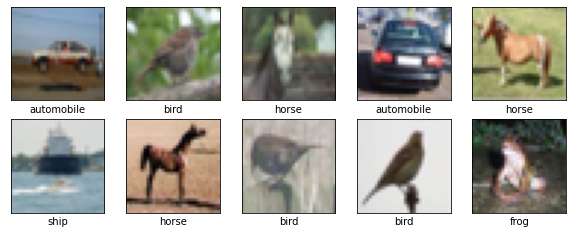

time: 383 ms (started: 2022-05-28 15:04:12 +00:00)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional network
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3). The output layer has 10 nodes, corresponding to the number of categories of the images.

In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2 compatible with TF1's 'sparse_categorical_crossentropy' loss function).

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

time: 4.84 s (started: 2022-05-28 15:04:12 +00:00)


Verify the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compile the model
**IMPORTANT (2)** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])


time: 18.2 ms (started: 2022-05-28 15:04:17 +00:00)


### Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 17s 4ms/step - loss: 1.5525 - accuracy: 0.4331 - val_loss: 1.2937 - val_accuracy: 0.5340
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1777 - accuracy: 0.5826 - val_loss: 1.1235 - val_accuracy: 0.5978
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0270 - accuracy: 0.6360 - val_loss: 0.9949 - val_accuracy: 0.6499
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9289 - accuracy: 0.6756 - val_loss: 0.9291 - val_accuracy: 0.6746
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8538 - accuracy: 0.7016 - val_loss: 0.9004 - val_accuracy: 0.6870
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7936 - accuracy: 0.7231 - val_loss: 0.8888 - val_accuracy: 0.6922
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7427 - accuracy: 0.7394 - val_loss: 0.8696 - val_accuracy

### Evaluate the model
**IMPORTANT (3)** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 1s - loss: 0.9123 - accuracy: 0.6977 - 656ms/epoch - 2ms/step
valid_accuracy=0.697700023651123, valid_loss=0.9122805595397949


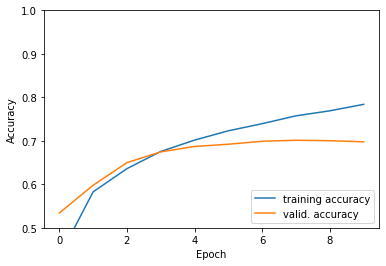

time: 1.05 s (started: 2022-05-28 15:05:18 +00:00)


In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [ ]:
# save our model for future use
model.save('CNN_image_classification.model')

INFO:tensorflow:Assets written to: CNN_image_classification.model/assets
time: 2.12 s (started: 2022-05-28 15:05:19 +00:00)


In [ ]:
# loading the saved model
savedModel = tf.keras.models.load_model('CNN_image_classification.model')

time: 602 ms (started: 2022-05-28 15:05:21 +00:00)


### TO DO (by you): Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax. You should generate predictions and create/write a KAGGLE submission file.

In [ ]:
# let's make a prediction
predictions = savedModel.predict([test_images])
#type(predictions)

time: 789 ms (started: 2022-05-28 15:05:21 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

time: 5.4 ms (started: 2022-05-28 15:05:22 +00:00)


### Writing the Predictions to a csv file

In [ ]:
# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 672 ms (started: 2022-05-28 15:05:22 +00:00)


# Hyperparameter Tuning

## mini-batch size

<p>These are the number of training examples at a time the network for
training. The choice of the mini‐batch size should relatively be independent of other
hyper‐parameters.Too small of a size , you don’t take full advantage of the benefits of
the matrix libraries optimized for Hardware like how Michael Nielsen mentions in the
NNDL book and too large, you are simply not updating your weights often enough.
So, trying out different values of 5, 15, 25, 32, 64 and 100.</p>

In [ ]:
# we create a list of mini-batch size with the following values [5, 15, 25, 32, 64, 100]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
mini_batch_size_L = [8, 16,  32, 64, 100]
recordTime_L = []                             # list of run time execution for each mini batch size
for batch_size in range(len(mini_batch_size_L)):
  
  print(mini_batch_size_L[batch_size])
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  # compile the model
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=mini_batch_size_L[batch_size], validation_data=(valid_images, valid_labels)
                      )
  # endtime
  endTime = time.time()

  recordTime_L.append((mini_batch_size_L[batch_size], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[mini_batch_size_L[batch_size]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([mini_batch_size_L[batch_size], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([mini_batch_size_L[batch_size], val_acc])

8
Epoch 1/30
5000/5000 [==============================] - 17s 3ms/step - loss: 1.5562 - accuracy: 0.4316 - val_loss: 1.4520 - val_accuracy: 0.4895
Epoch 2/30
5000/5000 [==============================] - 16s 3ms/step - loss: 1.2202 - accuracy: 0.5648 - val_loss: 1.1856 - val_accuracy: 0.5888
Epoch 3/30
5000/5000 [==============================] - 16s 3ms/step - loss: 1.0786 - accuracy: 0.6191 - val_loss: 1.0136 - val_accuracy: 0.6498
Epoch 4/30
5000/5000 [==============================] - 16s 3ms/step - loss: 0.9831 - accuracy: 0.6533 - val_loss: 0.9895 - val_accuracy: 0.6606
Epoch 5/30
5000/5000 [==============================] - 16s 3ms/step - loss: 0.9105 - accuracy: 0.6794 - val_loss: 0.9333 - val_accuracy: 0.6731
Epoch 6/30
5000/5000 [==============================] - 16s 3ms/step - loss: 0.8453 - accuracy: 0.7030 - val_loss: 0.9809 - val_accuracy: 0.6676
Epoch 7/30
5000/5000 [==============================] - 16s 3ms/step - loss: 0.7882 - accuracy: 0.7232 - val_loss: 0.9693 - val_

In [ ]:
for key, value in history_D.items():
  print(key, value.history.keys())

8 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
16 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
32 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
64 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
100 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
time: 1.57 ms (started: 2022-05-28 15:22:14 +00:00)


In [ ]:
val_loss_L

[[8, 1.95237398147583],
 [16, 2.0075111389160156],
 [32, 1.5079542398452759],
 [64, 1.5473932027816772],
 [100, 1.228263258934021]]

time: 2.56 ms (started: 2022-05-28 15:22:14 +00:00)


In [ ]:
val_accuracy_L

[[8, 0.6496000289916992],
 [16, 0.65420001745224],
 [32, 0.6844000220298767],
 [64, 0.7024000287055969],
 [100, 0.6991000175476074]]

time: 3.37 ms (started: 2022-05-28 15:22:14 +00:00)


In [ ]:
recordTime_L

[(8, 482.8073089122772),
 (16, 252.0491976737976),
 (32, 141.76065754890442),
 (64, 78.34905219078064),
 (100, 50.542675256729126)]

time: 3.56 ms (started: 2022-05-28 15:22:14 +00:00)


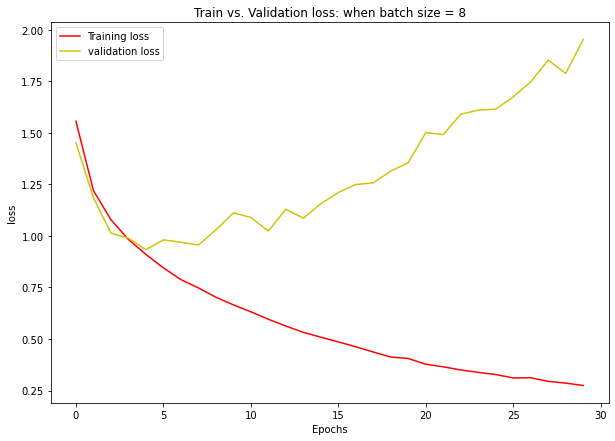

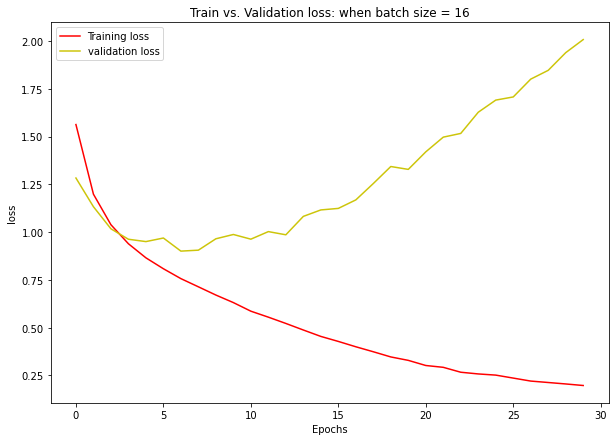

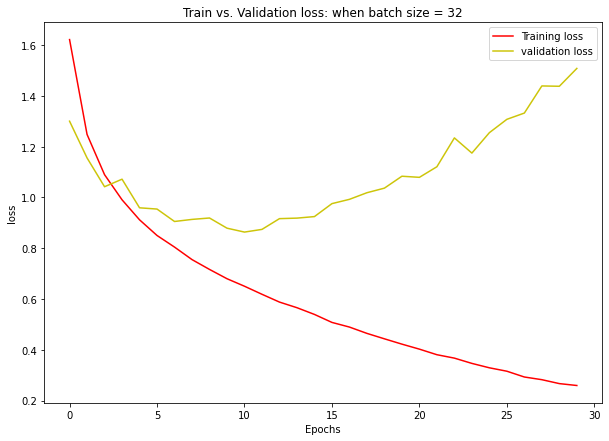

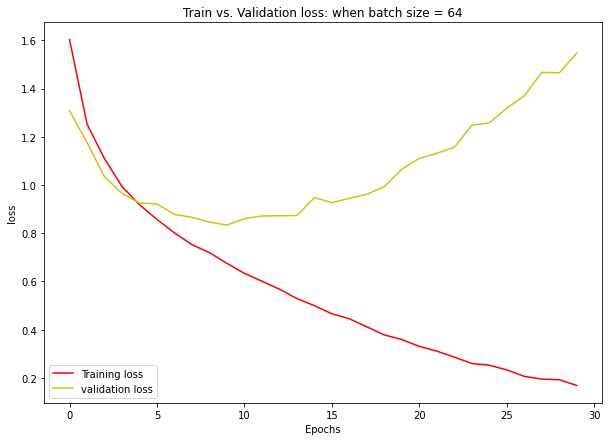

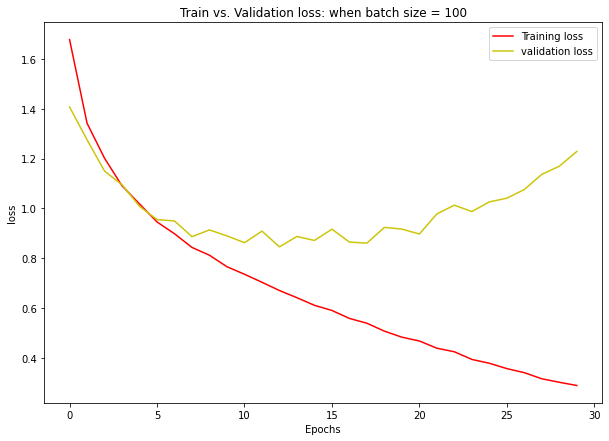

time: 1 s (started: 2022-05-28 15:22:14 +00:00)


In [ ]:
# a helper function used to print the line charts for the different mini batch sizes
generatePlot(history_D, 'batch size')

In [ ]:
# create different pandas data frames
val_loss_df = pd.DataFrame(val_loss_L, columns = ['Mini-batch-size', 'val_loss'])
val_loss_df

Mini-batch-size  val_loss
0                8  1.952374
1               16  2.007511
2               32  1.507954
3               64  1.547393
4              100  1.228263

time: 14.6 ms (started: 2022-05-28 15:22:15 +00:00)


In [ ]:
val_accuracy_df = pd.DataFrame(val_accuracy_L, columns = ['Mini-batch-size','val_accuracy_L'])
val_accuracy_df

Mini-batch-size  val_accuracy_L
0                8          0.6496
1               16          0.6542
2               32          0.6844
3               64          0.7024
4              100          0.6991

time: 273 ms (started: 2022-05-28 15:22:15 +00:00)


In [ ]:
recordTime_df = pd.DataFrame(recordTime_L, columns = ['Mini-batch-size', 'Time in seconds'])
recordTime_df

Mini-batch-size  Time in seconds
0                8       482.807309
1               16       252.049198
2               32       141.760658
3               64        78.349052
4              100        50.542675

time: 7.48 ms (started: 2022-05-28 15:22:16 +00:00)


<p>Mini-batch-size of 100 is the best value since it has a low validation loss value and it takes 35 seconds to train the network. </p>

### let's train a model with the mini-batch-size of 100

In [ ]:
# let's train the model with the mini-batch-size of 100
model.history = buildbestModel(100)

Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 1.7172 - accuracy: 0.3702 - val_loss: 1.4517 - val_accuracy: 0.4719
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3749 - accuracy: 0.5066 - val_loss: 1.2480 - val_accuracy: 0.5605
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2358 - accuracy: 0.5637 - val_loss: 1.1761 - val_accuracy: 0.5853
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1229 - accuracy: 0.6038 - val_loss: 1.0617 - val_accuracy: 0.6251
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0424 - accuracy: 0.6349 - val_loss: 1.0616 - val_accuracy: 0.6249
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 0.9729 - accuracy: 0.6589 - val_loss: 0.9719 - val_accuracy: 0.6572
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 0.9137 - accuracy: 0.6815 - val_loss: 0.9759 - val_accuracy: 0.6626
Epoch 

### Save the model to the drive and reload it. 

In [ ]:
# helper function that saves the current model to the file system.
saveModel('CNN_image_classification.model')

INFO:tensorflow:Assets written to: CNN_image_classification.model/assets
time: 776 ms (started: 2022-05-28 15:23:06 +00:00)


In [ ]:
# helper function that loads the saved model
savedModel = load_saved_model('CNN_image_classification.model')

time: 355 ms (started: 2022-05-28 15:23:07 +00:00)


### Make the predictions and write the results to a csv file

In [ ]:
# let's make the required predictions
predictions = savedModel.predict([test_images])
#type(predictions)

time: 756 ms (started: 2022-05-28 15:23:07 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

time: 6.72 ms (started: 2022-05-28 15:23:08 +00:00)


In [ ]:
# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 171 ms (started: 2022-05-28 15:23:08 +00:00)


## learning rate

<p>Running the network with the different values of 0.5, 0.25, 0.025 and 0.002</p>

In [ ]:
# we create a list of learning rate with the following values [0.5, 0.25, 0.025, 0.002]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
learningRate_L = [0.5, 0.25, 0.025, 0.002, 0.001]
recordTime_L = []                             # list of run time execution for each mini batch size
for eta in range(len(learningRate_L)):
  
  # print(learningRate_L[eta])
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  opt = tf.keras.optimizers.Adam(learning_rate=learningRate_L[eta])
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((learningRate_L[eta], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[learningRate_L[eta]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([learningRate_L[eta], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([learningRate_L[eta], val_acc])

Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 20660.8281 - accuracy: 0.1022 - val_loss: 2.3120 - val_accuracy: 0.1000
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3276 - accuracy: 0.1013 - val_loss: 2.3458 - val_accuracy: 0.1000
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3260 - accuracy: 0.1027 - val_loss: 2.3235 - val_accuracy: 0.1000
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3283 - accuracy: 0.1020 - val_loss: 2.3627 - val_accuracy: 0.1000
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3350 - accuracy: 0.1006 - val_loss: 2.3643 - val_accuracy: 0.1000
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3335 - accuracy: 0.0984 - val_loss: 2.3337 - val_accuracy: 0.1000
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3298 - accuracy: 0.1001 - val_loss: 2.3313 - val_accuracy: 0.1000
Ep

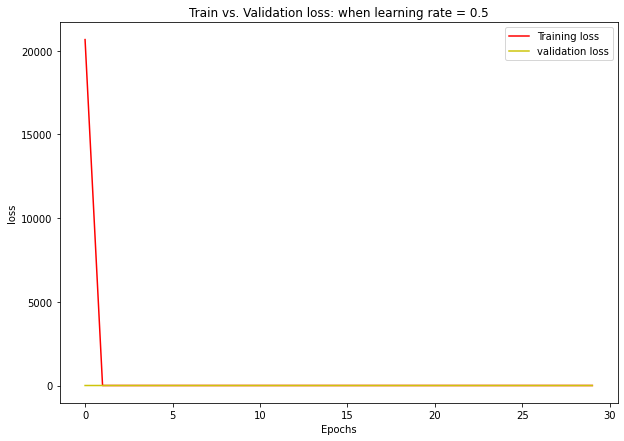

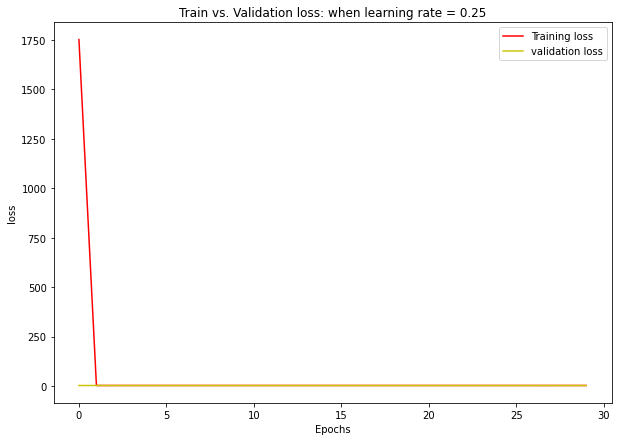

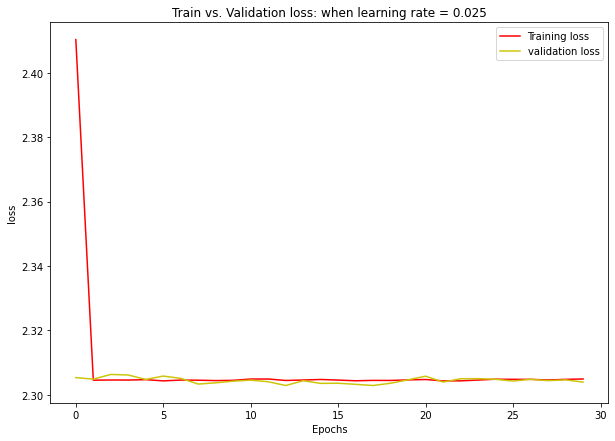

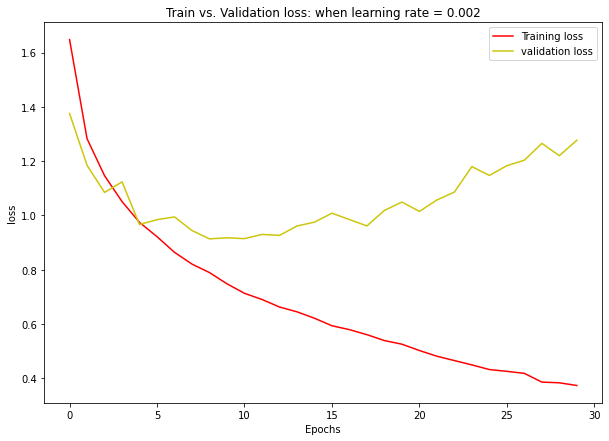

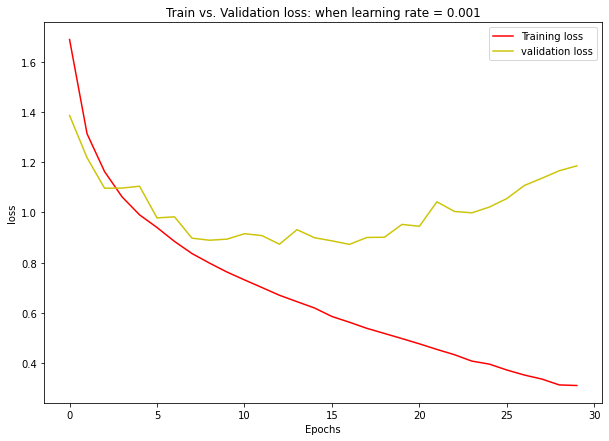

time: 1.38 s (started: 2022-05-28 15:27:31 +00:00)


In [ ]:
# a helper function used to print the line charts for the different mini batch sizes
generatePlot(history_D, 'learning rate')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'learningRate')

time: 2.43 ms (started: 2022-05-28 15:27:33 +00:00)


In [ ]:
val_loss_df

learningRate  val_loss
0         0.500  2.313286
1         0.250  2.314390
2         0.025  2.303901
3         0.002  1.276839
4         0.001  1.185140

time: 5.97 ms (started: 2022-05-28 15:27:33 +00:00)


In [ ]:
val_accuracy_df

learningRate  val_accuracy_L
0         0.500          0.1000
1         0.250          0.1000
2         0.025          0.1000
3         0.002          0.6768
4         0.001          0.7056

time: 6.06 ms (started: 2022-05-28 15:27:33 +00:00)


In [ ]:
recordTime_df

learningRate  Time in seconds
0         0.500        50.700688
1         0.250        50.261792
2         0.025        50.936379
3         0.002        52.965374
4         0.001        51.832599

time: 5.3 ms (started: 2022-05-28 15:27:33 +00:00)


<p>We see that the learning rate of 0.001 has the lowest validation loss and from the line chart above, we notice that validation loss is higher than training loss with less overfitting.</p>

### let's train a model with a learning rate of 0.001 and mini-batch-size of 100

In [ ]:
model_history = buildbestModel(1000, 0.001)

learning rate is given
Epoch 1/30
40/40 [==============================] - 1s 20ms/step - loss: 2.0149 - accuracy: 0.2546 - val_loss: 1.7548 - val_accuracy: 0.3598
Epoch 2/30
40/40 [==============================] - 1s 13ms/step - loss: 1.6860 - accuracy: 0.3865 - val_loss: 1.5727 - val_accuracy: 0.4250
Epoch 3/30
40/40 [==============================] - 1s 13ms/step - loss: 1.5441 - accuracy: 0.4390 - val_loss: 1.4681 - val_accuracy: 0.4706
Epoch 4/30
40/40 [==============================] - 1s 13ms/step - loss: 1.4494 - accuracy: 0.4781 - val_loss: 1.3825 - val_accuracy: 0.5045
Epoch 5/30
40/40 [==============================] - 1s 13ms/step - loss: 1.3603 - accuracy: 0.5127 - val_loss: 1.3554 - val_accuracy: 0.5116
Epoch 6/30
40/40 [==============================] - 1s 13ms/step - loss: 1.3311 - accuracy: 0.5248 - val_loss: 1.3124 - val_accuracy: 0.5288
Epoch 7/30
40/40 [==============================] - 1s 13ms/step - loss: 1.2838 - accuracy: 0.5436 - val_loss: 1.2698 - val_accurac

### Save the model to the drive and reload it. 

In [ ]:
# helper function that saves the current model to the file system.
saveModel('CNN_image_classification.model')

INFO:tensorflow:Assets written to: CNN_image_classification.model/assets
time: 801 ms (started: 2022-05-28 15:27:50 +00:00)


In [ ]:
# helper function that loads the saved model
savedModel = load_saved_model('CNN_image_classification.model')

time: 369 ms (started: 2022-05-28 15:27:51 +00:00)


### Make the predictions and write the results to a csv file

In [ ]:
# let's make the required predictions
predictions = savedModel.predict([test_images])

time: 741 ms (started: 2022-05-28 15:27:51 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

time: 8.98 ms (started: 2022-05-28 15:27:52 +00:00)


In [ ]:
# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 156 ms (started: 2022-05-28 15:27:52 +00:00)


## Regularization

### L1 regularization within the Convolutional layers

<p>Using the various values of 1, 0.1, 0.01, 0.001 and 0.0001, we use <b>L1</b> regularization to train the network.</p>

In [ ]:
# we create a list of lambdas with the following values [1, 0.1, 0.01, 0.001, 0.0001]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
lambda_L = [1, 0.1, 0.01, 0.001, 0.0001]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(lambda_L)):
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1(lambda_L[fact]),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l1(lambda_L[fact]), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l1(lambda_L[fact]), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((lambda_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[lambda_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([lambda_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([lambda_L[fact], val_acc])

Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 157.0978 - accuracy: 0.1016 - val_loss: 9.2765 - val_accuracy: 0.1000
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 9.2925 - accuracy: 0.0986 - val_loss: 9.2546 - val_accuracy: 0.1000
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 9.2918 - accuracy: 0.0961 - val_loss: 9.2739 - val_accuracy: 0.1000
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 9.2917 - accuracy: 0.0975 - val_loss: 9.3001 - val_accuracy: 0.1000
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 9.2920 - accuracy: 0.0988 - val_loss: 9.2396 - val_accuracy: 0.1000
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 9.2914 - accuracy: 0.0993 - val_loss: 9.2958 - val_accuracy: 0.1000
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 9.2911 - accuracy: 0.0985 - val_loss: 9.2650 - val_accuracy: 0.1000
Epoc

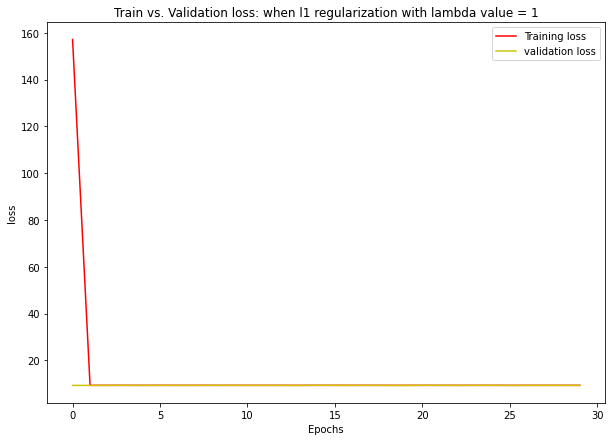

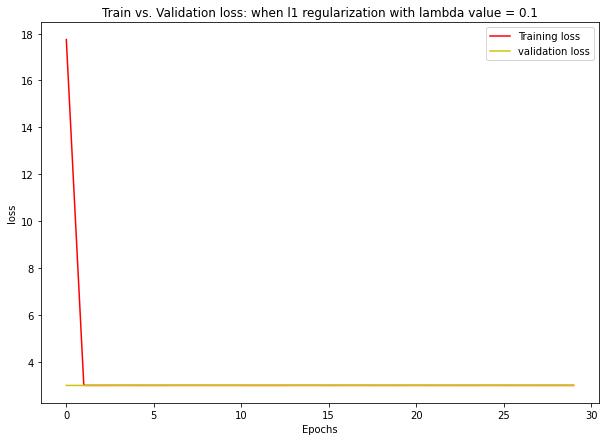

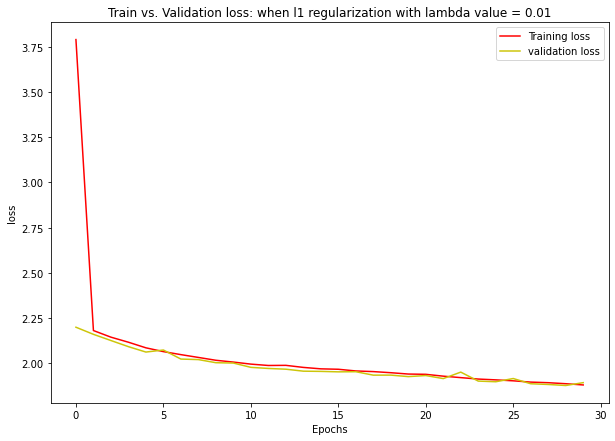

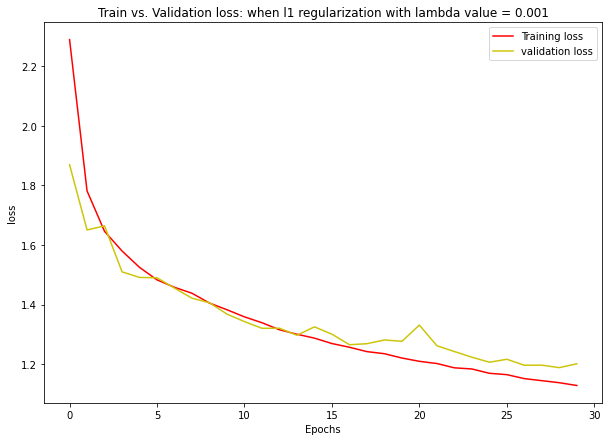

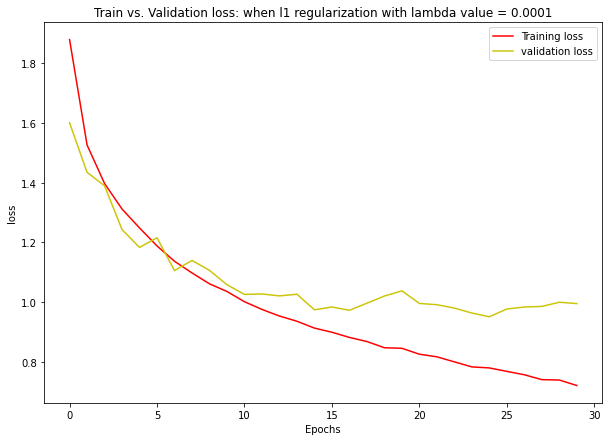

time: 1.13 s (started: 2022-05-28 15:32:19 +00:00)


In [ ]:
# a helper function used to print the line charts for the different mini batch sizes
generatePlot(history_D, 'l1 regularization with lambda value')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'lambda')

time: 2.88 ms (started: 2022-05-28 15:32:20 +00:00)


In [ ]:
val_loss_df

lambda  val_loss
0  1.0000  9.268972
1  0.1000  2.993785
2  0.0100  1.892821
3  0.0010  1.200979
4  0.0001  0.995192

time: 7.49 ms (started: 2022-05-28 15:32:20 +00:00)


In [ ]:
val_accuracy_df

lambda  val_accuracy_L
0  1.0000          0.1000
1  0.1000          0.1000
2  0.0100          0.3605
3  0.0010          0.6350
4  0.0001          0.7056

time: 6.23 ms (started: 2022-05-28 15:32:20 +00:00)


In [ ]:
recordTime_df

lambda  Time in seconds
0  1.0000        51.369052
1  0.1000        51.490415
2  0.0100        51.464931
3  0.0010        52.237669
4  0.0001        54.103694

time: 6.27 ms (started: 2022-05-28 15:32:20 +00:00)


<p>With L1 regularization we see that when lambda = 0.001, the validation loss is higher than the training loss and there is less overfitting when you compare to other values of lambda.</p>

### L2 regularization within the Convolutional layers

In [ ]:
# we create a list of lambdas with the following values [1, 0.1, 0.01, 0.001, 0.0001]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
lambda_L = [1, 0.1, 0.01, 0.001, 0.0001]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(lambda_L)):
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(lambda_L[fact]),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_L[fact]), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_L[fact]), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((lambda_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[lambda_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([lambda_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([lambda_L[fact], val_acc])

Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 8.5985 - accuracy: 0.1050 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/30
400/400 [==============================] - 2s 5ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0959 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
400/400 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0947 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

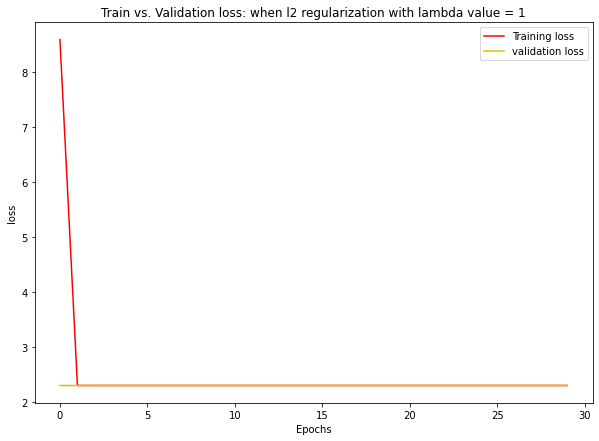

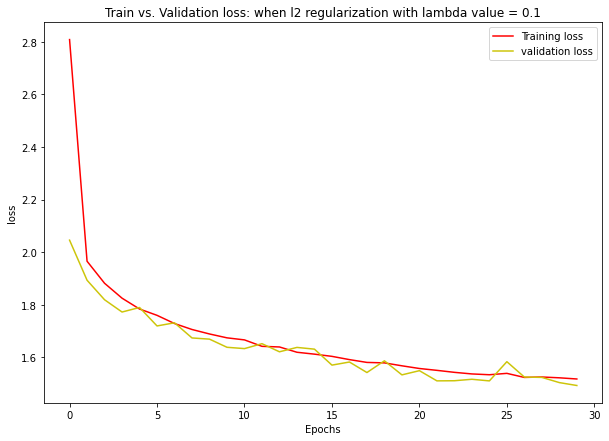

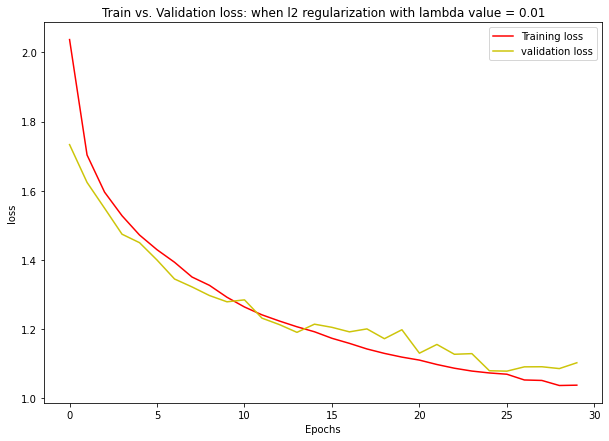

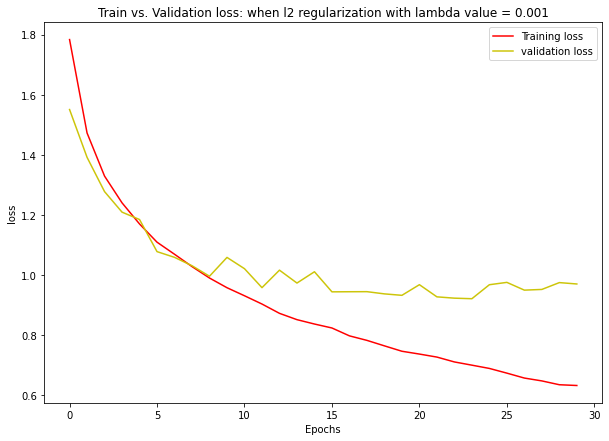

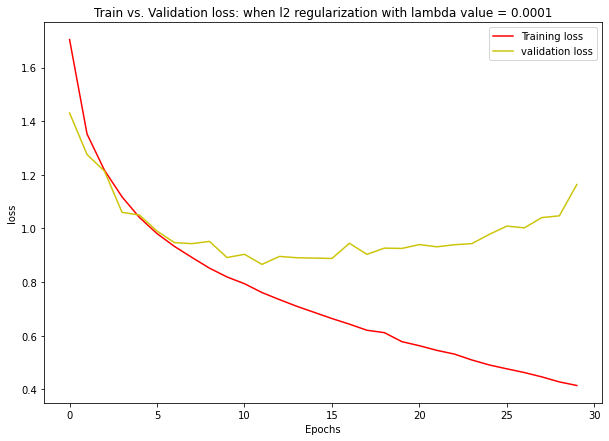

time: 993 ms (started: 2022-05-28 15:36:49 +00:00)


In [ ]:
generatePlot(history_D, 'l2 regularization with lambda value')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'lambda')

time: 2.56 ms (started: 2022-05-28 15:36:50 +00:00)


In [ ]:
val_loss_df

lambda  val_loss
0  1.0000  2.302601
1  0.1000  1.492771
2  0.0100  1.101963
3  0.0010  0.970753
4  0.0001  1.163715

time: 6.36 ms (started: 2022-05-28 15:36:50 +00:00)


In [ ]:
val_accuracy_df

lambda  val_accuracy_L
0  1.0000          0.1000
1  0.1000          0.5200
2  0.0100          0.6747
3  0.0010          0.7225
4  0.0001          0.7012

time: 6.24 ms (started: 2022-05-28 15:36:50 +00:00)


In [ ]:
recordTime_df

lambda  Time in seconds
0  1.0000        55.026831
1  0.1000        51.841887
2  0.0100        51.724885
3  0.0010        51.549097
4  0.0001        51.636317

time: 5.35 ms (started: 2022-05-28 15:36:50 +00:00)


In [ ]:
# validation loss aganist validation accuracy


time: 491 µs (started: 2022-05-28 15:36:50 +00:00)


<p>With L2 regularization we see that when lambda = 0.001, the validation loss is higher than the training loss and there is less overfitting when you compare to other values of 0.0001. Also, this is the optimal value witha  low validation loss and high validation accuracy.  </p>

---



### L1 Regularization for Dense Layers

In [ ]:
# we create a list of lambdas with the following values [1, 0.1, 0.01, 0.001, 0.0001]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
lambda_L = [1, 0.1, 0.01, 0.001, 0.0001]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(lambda_L)):
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3),  activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3),  activation='relu'))
  model.add(layers.Flatten())
  # applying l1 regularization at the dense layer
  model.add(layers.Dense(64, kernel_regularizer=l1(lambda_L[fact]), activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((lambda_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[lambda_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([lambda_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([lambda_L[fact], val_acc])

Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 168.6952 - accuracy: 0.1611 - val_loss: 10.4012 - val_accuracy: 0.1978
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 10.2282 - accuracy: 0.1986 - val_loss: 9.9081 - val_accuracy: 0.2001
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 9.8306 - accuracy: 0.2126 - val_loss: 9.7329 - val_accuracy: 0.2280
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 9.6941 - accuracy: 0.2261 - val_loss: 9.6772 - val_accuracy: 0.2283
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 9.6105 - accuracy: 0.2305 - val_loss: 9.5454 - val_accuracy: 0.2214
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 9.5868 - accuracy: 0.2375 - val_loss: 9.6012 - val_accuracy: 0.2442
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 9.5726 - accuracy: 0.2489 - val_loss: 9.5982 - val_accuracy: 0.2705
Ep

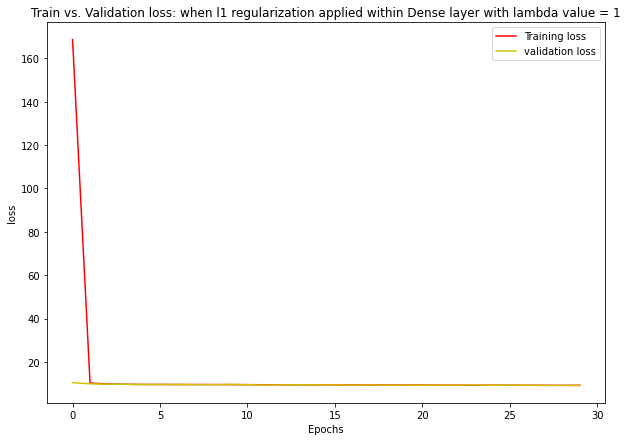

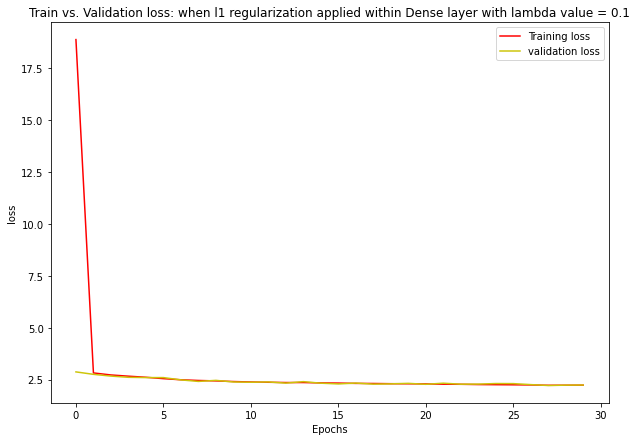

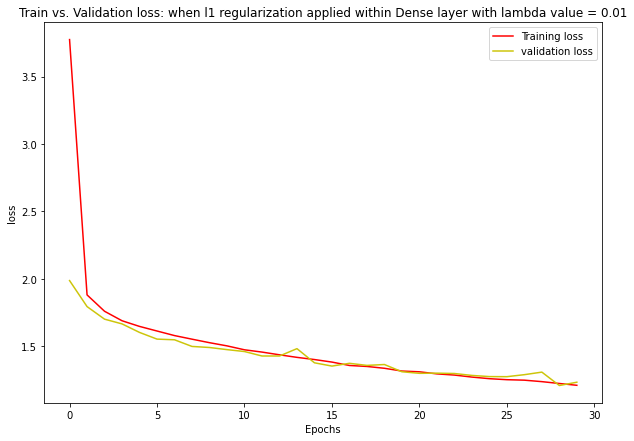

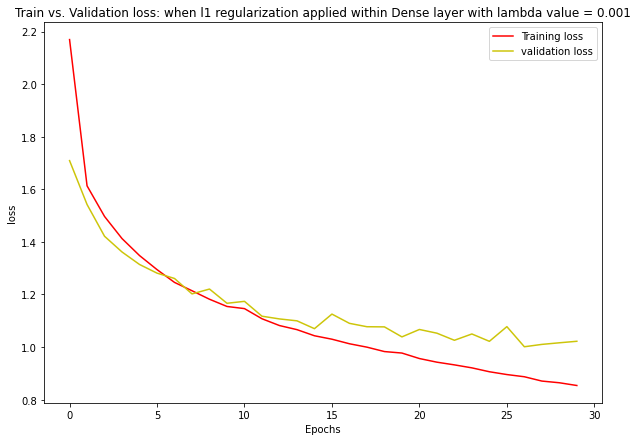

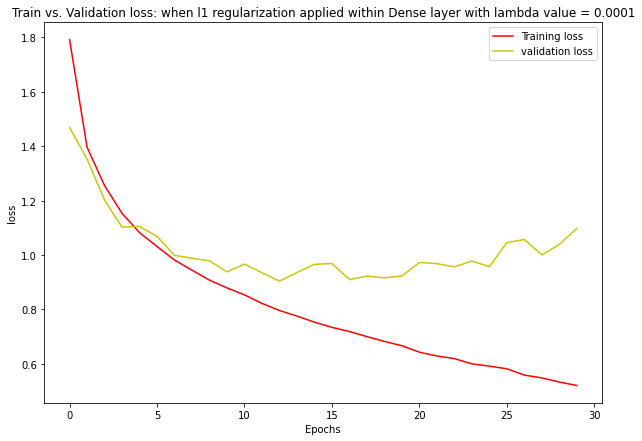

time: 1.05 s (started: 2022-05-28 15:41:11 +00:00)


In [ ]:
generatePlot(history_D, 'l1 regularization applied within Dense layer with lambda value')

<p>When lambda = 0.001, we see that the validation loss is slightly higher than the training loss and also there is less overfitting. </p>

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'lambda')

time: 2.81 ms (started: 2022-05-28 15:41:12 +00:00)


In [ ]:
val_loss_df

lambda  val_loss
0  1.0000  9.116474
1  0.1000  2.236322
2  0.0100  1.234797
3  0.0010  1.022068
4  0.0001  1.097710

time: 6.56 ms (started: 2022-05-28 15:41:12 +00:00)


In [ ]:
val_accuracy_df

lambda  val_accuracy_L
0  1.0000          0.3782
1  0.1000          0.4854
2  0.0100          0.6252
3  0.0010          0.6945
4  0.0001          0.7072

time: 6.14 ms (started: 2022-05-28 15:41:12 +00:00)


### L2 Regularization for Dense Layers

In [ ]:
# we create a list of lambdas with the following values [1, 0.1, 0.01, 0.001, 0.0001]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
lambda_L = [1, 0.1, 0.01, 0.001, 0.0001]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(lambda_L)):
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3),  activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3),  activation='relu'))
  model.add(layers.Flatten())
  # applying l1 regularization at the dense layer
  model.add(layers.Dense(64, kernel_regularizer=l2(lambda_L[fact]), activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((lambda_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[lambda_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([lambda_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([lambda_L[fact], val_acc])

Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 8.2636 - accuracy: 0.2828 - val_loss: 1.8461 - val_accuracy: 0.3364
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.7870 - accuracy: 0.3749 - val_loss: 1.7379 - val_accuracy: 0.3969
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.7038 - accuracy: 0.4139 - val_loss: 1.6497 - val_accuracy: 0.4310
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.6563 - accuracy: 0.4338 - val_loss: 1.5753 - val_accuracy: 0.4646
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.6035 - accuracy: 0.4540 - val_loss: 1.6564 - val_accuracy: 0.4573
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5652 - accuracy: 0.4751 - val_loss: 1.5093 - val_accuracy: 0.4965
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5315 - accuracy: 0.4858 - val_loss: 1.5271 - val_accuracy: 0.4931
Epoch 

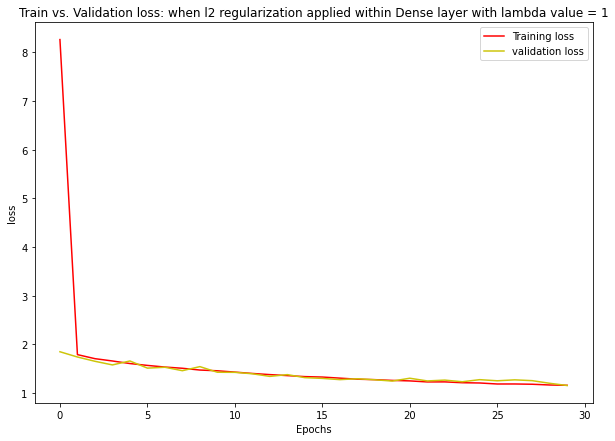

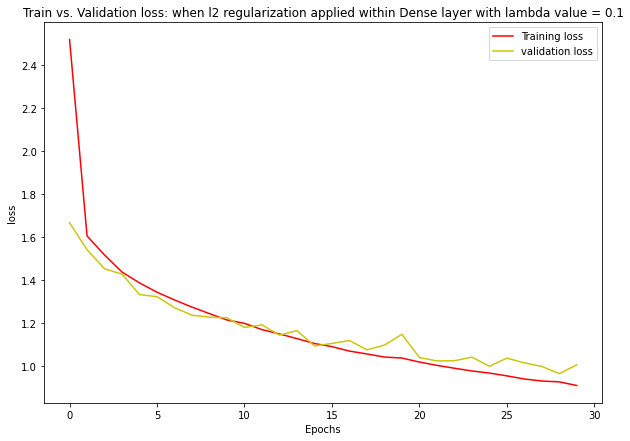

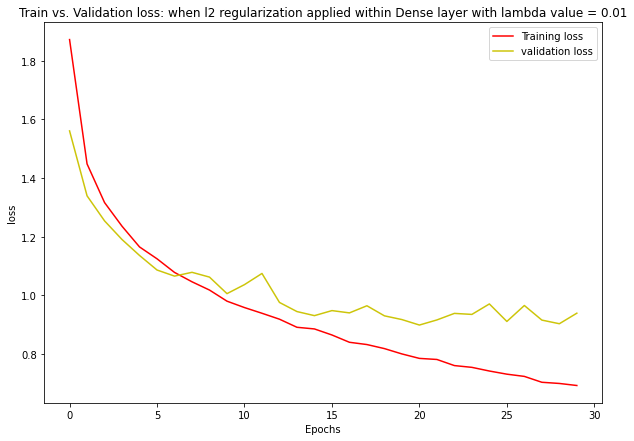

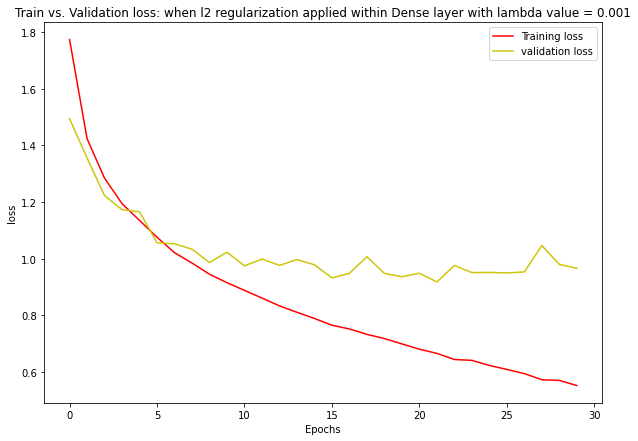

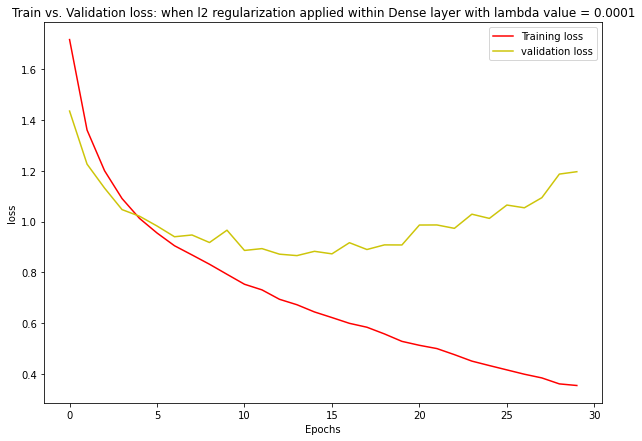

time: 975 ms (started: 2022-05-28 15:45:34 +00:00)


In [ ]:
generatePlot(history_D, 'l2 regularization applied within Dense layer with lambda value')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'lambda')

time: 3.38 ms (started: 2022-05-28 15:45:35 +00:00)


In [ ]:
val_loss_df

lambda  val_loss
0  1.0000  1.152045
1  0.1000  1.007814
2  0.0100  0.938826
3  0.0010  0.965843
4  0.0001  1.196748

time: 6.43 ms (started: 2022-05-28 15:45:35 +00:00)


In [ ]:
val_accuracy_df

lambda  val_accuracy_L
0  1.0000          0.6499
1  0.1000          0.6876
2  0.0100          0.7170
3  0.0010          0.7157
4  0.0001          0.6984

time: 5.15 ms (started: 2022-05-28 15:45:35 +00:00)


<p>We notice that with lambda = 0.01, there is less overfitting and also the validation loss is at 0.91 which is a low value when compared to other values of lambda.</p>

### L2 regularization for both Convolutional and dense layers

In [ ]:
# we create a list of lambdas with the following values [1, 0.1, 0.01, 0.001, 0.0001]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
lambda_L = [1, 0.1, 0.01, 0.001, 0.0001]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(lambda_L)):
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(lambda_L[fact]),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_L[fact]), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(lambda_L[fact]), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, kernel_regularizer=l2(lambda_L[fact]), activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((lambda_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[lambda_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([lambda_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([lambda_L[fact], val_acc])

Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 14.8750 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch

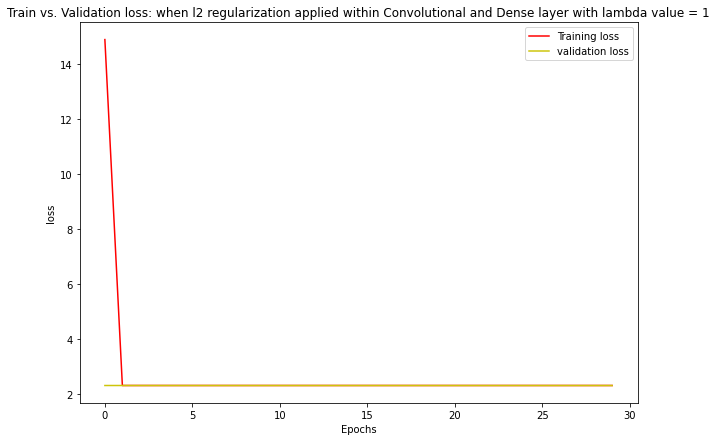

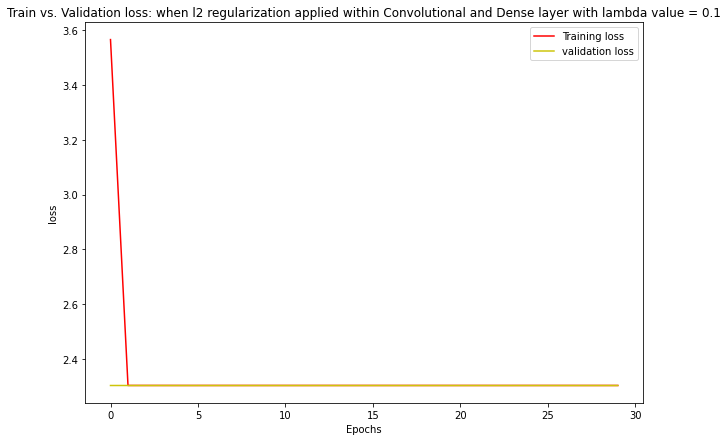

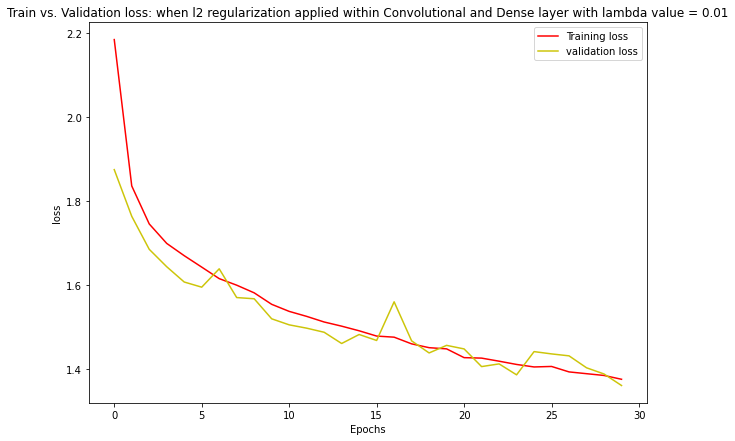

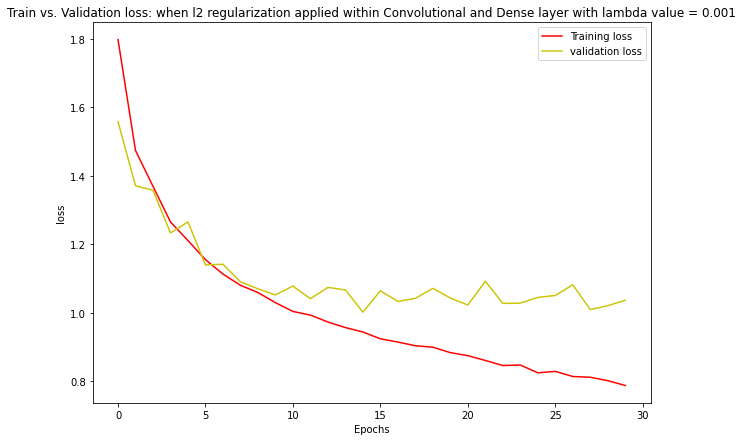

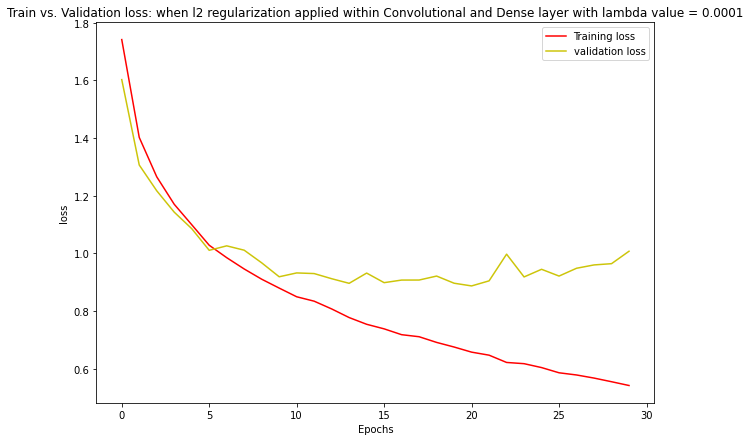

time: 1.01 s (started: 2022-05-28 15:49:57 +00:00)


In [ ]:
generatePlot(history_D, 'l2 regularization applied within Convolutional and Dense layer with lambda value')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'lambda')

time: 2.92 ms (started: 2022-05-28 15:49:58 +00:00)


In [ ]:
val_loss_df

lambda  val_loss
0  1.0000  2.302603
1  0.1000  2.302593
2  0.0100  1.361777
3  0.0010  1.036279
4  0.0001  1.007644

time: 5.94 ms (started: 2022-05-28 15:49:58 +00:00)


In [ ]:
val_accuracy_df

lambda  val_accuracy_L
0  1.0000          0.1000
1  0.1000          0.1000
2  0.0100          0.6250
3  0.0010          0.7229
4  0.0001          0.7011

time: 5.9 ms (started: 2022-05-28 15:49:58 +00:00)


<p>With lambda of 0.001, there is less overfitting with a low validation loss value of 1.02.</p><p>There is no difference in the validation loss and accuracy when we apply regularization at either the convolutional layer or dense layer or both, so I decided to apply it at the Convolutional layer.</p>

<p>We have explored different values of l1 and l2 regularization within the Convolutional and dense layers and the value of lambda of 0.01 with l2 regularization applied within the Convolutional layer is the best lambda value because it experiences less overfitting when the network start training to when it finishes.</p>

### let's train  the model with a mini-batch-size of 100, learning rate of 0.001 and l2 regularization with lambda of 0.001:

In [ ]:
model_history = buildbestModel(100, 0.001, 0.001)

lambda_v is not null
learning rate is given
Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 1.7838 - accuracy: 0.3608 - val_loss: 1.5145 - val_accuracy: 0.4682
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4431 - accuracy: 0.4987 - val_loss: 1.3397 - val_accuracy: 0.5431
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3168 - accuracy: 0.5547 - val_loss: 1.2812 - val_accuracy: 0.5772
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2324 - accuracy: 0.5900 - val_loss: 1.2262 - val_accuracy: 0.5948
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1627 - accuracy: 0.6172 - val_loss: 1.1277 - val_accuracy: 0.6342
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1093 - accuracy: 0.6399 - val_loss: 1.0964 - val_accuracy: 0.6483
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0655 - accuracy: 0.6600 - va

### Save the model to the drive and reload it

In [ ]:
# helper function that saves the current model to the file system.
saveModel('CNN_image_classification.model')

INFO:tensorflow:Assets written to: CNN_image_classification.model/assets
time: 1.47 s (started: 2022-05-28 15:50:51 +00:00)


In [ ]:
# helper function that loads the saved model
savedModel = load_saved_model('CNN_image_classification.model')

time: 472 ms (started: 2022-05-28 15:50:52 +00:00)


### Make the predictions and write the results to a csv file

In [ ]:
# let's make the required predictions
predictions = savedModel.predict([test_images])

time: 769 ms (started: 2022-05-28 15:50:52 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

time: 5.82 ms (started: 2022-05-28 15:50:53 +00:00)


In [ ]:
# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 146 ms (started: 2022-05-28 15:50:53 +00:00)


## Dropout

<p>Dropout randomly selects nodes and removes them from the network when model is  training. So, we explore the different values of 0.2, 0.3, 0.4 and 0.5. </p>

In [ ]:
# we create a list of lambdas with the following values [1, 0.1, 0.01, 0.001, 0.0001]
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
dropout_L = [0.2, 0.3, 0.4, 0.5]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(dropout_L)):
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  # first dropout
  model.add(layers.Dropout(dropout_L[fact]))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  # last dropout
  model.add(layers.Dropout(dropout_L[fact]))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((dropout_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[dropout_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([dropout_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([dropout_L[fact], val_acc])

Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 1.8587 - accuracy: 0.3277 - val_loss: 1.5423 - val_accuracy: 0.4499
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5278 - accuracy: 0.4630 - val_loss: 1.4132 - val_accuracy: 0.5168
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4173 - accuracy: 0.5121 - val_loss: 1.2698 - val_accuracy: 0.5688
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3263 - accuracy: 0.5503 - val_loss: 1.2323 - val_accuracy: 0.5860
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2583 - accuracy: 0.5806 - val_loss: 1.1493 - val_accuracy: 0.6160
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 1.2088 - accuracy: 0.5993 - val_loss: 1.1196 - val_accuracy: 0.6302
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 1.1636 - accuracy: 0.6206 - val_loss: 1.1212 - val_accuracy: 0.6335
Epoch 

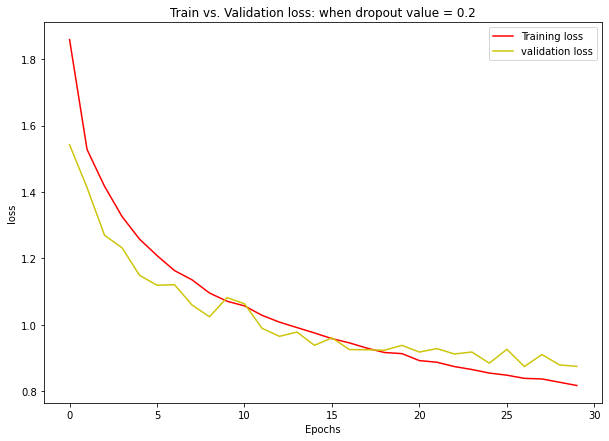

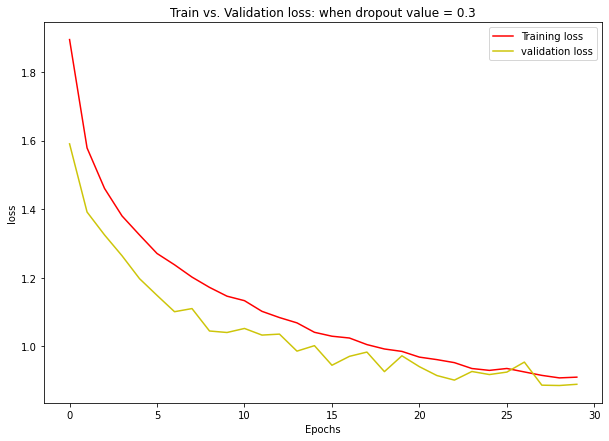

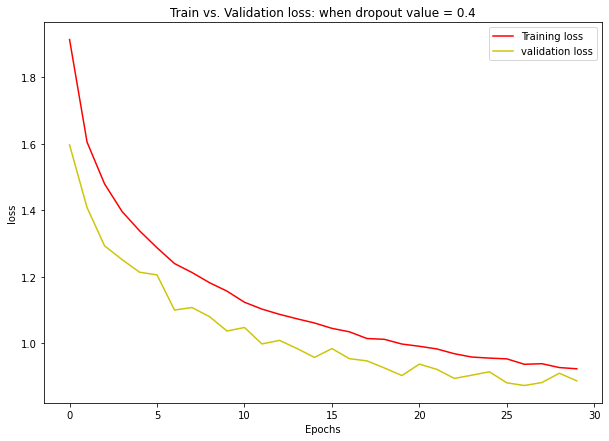

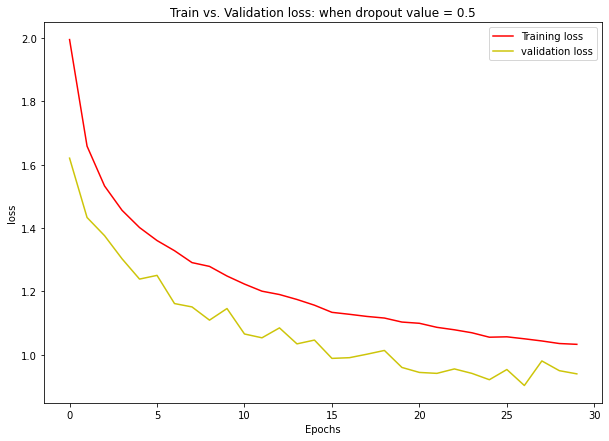

time: 829 ms (started: 2022-05-28 15:54:30 +00:00)


In [ ]:
generatePlot(history_D, 'dropout value')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'dropout')

time: 2.85 ms (started: 2022-05-28 15:54:31 +00:00)


In [ ]:
val_loss_df

dropout  val_loss
0      0.2  0.875205
1      0.3  0.889680
2      0.4  0.886582
3      0.5  0.939425

time: 6.61 ms (started: 2022-05-28 15:54:31 +00:00)


In [ ]:
val_accuracy_df

dropout  val_accuracy_L
0      0.2          0.7318
1      0.3          0.7263
2      0.4          0.7312
3      0.5          0.7036

time: 6.18 ms (started: 2022-05-28 15:54:31 +00:00)


In [ ]:
recordTime_df

dropout  Time in seconds
0      0.2        54.532486
1      0.3        52.458097
2      0.4        52.376292
3      0.5        52.048475

time: 5.89 ms (started: 2022-05-28 15:54:31 +00:00)


<p>With the dropout value of 0.2, the model experiences less overfitting as the training epochs increases, the gap between the training loss and validation loss decreases between the 10th and 25th epochs.</p>

### let's train  the model with a mini-batch-size of 100, learning rate of 0.001, l2 regularization with lambda of 0.001 and dropout rate of 0.2

In [ ]:
model_history = buildbestModel(100, 0.001, 0.001, 0.2)

lambda and dropout are not null
learning rate is given
Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 1.8834 - accuracy: 0.3150 - val_loss: 1.5821 - val_accuracy: 0.4385
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5719 - accuracy: 0.4485 - val_loss: 1.4266 - val_accuracy: 0.4970
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4452 - accuracy: 0.5013 - val_loss: 1.2990 - val_accuracy: 0.5589
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3670 - accuracy: 0.5327 - val_loss: 1.3247 - val_accuracy: 0.5591
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2978 - accuracy: 0.5622 - val_loss: 1.1679 - val_accuracy: 0.6104
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2454 - accuracy: 0.5826 - val_loss: 1.1333 - val_accuracy: 0.6283
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1973 - accuracy: 

### Save the model to the drive and reload it

In [ ]:
# helper function that saves the current model to the file system.
saveModel('CNN_image_classification.model')

INFO:tensorflow:Assets written to: CNN_image_classification.model/assets
time: 1.07 s (started: 2022-05-28 15:55:24 +00:00)


In [ ]:
# helper function that loads the saved model
savedModel = load_saved_model('CNN_image_classification.model')

time: 495 ms (started: 2022-05-28 15:55:25 +00:00)


### Make the predictions and write the results to a csv file

In [ ]:
# let's make the required predictions
predictions = savedModel.predict([test_images])

time: 754 ms (started: 2022-05-28 15:55:26 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

time: 6.05 ms (started: 2022-05-28 15:55:26 +00:00)


In [ ]:
# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 142 ms (started: 2022-05-28 15:55:26 +00:00)


## Optimizers

### building the network with the Nadam optimizer

In [ ]:
seed=7
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))


# first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

# train the model
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))

Epoch 1/30
400/400 [==============================] - 4s 6ms/step - loss: 1.8355 - accuracy: 0.3537 - val_loss: 1.6624 - val_accuracy: 0.4259
Epoch 2/30
400/400 [==============================] - 2s 6ms/step - loss: 1.4981 - accuracy: 0.4851 - val_loss: 1.3953 - val_accuracy: 0.5311
Epoch 3/30
400/400 [==============================] - 2s 6ms/step - loss: 1.3565 - accuracy: 0.5433 - val_loss: 1.2192 - val_accuracy: 0.5937
Epoch 4/30
400/400 [==============================] - 2s 6ms/step - loss: 1.2600 - accuracy: 0.5815 - val_loss: 1.1474 - val_accuracy: 0.6304
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1825 - accuracy: 0.6154 - val_loss: 1.1004 - val_accuracy: 0.6475
Epoch 6/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1232 - accuracy: 0.6405 - val_loss: 1.0342 - val_accuracy: 0.6730
Epoch 7/30
400/400 [==============================] - 2s 6ms/step - loss: 1.0778 - accuracy: 0.6582 - val_loss: 1.0294 - val_accuracy: 0.6710
Epoch 

In [ ]:
# create a data frame containing the loss and accuracy of the model
data = {'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        'val_loss': history.history['val_loss'], 
        'val_accuracy': history.history['val_accuracy'],
        'loss':history.history['loss'],
        'training accuracy':history.history['accuracy']}


val_accuracy_loss_df = pd.DataFrame(data)

time: 4.29 ms (started: 2022-05-28 15:56:37 +00:00)


In [ ]:
# sort the data frame by validation accuracy
val_accuracy_loss_df.sort_values(by=['val_accuracy'], inplace=True, ascending=False) # the first five records
print(val_accuracy_loss_df)

    Epoch  val_loss  val_accuracy      loss  training accuracy
28     29  0.836089        0.7597  0.699710           0.799775
27     28  0.838683        0.7596  0.703089           0.796775
29     30  0.830439        0.7593  0.686436           0.805400
26     27  0.835344        0.7576  0.718858           0.793350
21     22  0.826692        0.7549  0.763209           0.776700
22     23  0.838631        0.7491  0.755385           0.779650
25     26  0.860278        0.7482  0.725206           0.788725
19     20  0.847953        0.7458  0.789163           0.769250
23     24  0.853753        0.7440  0.743688           0.783225
24     25  0.868751        0.7434  0.729197           0.787475
20     21  0.860942        0.7426  0.780421           0.770900
14     15  0.864131        0.7378  0.857843           0.737275
18     19  0.871142        0.7374  0.801459           0.761325
17     18  0.875238        0.7365  0.814060           0.755275
16     17  0.884929        0.7310  0.829197           0

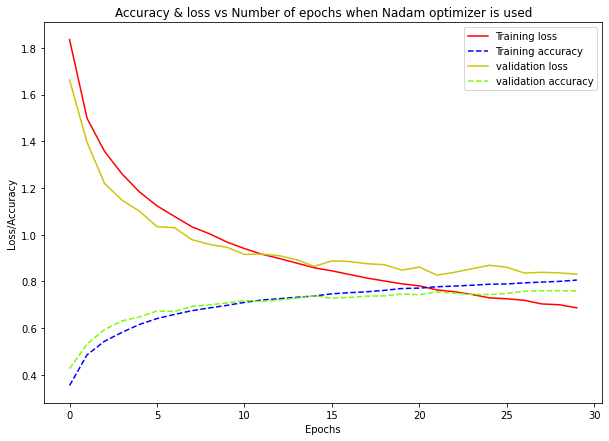

time: 258 ms (started: 2022-05-28 15:56:37 +00:00)


In [ ]:
# helper function that takes dictionary of keys and plot the different line charts
deriveLossAccuracyLineCharts(history.history, 'Accuracy & loss vs Number of epochs when Nadam optimizer is used')

<p>We notice that at training epoch 27 is where there is validation loss is at its lowest. Also we notice at epoch 27 the gap between training and validation accuracy is small, which means that there is less overfitting. </p>

### building the network with the Adam optimizer

In [ ]:
seed = 7
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))


# first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

# train the model
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))

Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 1.8613 - accuracy: 0.3311 - val_loss: 1.5180 - val_accuracy: 0.4589
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5335 - accuracy: 0.4624 - val_loss: 1.4125 - val_accuracy: 0.5191
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 1.4091 - accuracy: 0.5178 - val_loss: 1.2829 - val_accuracy: 0.5622
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3366 - accuracy: 0.5456 - val_loss: 1.2267 - val_accuracy: 0.5859
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2715 - accuracy: 0.5762 - val_loss: 1.1943 - val_accuracy: 0.6002
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2209 - accuracy: 0.5925 - val_loss: 1.1501 - val_accuracy: 0.6196
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 1.1784 - accuracy: 0.6124 - val_loss: 1.1586 - val_accuracy: 0.6206
Epoch 

In [ ]:
# create a data frame containing the loss and accuracy of the model
data = {'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        'val_loss': history.history['val_loss'], 
        'val_accuracy': history.history['val_accuracy'],
        'loss':history.history['loss'],
        'training accuracy':history.history['accuracy']}
# create a data frame

val_accuracy_loss_df = pd.DataFrame(data)

time: 4.3 ms (started: 2022-05-28 15:57:33 +00:00)


In [ ]:
# sort the data frame by validation accuracy
val_accuracy_loss_df.sort_values(by=['val_accuracy'], inplace=True, ascending=False) # the first five records
print(val_accuracy_loss_df)

    Epoch  val_loss  val_accuracy      loss  training accuracy
27     28  0.870985        0.7375  0.833762           0.746925
26     27  0.870336        0.7338  0.845449           0.740950
29     30  0.885688        0.7333  0.816678           0.751975
28     29  0.905312        0.7283  0.825962           0.748375
24     25  0.904933        0.7268  0.854842           0.737550
25     26  0.892101        0.7235  0.846506           0.740425
19     20  0.893191        0.7226  0.908085           0.718650
21     22  0.903622        0.7208  0.892498           0.722375
22     23  0.907306        0.7193  0.880198           0.730100
23     24  0.913417        0.7181  0.863094           0.736250
18     19  0.919970        0.7173  0.927839           0.708700
20     21  0.917661        0.7171  0.899390           0.723725
17     18  0.911833        0.7161  0.934568           0.708350
16     17  0.947516        0.7022  0.948240           0.699300
14     15  0.949877        0.7021  0.989355           0

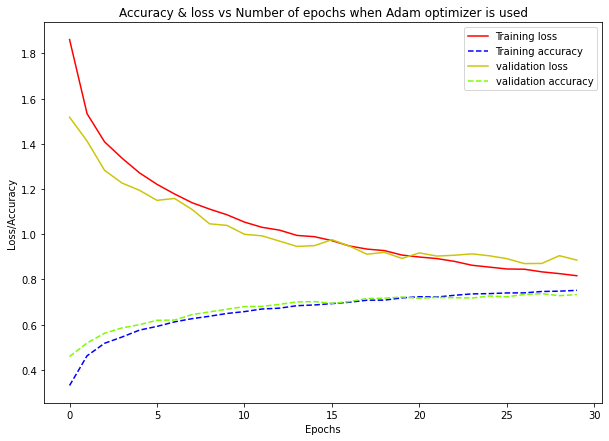

time: 235 ms (started: 2022-05-28 15:57:33 +00:00)


In [ ]:
# helper function that takes dictionary of keys and plot the different line charts
deriveLossAccuracyLineCharts(history.history)

<p>We notice that at training epoch 27 is where validation loss is at its lowest. Also we notice at epoch 27 the gap between training and validation accuracy is small, which means that there is less overfitting. </p>
<p>Comparing the Adam optimizer with the Nadam, Adam optimizer performs better since there is less overfitting as just witnessed form the above charts and going foward we should be using this optimizer.</p>

## Number of filters

This is form of a film or layer that allows only the desired qualities of the input to get through it. So, we shall use a pair of filters to explore the optimal value. 

### Create a convolutional network, compile and train the model to explore different values of the following list: [(16,32), (32, 64), (64, 96), (96, 128)]

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
num_filters_L = [(16,32), (32, 64), (64, 96), (96, 128)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(num_filters_L)):
  print('Number of filter pairs being used: %s and %s' %(str(num_filters_L[fact][0]), str(num_filters_L[fact][1])))
  model = models.Sequential()
  # get the first indice of the tuple - num_filters_L[fact][0]
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  # first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  # last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((num_filters_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[num_filters_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([num_filters_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([num_filters_L[fact], val_acc])

Number of filter pairs being used: 16 and 32
Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 1.8721 - accuracy: 0.3156 - val_loss: 1.5876 - val_accuracy: 0.4283
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5814 - accuracy: 0.4356 - val_loss: 1.4686 - val_accuracy: 0.4808
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4763 - accuracy: 0.4804 - val_loss: 1.3839 - val_accuracy: 0.5131
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4089 - accuracy: 0.5067 - val_loss: 1.2885 - val_accuracy: 0.5568
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3604 - accuracy: 0.5307 - val_loss: 1.2694 - val_accuracy: 0.5600
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3133 - accuracy: 0.5459 - val_loss: 1.2244 - val_accuracy: 0.5832
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2732 - accuracy: 0.5651 - v

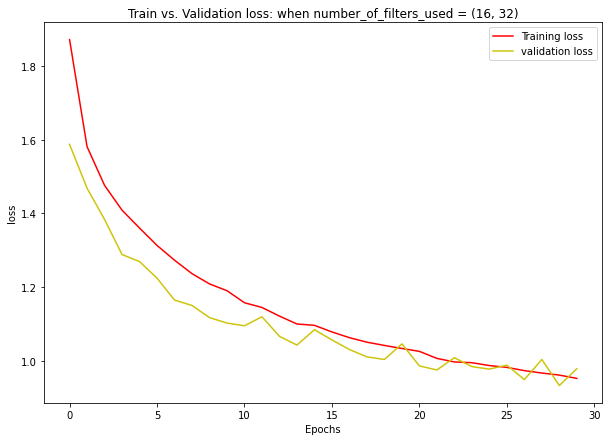

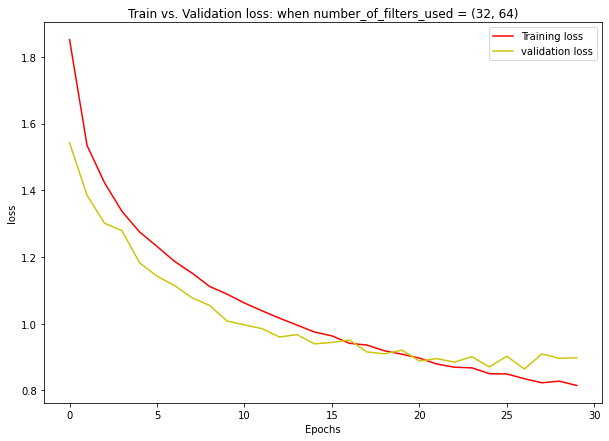

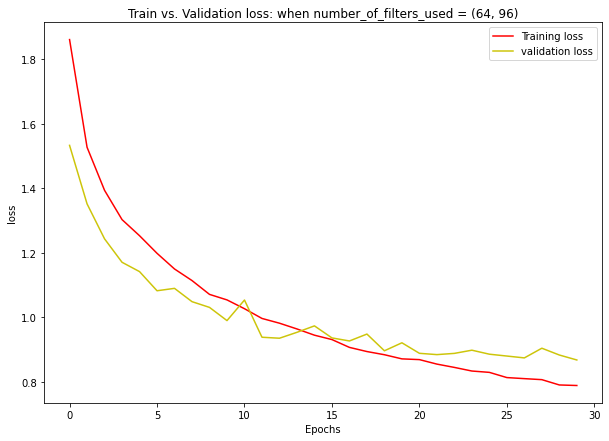

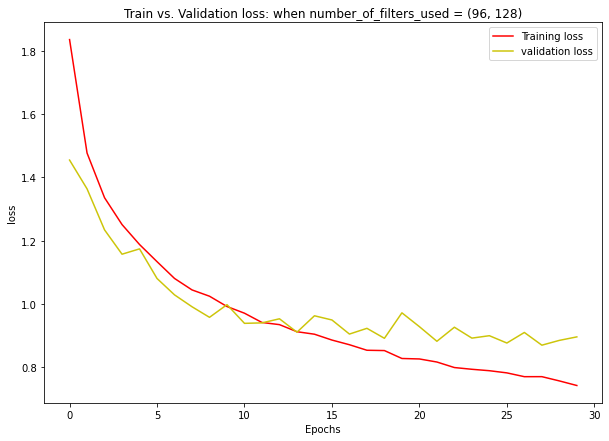

time: 757 ms (started: 2022-05-28 16:01:18 +00:00)


In [ ]:
# a helper function used to print the line charts for the different  number of filters used
generatePlot(history_D, 'number_of_filters_used')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'filter_pairs_used')

time: 2.44 ms (started: 2022-05-28 16:01:19 +00:00)


In [ ]:
val_loss_df

filter_pairs_used  val_loss
0          (16, 32)  0.978537
1          (32, 64)  0.897639
2          (64, 96)  0.867954
3         (96, 128)  0.895839

time: 7.32 ms (started: 2022-05-28 16:01:19 +00:00)


In [ ]:
val_accuracy_df

filter_pairs_used  val_accuracy_L
0          (16, 32)          0.6821
1          (32, 64)          0.7276
2          (64, 96)          0.7521
3         (96, 128)          0.7411

time: 6.47 ms (started: 2022-05-28 16:01:19 +00:00)


Here, we notice that 96 is the best optimal number of filters to be used in the first Convolutional layer. Also, 128 is the other number of filters to be used in the second and third Convolutional layers.

### Create a convolutional network, compile and train the model to explore different values of the following list: [(8, 16), (16, 32), (24, 48), (32, 64), (40, 80), (48, 96)]

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
num_filters_L = [(8, 16), (16, 32), (24, 48), (32, 64), (40, 80), (48, 96)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(num_filters_L)):
  print('Number of filter pairs being used: %s and %s' %(str(num_filters_L[fact][0]), str(num_filters_L[fact][1])))
  model = models.Sequential()
  # get the first indice of the tuple - num_filters_L[fact][0]
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  # first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  # last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((num_filters_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[num_filters_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([num_filters_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([num_filters_L[fact], val_acc])

Number of filter pairs being used: 8 and 16
Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 1.9205 - accuracy: 0.2929 - val_loss: 1.6517 - val_accuracy: 0.3968
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.6480 - accuracy: 0.4013 - val_loss: 1.5041 - val_accuracy: 0.4629
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5469 - accuracy: 0.4434 - val_loss: 1.4156 - val_accuracy: 0.4981
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4870 - accuracy: 0.4680 - val_loss: 1.3728 - val_accuracy: 0.5114
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4511 - accuracy: 0.4813 - val_loss: 1.3389 - val_accuracy: 0.5286
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4142 - accuracy: 0.4968 - val_loss: 1.3103 - val_accuracy: 0.5350
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3940 - accuracy: 0.5044 - va

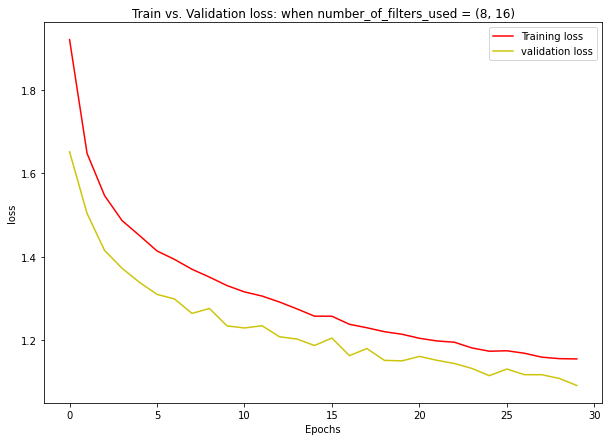

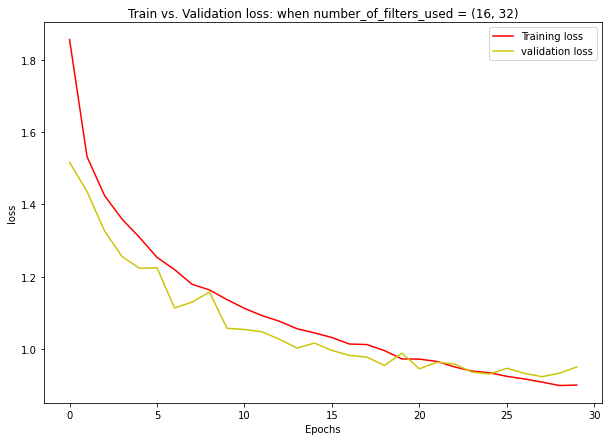

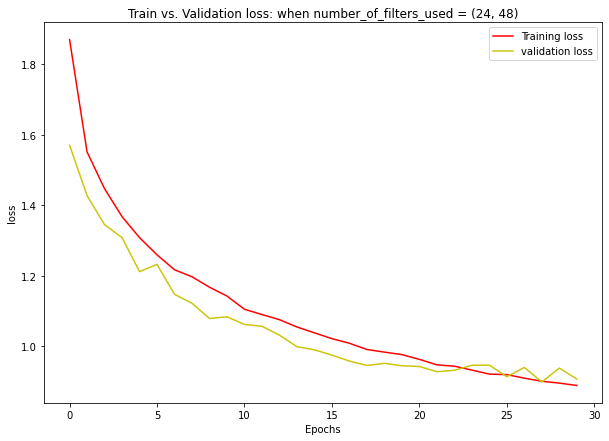

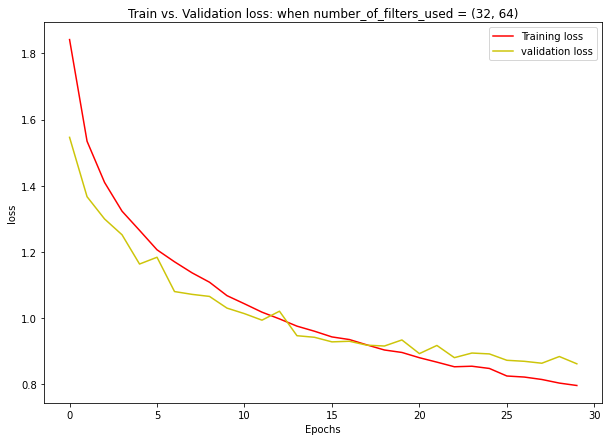

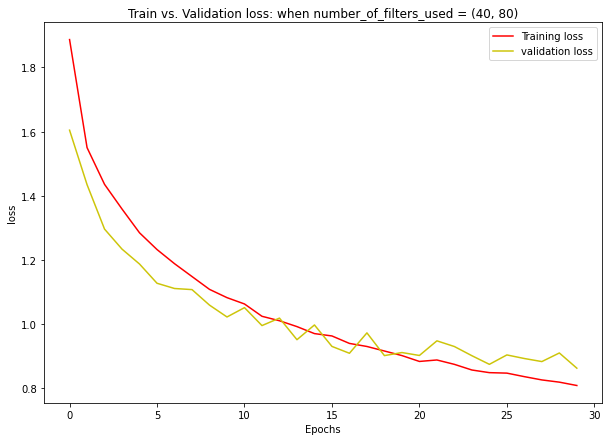

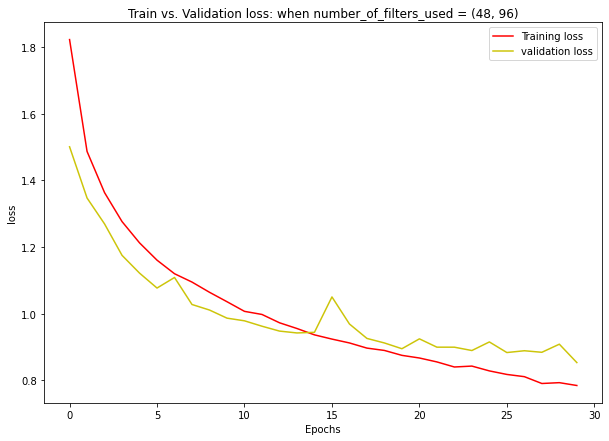

time: 1.18 s (started: 2022-05-28 16:06:47 +00:00)


In [ ]:
# a helper function used to print the line charts for the different  number of filters used
generatePlot(history_D, 'number_of_filters_used')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'filter_pairs_used')

time: 2.83 ms (started: 2022-05-28 16:06:48 +00:00)


In [ ]:
val_loss_df

filter_pairs_used  val_loss
0           (8, 16)  1.092021
1          (16, 32)  0.950717
2          (24, 48)  0.907436
3          (32, 64)  0.862427
4          (40, 80)  0.862723
5          (48, 96)  0.853707

time: 7.12 ms (started: 2022-05-28 16:06:48 +00:00)


In [ ]:
val_accuracy_df

filter_pairs_used  val_accuracy_L
0           (8, 16)          0.6265
1          (16, 32)          0.6921
2          (24, 48)          0.7151
3          (32, 64)          0.7448
4          (40, 80)          0.7413
5          (48, 96)          0.7475

time: 6.91 ms (started: 2022-05-28 16:06:48 +00:00)


<p>We observe that (40, 80) and (32, 64 )seem to be the optimal number of filters to be applied at the Convolutional layers, but we decide to with the (32, 64). 
32 is applied at the first Convolutional layer. 64 is applied at both the second and third Convolutional layers. This pair has the highest accuracy of 0.74 and the lowest validation loss of 0.87.</p>

So comparing the two lists of the number of filters, we justify that (32, 64) is the optimal number of filters to be used by the Convolutional layers. This is because it has less overfitting with a high accuracy and low validation loss value. 

## Number of units to be used in the Dense layer

### Create a convolutional network, compile and train the model to explore different values of the following list: [16, 32, 64, 128, 256, 512, 1024, 2048] to determine the optimal unit.

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
dense_units = [16, 32, 64, 128, 256, 512, 1024, 2048]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(dense_units)):
  print('%s Units being used.' %(str(dense_units[fact])))
  model = models.Sequential()
  # get the first indice of the tuple - num_filters_L[fact][0]
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
  # first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(dense_units[fact], activation='relu'))

  # last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((dense_units[fact], endTime - startTime))

  # insert the history of the current execution into a dictionary.
  history_D[dense_units[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([dense_units[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([dense_units[fact], val_acc])

16 Units being used.
Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 2.0436 - accuracy: 0.2526 - val_loss: 1.6976 - val_accuracy: 0.4050
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.7326 - accuracy: 0.3679 - val_loss: 1.5404 - val_accuracy: 0.4705
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5899 - accuracy: 0.4321 - val_loss: 1.4170 - val_accuracy: 0.5165
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5070 - accuracy: 0.4667 - val_loss: 1.3420 - val_accuracy: 0.5546
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4569 - accuracy: 0.4942 - val_loss: 1.2936 - val_accuracy: 0.5644
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4110 - accuracy: 0.5118 - val_loss: 1.2412 - val_accuracy: 0.5905
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3658 - accuracy: 0.5300 - val_loss: 1.2010 - val_ac

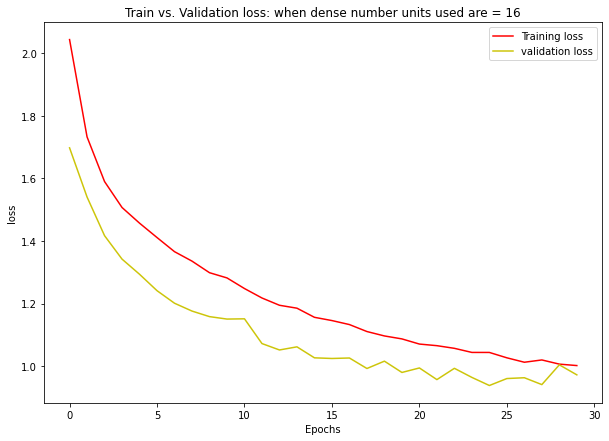

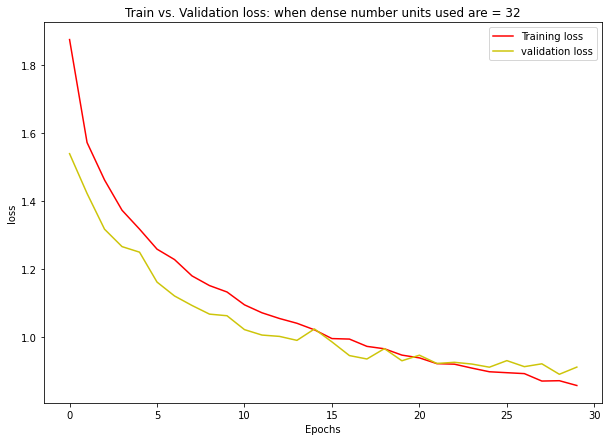

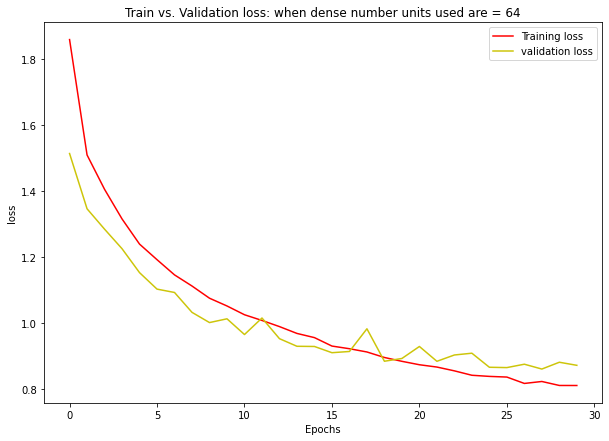

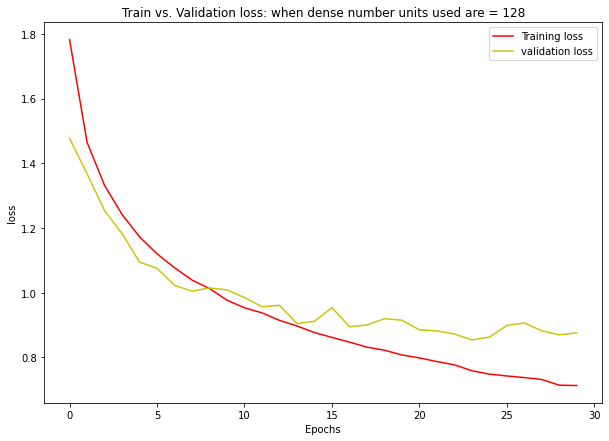

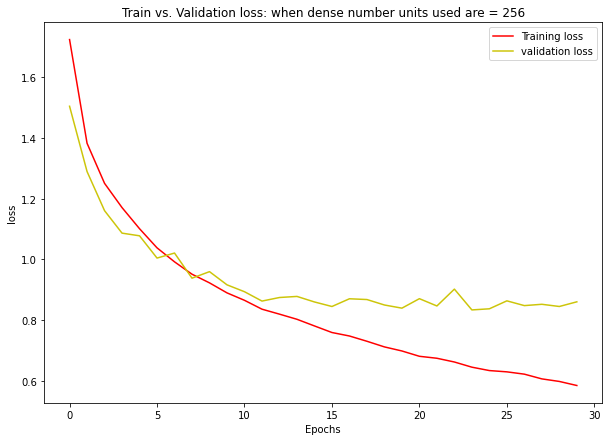

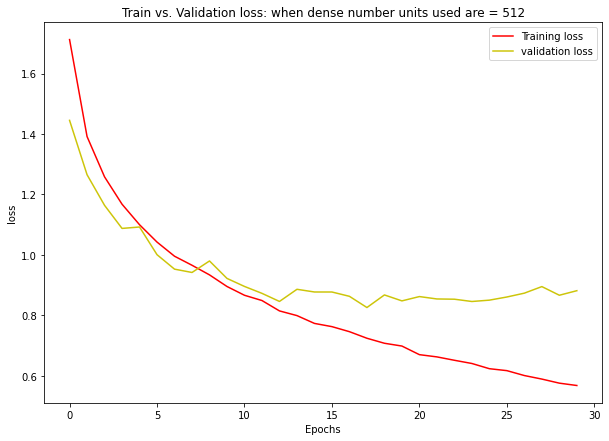

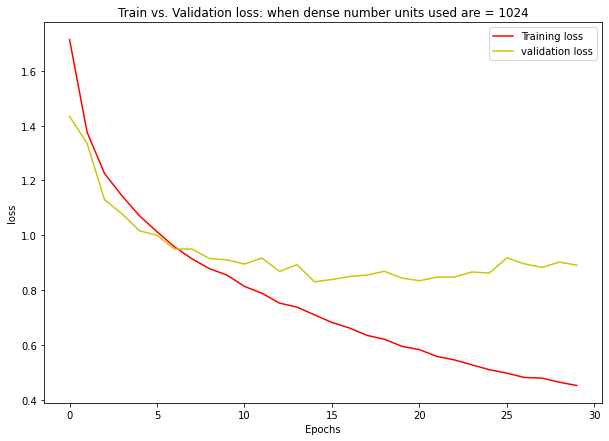

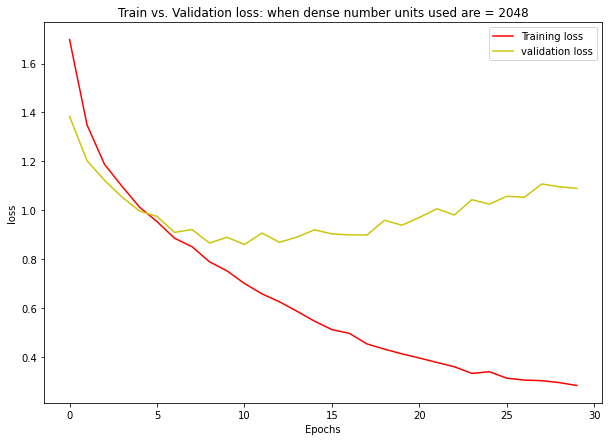

time: 1.96 s (started: 2022-05-28 16:14:01 +00:00)


In [ ]:
# a helper function used to print the line charts when different number of units are used in the dense layer
generatePlot(history_D, 'dense number units used are')

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'number_of_units_used')

time: 2.73 ms (started: 2022-05-28 16:14:03 +00:00)


In [ ]:
val_loss_df

number_of_units_used  val_loss
0                    16  0.972134
1                    32  0.911219
2                    64  0.872164
3                   128  0.876130
4                   256  0.860306
5                   512  0.881093
6                  1024  0.891137
7                  2048  1.089687

time: 5.76 ms (started: 2022-05-28 16:14:03 +00:00)


In [ ]:
val_accuracy_df

number_of_units_used  val_accuracy_L
0                    16          0.7002
1                    32          0.7265
2                    64          0.7356
3                   128          0.7388
4                   256          0.7505
5                   512          0.7514
6                  1024          0.7576
7                  2048          0.7367

time: 5.24 ms (started: 2022-05-28 16:14:03 +00:00)


<p>Amongst the different units we have explored, 64 is the optimal number of units to be used in the dense layer because it has the highest validation accuracy and a low validation loss. Also, we see that there is less overfitting so we shall leave the number of units in the dense layer as is. </p>

## Data Augmentation

### Using data augmentation, derive batches of tensor images.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

time: 539 µs (started: 2022-05-28 16:14:03 +00:00)


In [ ]:
datagen=ImageDataGenerator(
    # Set input mean to 0 over the dataset, featurewise
    #featurewise_center=True,

    # Set each sample mean to 0 
    #samplewise_center=False, 
    
    # Divide inputs by the std of the dataset, feature-wise
    #featurewise_std_normalization=True, 
    
    # Apply ZCA whitening
    #zca_whitening=False, 
    
    # Degree range of random rotations
    # it was 20
    rotation_range=20, 
    
    # Range for random zoom
    zoom_range=0.2, 
    
    # fraction of total width
    width_shift_range=0.1, 
    
    # fraction of total height
    height_shift_range=0.1, 
    
    # randomly flip inputs horizontally
    horizontal_flip=True,
    
    # randomly flips inputs vertically
    # vertical_flip=True

    # fraction of images reversed for validation 
    #validation_split=0.2,

    shear_range=0.2,
    # fill_mode='constant',
    # fill_mode='reflect'
    # cval=125
    # values greater than 1.0 make the image brighter [0.5, 1.0]
    # values greater than 1.0 make a darker image like [1.0, 2.0] 
    brightness_range=[0.2, 0.1]

 )

# computes the internal data stats related to the data-dependent transformations.
datagen.fit(train_images)

time: 388 ms (started: 2022-05-28 22:27:23 +00:00)


### Create a convolutional network, compile and train the model with the generated batches of tensor image data.

In [ ]:
"""
seed = 7
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))

# first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

# train the model
#history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, validation_data=(valid_images, valid_labels))
history = model.fit(datagen.flow(train_images, train_labels, batch_size=100, subset='training'), 
                              epochs=EPOCHS, 
                              validation_data=datagen.flow(valid_images, valid_labels, batch_size=32, subset='validation')
                              )
"""

"\nseed = 7\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), activation='relu'))\n\n# first dropout\nmodel.add(layers.Dropout(0.2))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(64, activation='relu'))\n\n# last dropout\nmodel.add(layers.Dropout(0.2))\nmodel.add(layers.Dense(10, activation='softmax'))  # As noted above\nmodel.summary()\n\nopt = tf.keras.optimizers.Adam(learning_rate=0.001)\nmodel.compile(optimizer=opt,\n              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2\n              #loss='sparse_categorical_crossentropy', # For TF1\n              metrics=['accuracy'])\n\n# train the model\n#history = model.fit(tra

time: 7.41 ms (started: 2022-05-28 16:16:37 +00:00)


In [ ]:
# set the figure
"""
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), history.history['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), history.history['val_loss'], '#cdc50a')
plt.title('Train vs. Validation loss: when data augmentation is used')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'validation loss'])
plt.show()
"""

"\nplt.figure(figsize=(10, 7))\nplt.figure(figsize=(10, 7))\nline_mse = plt.plot(range(0,EPOCHS), history.history['loss'], 'r')\nline_crossEntropy = plt.plot(range(0,EPOCHS), history.history['val_loss'], '#cdc50a')\nplt.title('Train vs. Validation loss: when data augmentation is used')\nplt.ylabel('loss')\nplt.xlabel('Epochs')\nplt.legend(['Training loss', 'validation loss'])\nplt.show()\n"

time: 2.98 ms (started: 2022-05-28 16:16:37 +00:00)


In [ ]:
# set the figure
"""
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), history.history['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), history.history['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation loss: when data augmentation is used')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training accuracy', 'validation accuracy'])
plt.show()
"""

"\nplt.figure(figsize=(10, 7))\nplt.figure(figsize=(10, 7))\nline_mse = plt.plot(range(0,EPOCHS), history.history['accuracy'], 'r')\nline_crossEntropy = plt.plot(range(0,EPOCHS), history.history['val_accuracy'], '#cdc50a')\nplt.title('Train vs. Validation loss: when data augmentation is used')\nplt.ylabel('loss')\nplt.xlabel('Epochs')\nplt.legend(['Training accuracy', 'validation accuracy'])\nplt.show()\n"

time: 2.51 ms (started: 2022-05-28 16:16:37 +00:00)


In [ ]:
# create a data frame containing the loss and accuracy of the model
"""
data = {'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        'val_loss': history.history['val_loss'], 
        'val_accuracy': history.history['val_accuracy'],
        'loss':history.history['loss'],
        'training accuracy':history.history['accuracy']}
# create a data frame
val_accuracy_loss_df = pd.DataFrame(data)
"""

"\ndata = {'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],\n        'val_loss': history.history['val_loss'], \n        'val_accuracy': history.history['val_accuracy'],\n        'loss':history.history['loss'],\n        'training accuracy':history.history['accuracy']}\n# create a data frame\nval_accuracy_loss_df = pd.DataFrame(data)\n"

time: 2.65 ms (started: 2022-05-28 16:16:37 +00:00)


In [ ]:
# sort the data frame by validation accuracy
"""
val_accuracy_loss_df.sort_values(by=['val_accuracy'], inplace=True, ascending=False) # the first five records
print(val_accuracy_loss_df)
"""

"\nval_accuracy_loss_df.sort_values(by=['val_accuracy'], inplace=True, ascending=False) # the first five records\nprint(val_accuracy_loss_df)\n"

time: 2.93 ms (started: 2022-05-28 16:16:37 +00:00)


### Save the model to the drive and reload it

In [ ]:
# helper function that saves the current model to the file system.
# saveModel('CNN_image_classification.model')

time: 479 µs (started: 2022-05-28 16:16:37 +00:00)


In [ ]:
# helper function that loads the saved model
# savedModel = load_saved_model('CNN_image_classification.model')

time: 739 µs (started: 2022-05-28 16:16:37 +00:00)


### Make the predictions and write the results to a csv file

In [ ]:
# let's make the required predictions
predictions = model.predict([test_images])

time: 751 ms (started: 2022-05-28 16:16:37 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 132 ms (started: 2022-05-28 16:16:38 +00:00)


## Size of filters

let's explore various values to determine the optimal size of the filters.

### Create a Convolutional network, compile and train the model with the different size of filters

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
filter_size_L = [1, 3, 5, 7, 9, 11]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(filter_size_L)):
  print('Exploring filter size %s'%str(filter_size_L[fact]))
  model = models.Sequential()
  model.add(layers.Conv2D(32, (filter_size_L[fact], filter_size_L[fact]), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (filter_size_L[fact], filter_size_L[fact]), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (filter_size_L[fact], filter_size_L[fact]), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  # first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  # last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above
  # model.summary()

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((filter_size_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[filter_size_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  # append the val_loss of the current execution to the list
  val_loss_L.append([filter_size_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  val_accuracy_L.append([filter_size_L[fact], val_acc])

Exploring filter size 1
Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 1.9089 - accuracy: 0.3286 - val_loss: 1.6555 - val_accuracy: 0.4328
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.6329 - accuracy: 0.4341 - val_loss: 1.5292 - val_accuracy: 0.4795
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.5322 - accuracy: 0.4720 - val_loss: 1.4173 - val_accuracy: 0.5161
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4783 - accuracy: 0.4899 - val_loss: 1.3855 - val_accuracy: 0.5263
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4358 - accuracy: 0.5047 - val_loss: 1.3691 - val_accuracy: 0.5401
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4049 - accuracy: 0.5181 - val_loss: 1.3457 - val_accuracy: 0.5400
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.3750 - accuracy: 0.5261 - val_loss: 1.3093 - val

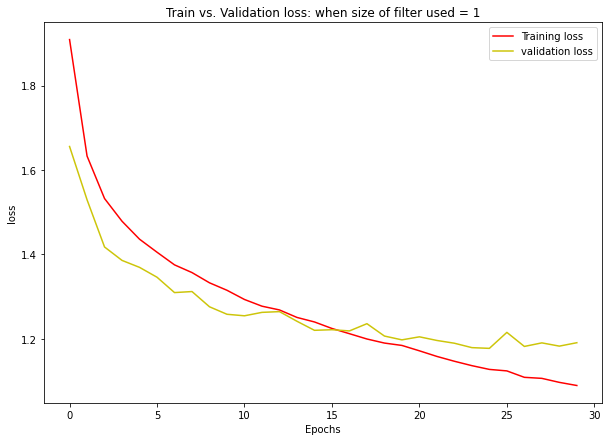

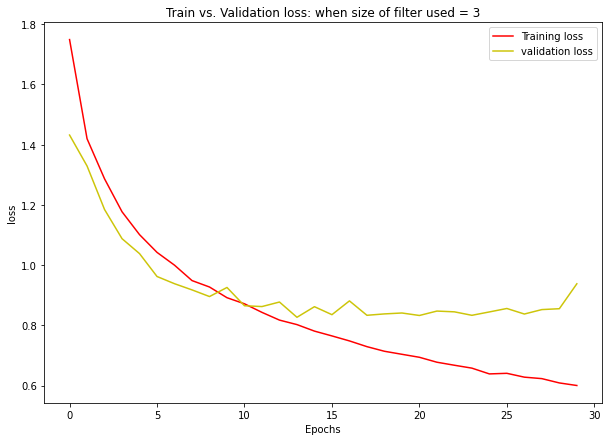

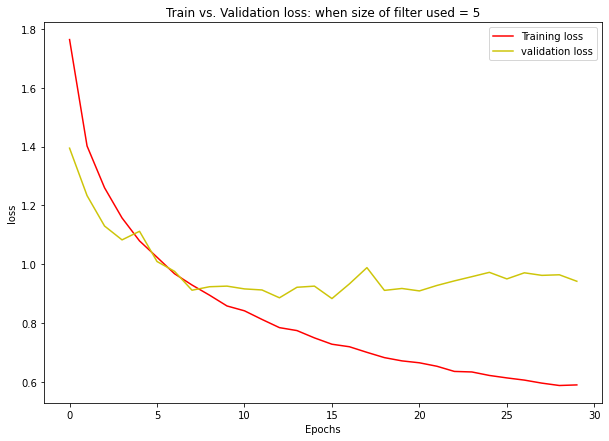

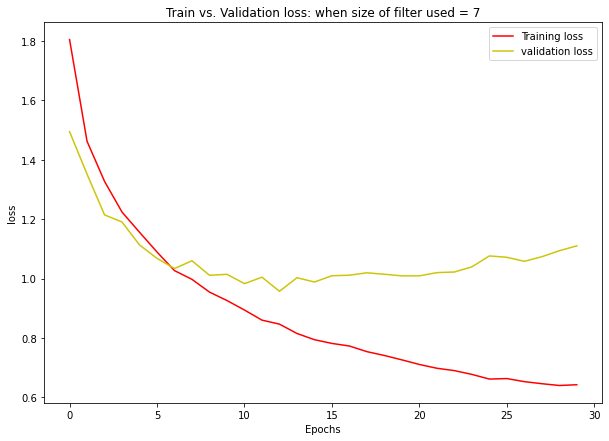

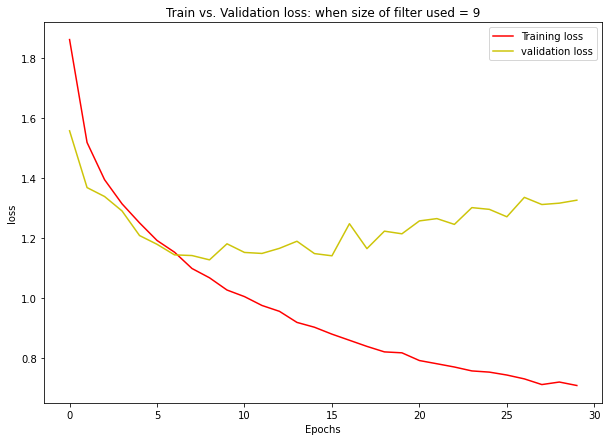

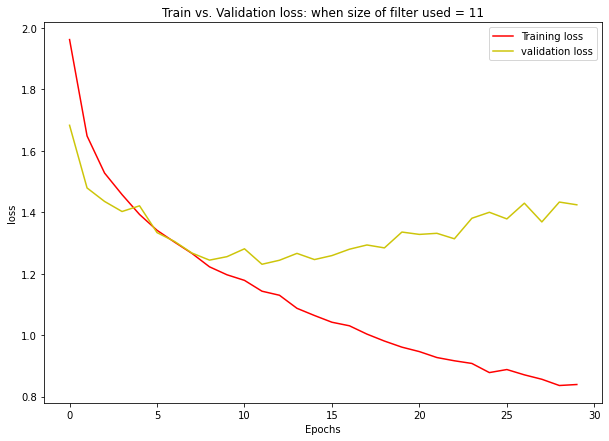

time: 1.67 s (started: 2022-05-28 16:22:37 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different  number of filters used
generatePlot(history_D, 'size of filter used')

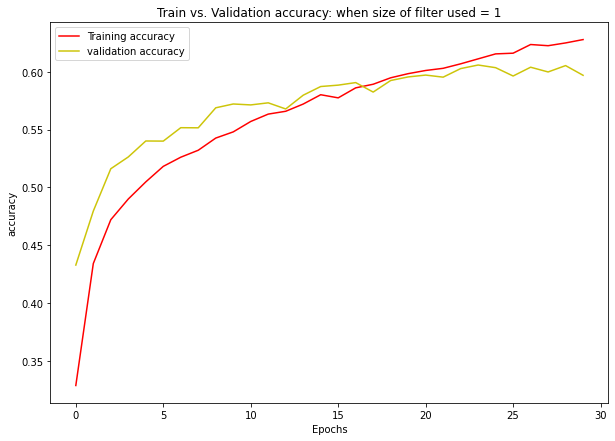

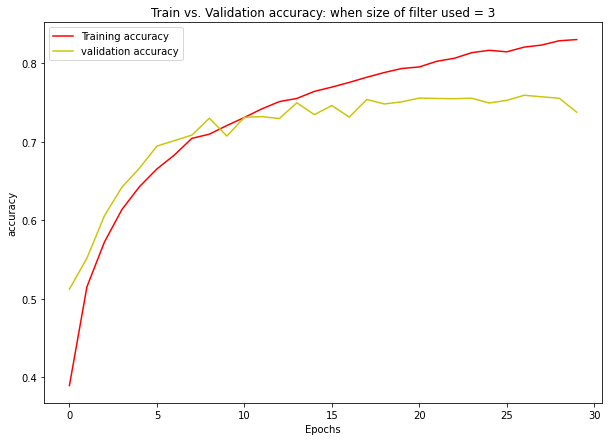

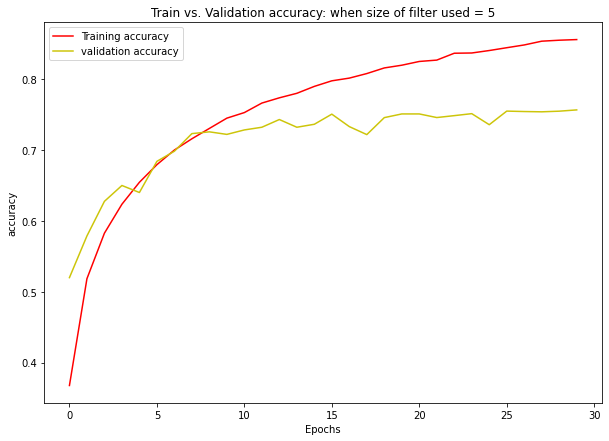

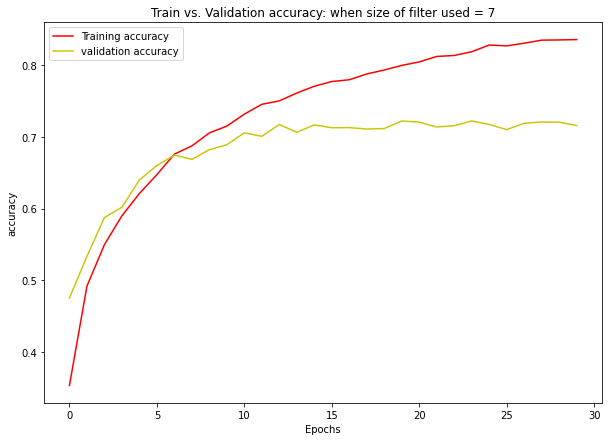

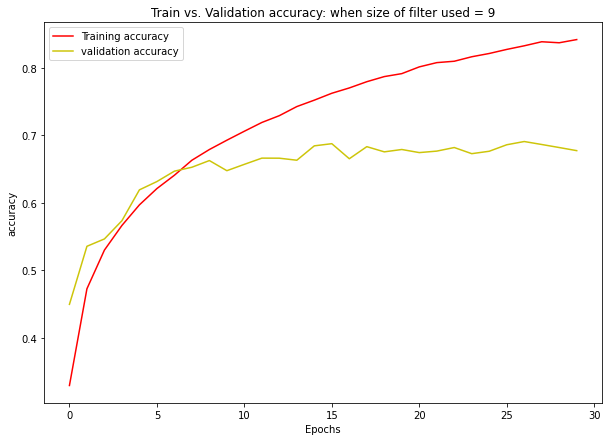

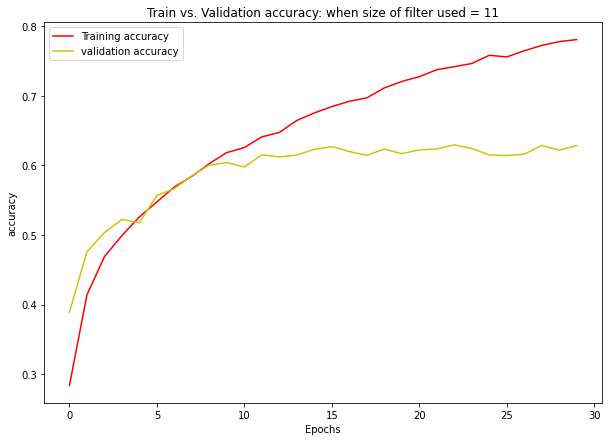

time: 1.19 s (started: 2022-05-28 16:22:38 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different  number of filters used
generate_accuracy_Plot(history_D, 'size of filter used')

<p>We observe that as training epochs increases, both training and validation accuracy for the filter sizes 1, 3, 5, 7, and 11 increase. For filter size 1, the the validation accuracy is higher than the training accuracy, which might be a sign of underfitting. For 3, 5, 7, in the initial stages as the model is training the input neurons, the validation accuracy is high than training but at some point as the training epochs increase, training accuracy is higher than validation accuracy. Compared to 1, 5, 7 and 11, we see that the filter size 3 is the optimal size since it has a high validation accuracy with less overfitting. </p>

In [ ]:
# a helper function that returns data frames for for losss, accuracy and run time execution
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'size_of_filter')

time: 3.25 ms (started: 2022-05-28 16:22:40 +00:00)


In [ ]:
val_loss_df

size_of_filter  val_loss
0               1  1.190490
1               3  0.937945
2               5  0.941503
3               7  1.110138
4               9  1.325670
5              11  1.424003

time: 8.87 ms (started: 2022-05-28 16:22:40 +00:00)


In [ ]:
val_accuracy_df

size_of_filter  val_accuracy_L
0               1          0.5969
1               3          0.7379
2               5          0.7570
3               7          0.7154
4               9          0.6770
5              11          0.6283

time: 5.9 ms (started: 2022-05-28 16:22:40 +00:00)


We observe that 3 is the optimal size of filter to be because it has less overfitting and it has a high accuracy with a low validation score. 

### let's create a CNN, compile and train the model with the best optimal size of filter, 3, with the rest of the best hyperparameters we have explored. 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
# model.summary()

#print(learningRate_L[eta])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# compile the model
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  
# train the model
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))

Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 1.7936 - accuracy: 0.3623 - val_loss: 1.4452 - val_accuracy: 0.5053
Epoch 2/30
400/400 [==============================] - 2s 5ms/step - loss: 1.4612 - accuracy: 0.4953 - val_loss: 1.2979 - val_accuracy: 0.5611
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 1.3216 - accuracy: 0.5510 - val_loss: 1.1945 - val_accuracy: 0.6030
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 1.2140 - accuracy: 0.5971 - val_loss: 1.0856 - val_accuracy: 0.6447
Epoch 5/30
400/400 [==============================] - 2s 5ms/step - loss: 1.1481 - accuracy: 0.6236 - val_loss: 1.0604 - val_accuracy: 0.6599
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 1.0895 - accuracy: 0.6448 - val_loss: 1.0112 - val_accuracy: 0.6788
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 1.0478 - accuracy: 0.6636 - val_loss: 0.9565 - val_accuracy: 0.6964
Epoch 

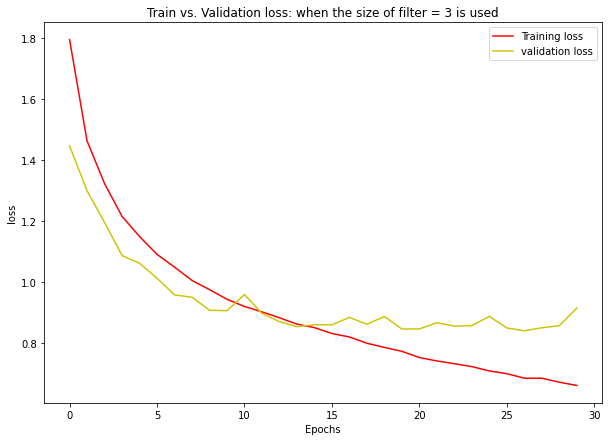

time: 168 ms (started: 2022-05-28 16:23:35 +00:00)


In [ ]:
# set the figure
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), history.history['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), history.history['val_loss'], '#cdc50a')
plt.title('Train vs. Validation loss: when the size of filter = 3 is used')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'validation loss'])
plt.show()


<p>Here notice that as in initial stage when the network is training the model, trainin loss is higher than validation loss. Around the 8th training epoch validation loss starts to get higher than training loss which indicates overfitting.</p>

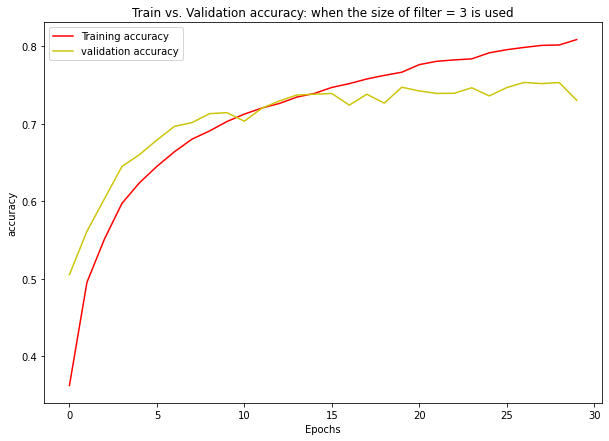

time: 168 ms (started: 2022-05-28 16:23:35 +00:00)


In [ ]:
# set the figure
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), history.history['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), history.history['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation accuracy: when the size of filter = 3 is used')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['Training accuracy', 'validation accuracy'])
plt.show()

<p>In initial stage when the network is training the model, validation accuracy is higher than training accuracy then between the 10th and 15th training epoch, training accuracy starts to get higher than the validation accuracy. </p>

In [ ]:
# create a data frame containing the loss and accuracy of the model

data = {'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        'val_loss': history.history['val_loss'], 
        'val_accuracy': history.history['val_accuracy'],
        'loss':history.history['loss'],
        'training accuracy':history.history['accuracy']}
# create a data frame
val_accuracy_loss_df = pd.DataFrame(data)

time: 4.05 ms (started: 2022-05-28 16:23:35 +00:00)


In [ ]:
#sort the data frame by validation accuracy
val_accuracy_loss_df.sort_values(by=['val_accuracy'], inplace=True, ascending=False) # the first five records
print(val_accuracy_loss_df)

    Epoch  val_loss  val_accuracy      loss  training accuracy
26     27  0.838942        0.7531  0.683571           0.798225
28     29  0.855721        0.7529  0.670394           0.801375
27     28  0.848783        0.7516  0.683499           0.800825
19     20  0.844530        0.7469  0.771588           0.766225
25     26  0.848156        0.7464  0.698334           0.795275
23     24  0.856038        0.7462  0.721532           0.783450
20     21  0.845228        0.7421  0.751272           0.776025
22     23  0.854132        0.7391  0.730999           0.782100
21     22  0.865546        0.7389  0.740106           0.780325
15     16  0.858733        0.7388  0.829988           0.746650
14     15  0.858598        0.7379  0.849358           0.738875
17     18  0.860415        0.7378  0.798067           0.757525
13     14  0.852526        0.7368  0.860737           0.734150
24     25  0.886263        0.7357  0.707339           0.791250
29     30  0.913242        0.7301  0.659601           0

<p>We see that val_accuracy is 0.7556 and val_loss is 0.82.</p>

### Make the predictions and write the results to a csv file

In [ ]:
#let's make the required predictions
predictions = savedModel.predict([test_images])

time: 742 ms (started: 2022-05-28 16:23:35 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 156 ms (started: 2022-05-28 16:23:36 +00:00)


## Size of the stride

let's determine the optimal size of the stride of the filter on the input image to explore the actual size that can be used to downsample the size of the output feature.

### Create a CNN, compile and train the model with the different stride values

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
stride_L = [(1, 1), (2, 2), (3, 3), (1, 2), (2, 3), (1, 3)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(stride_L)):
  print('\n Exploring strides %s'%str(stride_L[fact]))
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), strides=(stride_L[fact][0], stride_L[fact][0]) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), strides=(stride_L[fact][1], stride_L[fact][1]), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  # first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  # last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above
  # model.summary()

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((stride_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[stride_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  train_loss, train_accuracy = model.evaluate(train_images, train_labels)



  # append the train_loss, val_loss of the current execution to the list
  train_loss_L.append([stride_L[fact], train_loss])
  val_loss_L.append([stride_L[fact], val_loss])

  # append training and validation accuracy of the current execution to the different lists 
  train_accuracy_L.append([stride_L[fact], train_accuracy])
  val_accuracy_L.append([stride_L[fact], val_acc])


 Exploring strides (1, 1)
Epoch 1/30
400/400 [==============================] - 3s 5ms/step - loss: 1.7523 - accuracy: 0.3830 - val_loss: 1.4130 - val_accuracy: 0.5132
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4070 - accuracy: 0.5215 - val_loss: 1.2781 - val_accuracy: 0.5754
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 1.2631 - accuracy: 0.5797 - val_loss: 1.1339 - val_accuracy: 0.6330
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1614 - accuracy: 0.6152 - val_loss: 1.1114 - val_accuracy: 0.6394
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0858 - accuracy: 0.6472 - val_loss: 1.0400 - val_accuracy: 0.6588
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0430 - accuracy: 0.6629 - val_loss: 0.9858 - val_accuracy: 0.6862
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 1.0000 - accuracy: 0.6811 - val_loss: 0.9239 - 

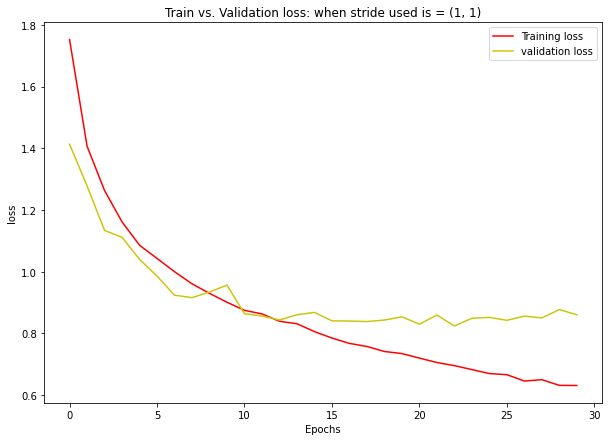

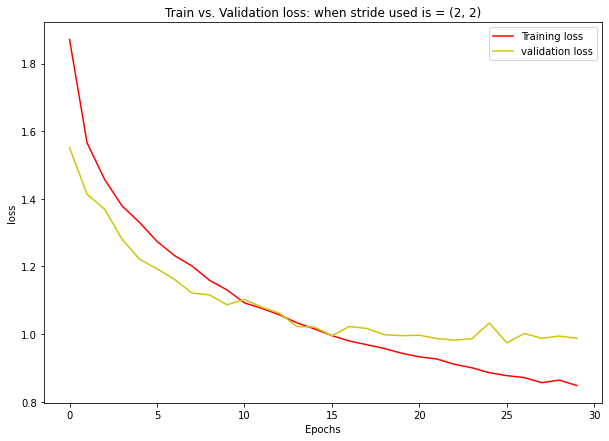

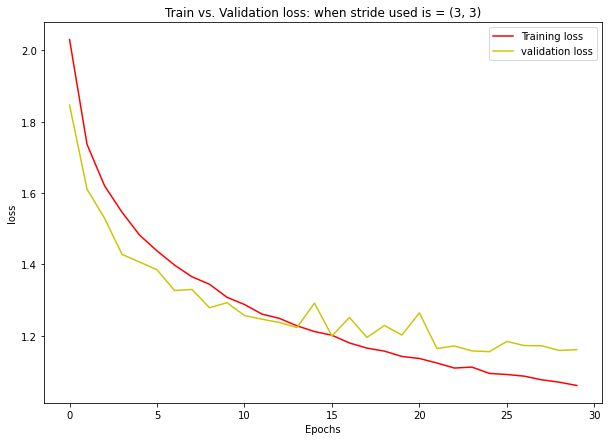

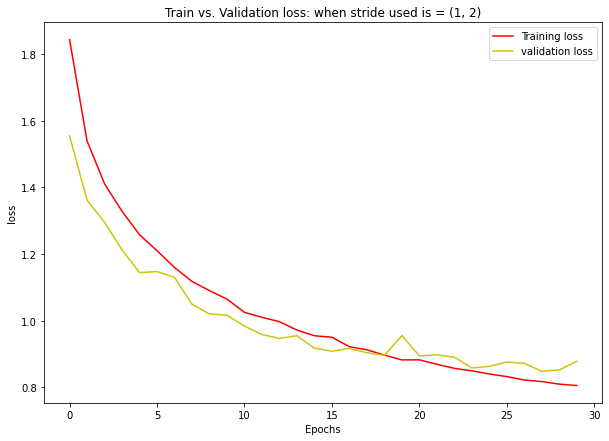

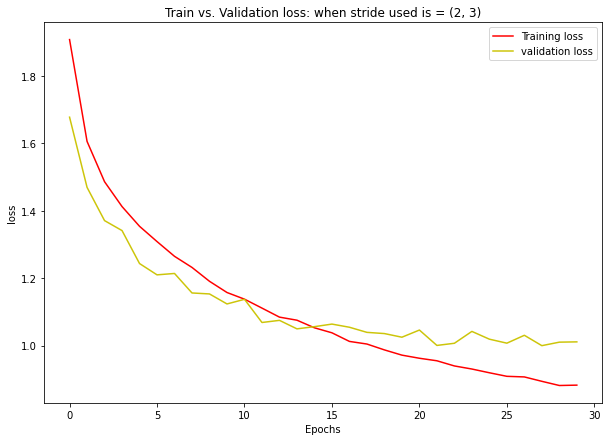

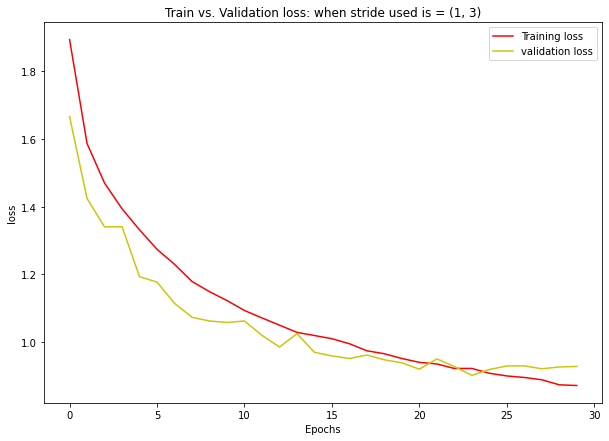

time: 1.11 s (started: 2022-05-28 16:29:22 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different stride values used
generatePlot(history_D, 'stride used is')

<p>We observe that in the initial stages when the model is training, training loss is higher than validation loss but as the training epoch increases validation loss is higher than training loss, and amongst all the strides which have been used stride, (1, 2), whose values are used at the top layer and botton layer is the best set since it experiences less overfitting.</p>

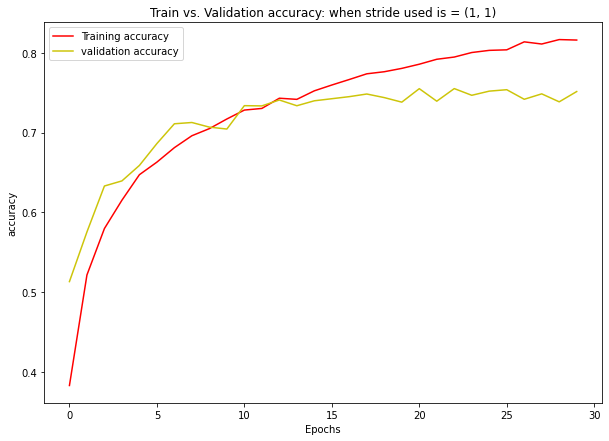

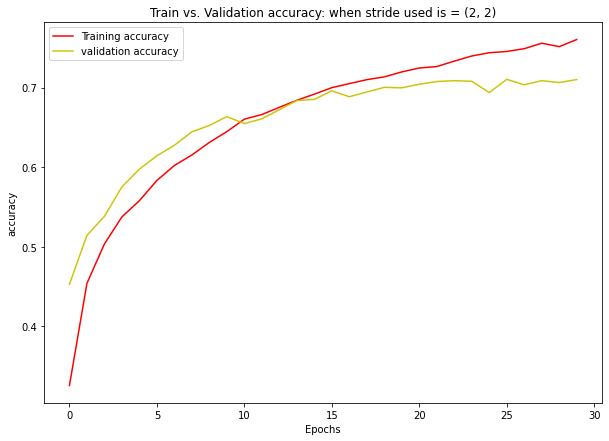

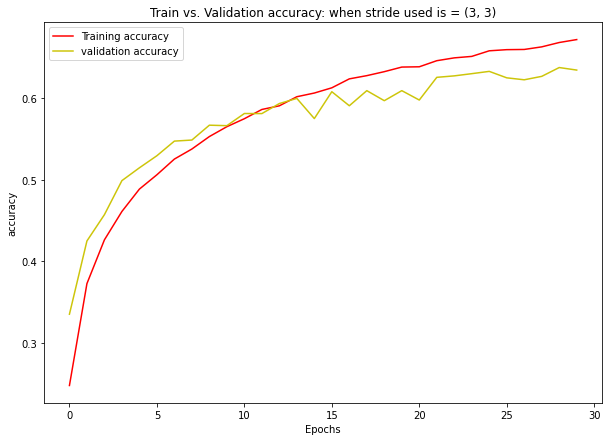

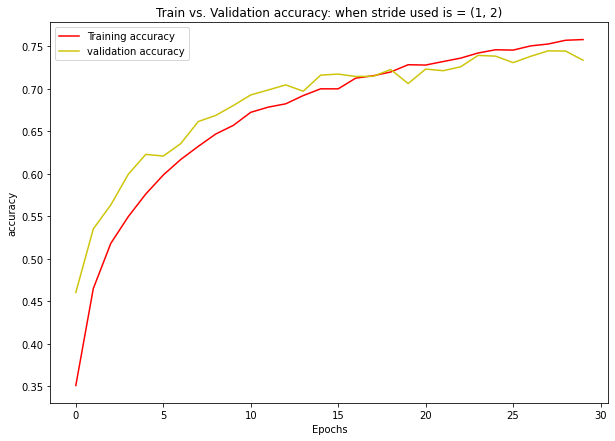

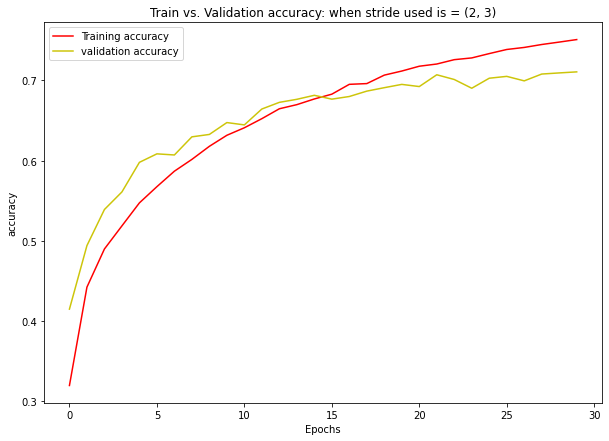

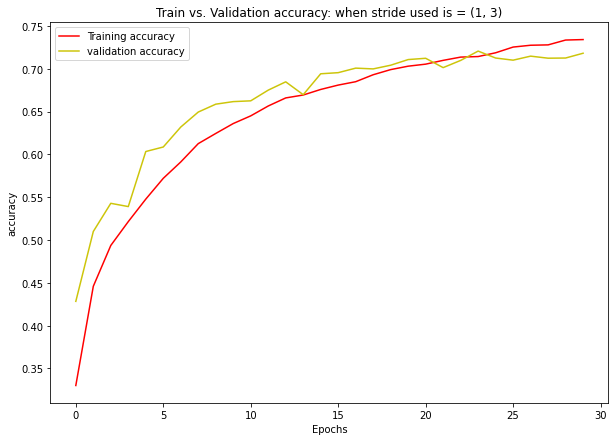

time: 1.15 s (started: 2022-05-28 16:29:23 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'stride used is')

<p>Compared to other sets of strides,  we observe that stride (1, 2) has the highest validation accuracy.</p>

In [ ]:
# helper function that derives and return the different data frames for validation
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'size_of_stride')

time: 2.64 ms (started: 2022-05-28 16:29:24 +00:00)


In [ ]:
val_loss_df

size_of_stride  val_loss
0         (1, 1)  0.860306
1         (2, 2)  0.987260
2         (3, 3)  1.160939
3         (1, 2)  0.878653
4         (2, 3)  1.010836
5         (1, 3)  0.928242

time: 7.05 ms (started: 2022-05-28 16:29:24 +00:00)


In [ ]:
val_accuracy_df

size_of_stride  val_accuracy_L
0         (1, 1)          0.7514
1         (2, 2)          0.7100
2         (3, 3)          0.6343
3         (1, 2)          0.7335
4         (2, 3)          0.7107
5         (1, 3)          0.7181

time: 7.17 ms (started: 2022-05-28 16:29:24 +00:00)


In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'size_of_stride')

time: 1.68 ms (started: 2022-05-28 16:29:24 +00:00)


In [ ]:
train_loss_df

size_of_stride  train_loss
0         (1, 1)    0.469606
1         (2, 2)    0.703306
2         (3, 3)    0.926367
3         (1, 2)    0.660810
4         (2, 3)    0.735853
5         (1, 3)    0.732375

time: 7.25 ms (started: 2022-05-28 16:29:24 +00:00)


In [ ]:
train_accuracy_df

size_of_stride  train_accuracy
0         (1, 1)        0.884700
1         (2, 2)        0.816175
2         (3, 3)        0.722350
3         (1, 2)        0.816475
4         (2, 3)        0.807550
5         (1, 3)        0.790925

time: 6.76 ms (started: 2022-05-28 16:29:24 +00:00)


### let's explore other sets of strides at all Convolutional layers

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
stride_L = [(1, 1), (2, 2), (3, 3), (1, 2), (2, 3), (1, 3)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(stride_L)):
  print('\n Exploring strides %s'%str(stride_L[fact]))
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), strides=(stride_L[fact][0], stride_L[fact][0]) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), strides=(stride_L[fact][1], stride_L[fact][1]) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), strides=(stride_L[fact][1], stride_L[fact][1]), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  # first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  # last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above
  # model.summary()

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((stride_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[stride_L[fact]] = history

  val_loss, val_acc = model.evaluate(valid_images, valid_labels)

  train_loss, train_accuracy = model.evaluate(train_images, train_labels)



  # append the train_loss, val_loss of the current execution to the list
  train_loss_L.append([stride_L[fact], train_loss])
  val_loss_L.append([stride_L[fact], val_loss])

  # append training and validation accuracy of the current execution to the different lists 
  train_accuracy_L.append([stride_L[fact], train_accuracy])
  val_accuracy_L.append([stride_L[fact], val_acc])


 Exploring strides (1, 1)
Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 1.7726 - accuracy: 0.3762 - val_loss: 1.4126 - val_accuracy: 0.5171
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4301 - accuracy: 0.5088 - val_loss: 1.2465 - val_accuracy: 0.5734
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2786 - accuracy: 0.5699 - val_loss: 1.1338 - val_accuracy: 0.6245
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1777 - accuracy: 0.6079 - val_loss: 1.0902 - val_accuracy: 0.6511
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1065 - accuracy: 0.6389 - val_loss: 1.0615 - val_accuracy: 0.6499
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0485 - accuracy: 0.6604 - val_loss: 0.9725 - val_accuracy: 0.6861
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0037 - accuracy: 0.6747 - val_loss: 0.9608 - 

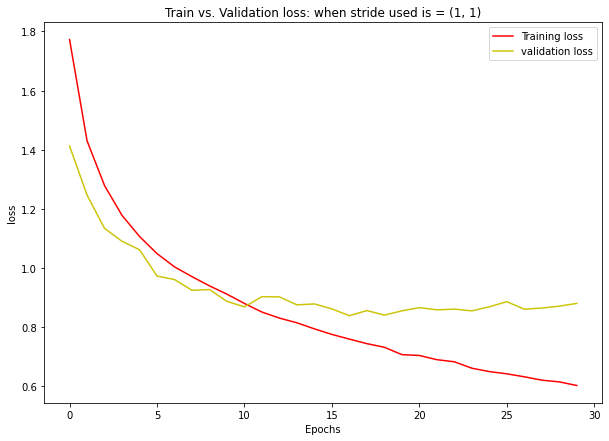

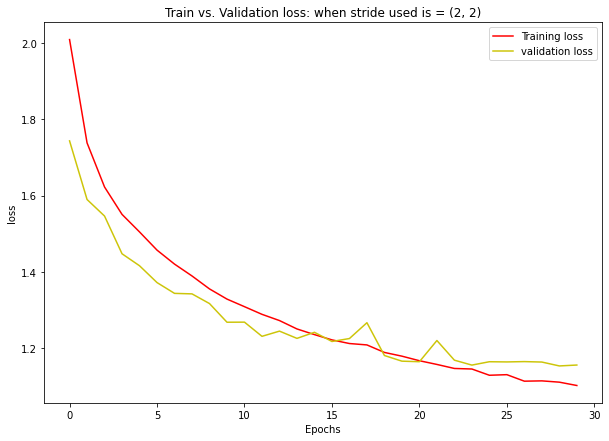

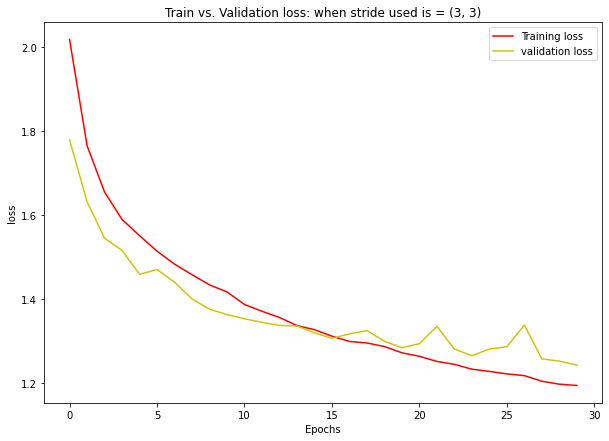

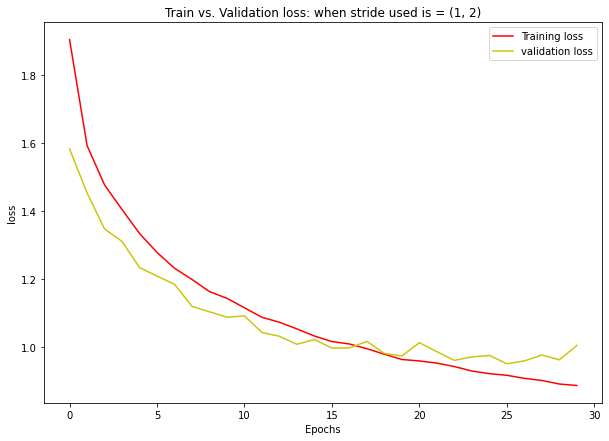

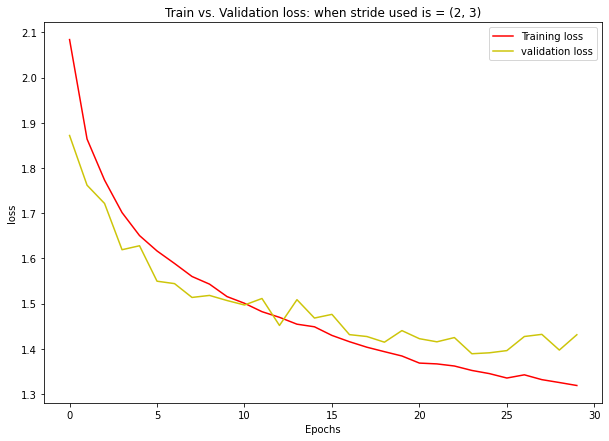

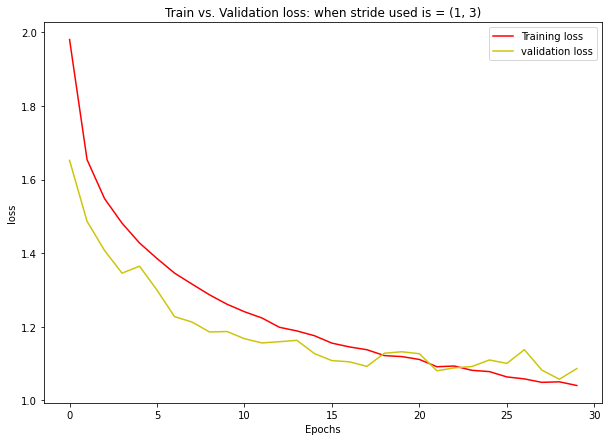

time: 1.65 s (started: 2022-05-28 16:34:57 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different stride values used
generatePlot(history_D, 'stride used is')

<p>With the exception of the stride set (1,1), all other strides have fluactuating validation loss curves which is an indication that as training epochs increase we might start seeing some spikes. Overall, the stride set (1, 1), which is applied at all Convolutional layers has less overfitting, which makes it to the optimal value.</p>

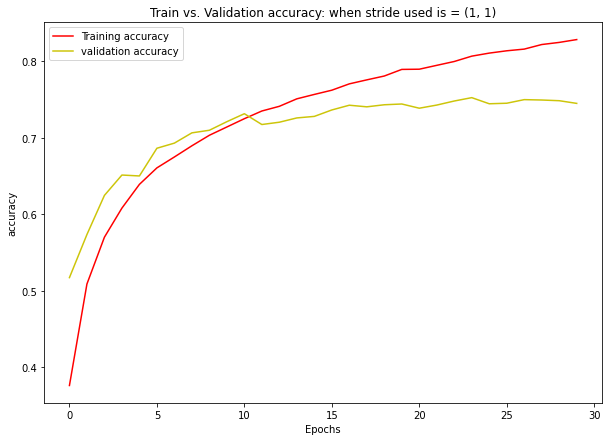

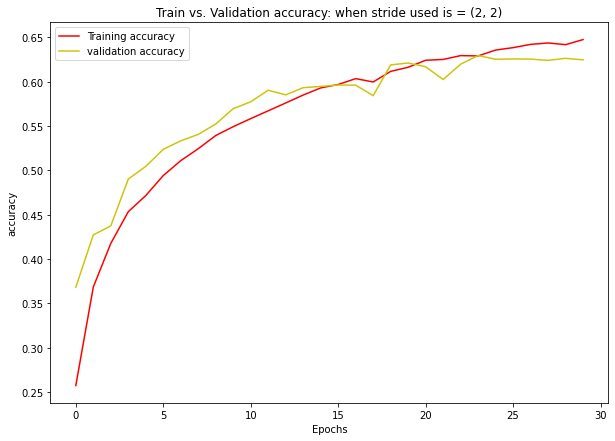

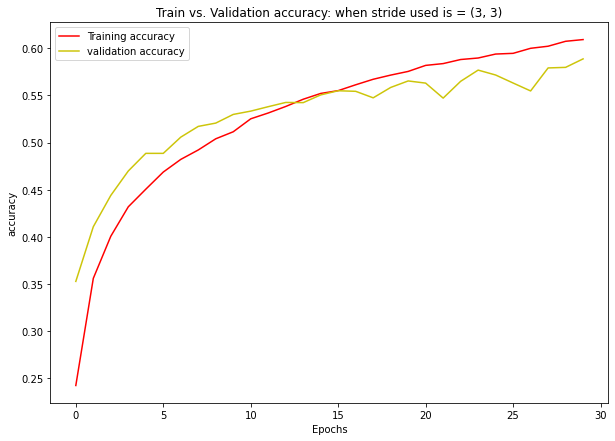

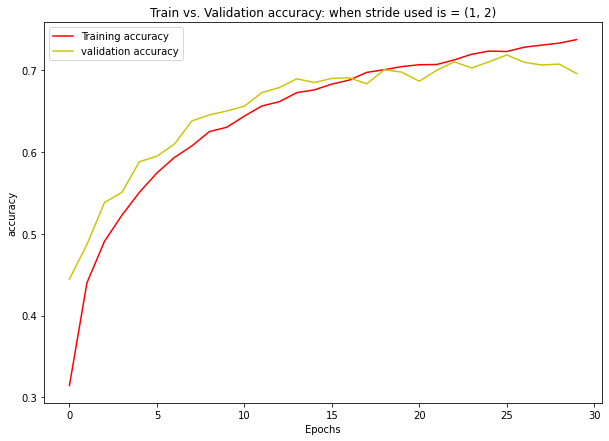

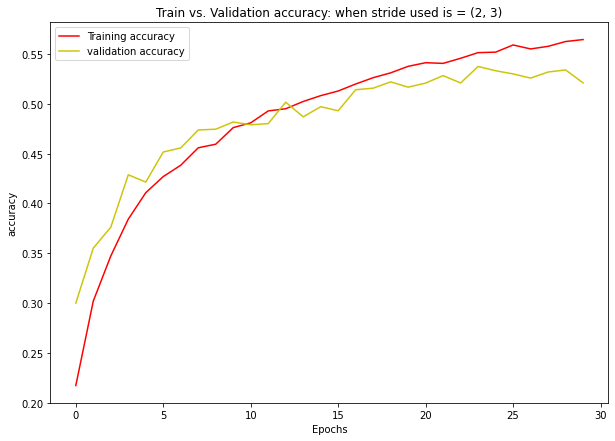

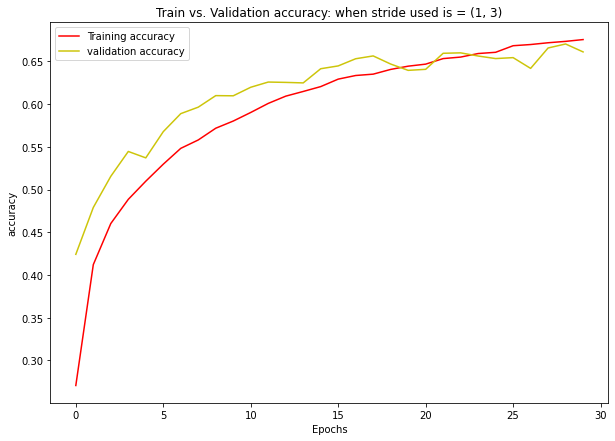

time: 1.25 s (started: 2022-05-28 16:34:58 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'stride used is')

In [ ]:
# helper function that derives and return the different data frames for validation
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'size_of_stride')

time: 2.66 ms (started: 2022-05-28 16:34:59 +00:00)


In [ ]:
val_loss_df

size_of_stride  val_loss
0         (1, 1)  0.880043
1         (2, 2)  1.156553
2         (3, 3)  1.242391
3         (1, 2)  1.004922
4         (2, 3)  1.430946
5         (1, 3)  1.086337

time: 8.32 ms (started: 2022-05-28 16:34:59 +00:00)


In [ ]:
val_accuracy_df

size_of_stride  val_accuracy_L
0         (1, 1)          0.7447
1         (2, 2)          0.6248
2         (3, 3)          0.5887
3         (1, 2)          0.6960
4         (2, 3)          0.5211
5         (1, 3)          0.6612

time: 8.18 ms (started: 2022-05-28 16:34:59 +00:00)


<p>Compared to other stride sets, (1,1) has the highest validation accuracy of 0.75.</p>

In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'size_of_stride')

time: 1.74 ms (started: 2022-05-28 16:34:59 +00:00)


In [ ]:
train_loss_df

size_of_stride  train_loss
0         (1, 1)    0.423000
1         (2, 2)    0.977145
2         (3, 3)    1.085441
3         (1, 2)    0.776171
4         (2, 3)    1.250344
5         (1, 3)    0.902918

time: 6.67 ms (started: 2022-05-28 16:34:59 +00:00)


In [ ]:
train_accuracy_df

size_of_stride  train_accuracy
0         (1, 1)        0.904575
1         (2, 2)        0.686225
2         (3, 3)        0.646975
3         (1, 2)        0.782950
4         (2, 3)        0.588050
5         (1, 3)        0.726300

time: 7.21 ms (started: 2022-05-28 16:35:00 +00:00)


<p>Comparing the two experiments, applying strides to both the first  ,and last Convolutional layers and applying it to all layers, both experiments confirm that stride set (1, 1) is the optimal value so I will go a head and apply it to all layers. </p>

## Add more Convolutional layers

#### Experiment 1: adding 1 more Convolutional layer at each layer and including MaxPooling layer at the last Convolutional layer and also testing for the optimal number of filters

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# first dropout
#model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# last dropout
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
model.summary()

#print(learningRate_L[eta])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# compile the model
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
  
history1 = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_252 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_253 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_168 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_254 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_255 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 8, 8, 64)         0         
 ng2D)                                               

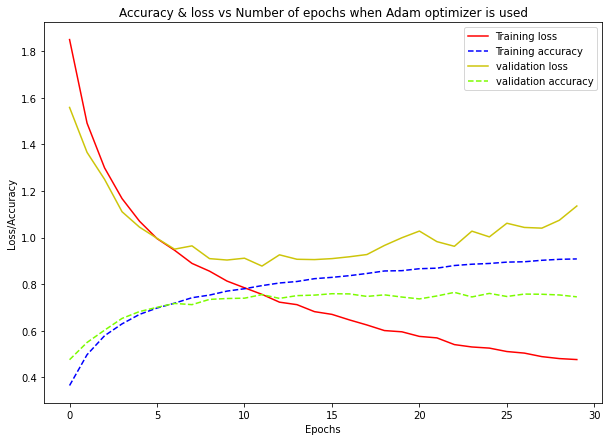

time: 214 ms (started: 2022-05-28 16:36:09 +00:00)


In [ ]:
# helper function that derives the loss and accuracy line charts
deriveLossAccuracyLineCharts(history1.history, 'adding one more Convolutional layer')

In [ ]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

time: 3.54 ms (started: 2022-05-28 16:36:09 +00:00)


In [ ]:
print('Max validation accuracy:  %.4f Min validation loss: %.4f Training accuracy: %.4f'%(max(history1.history['val_accuracy']), min(history1.history['val_loss']), max(history1.history['accuracy'])))

Max validation accuracy:  0.7645 Min validation loss: 0.8775 Training accuracy: 0.9082
time: 928 µs (started: 2022-05-28 16:36:09 +00:00)


#### Adjusting the number of filters

##### Added Convolutional layers on all existing CNN layers

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
num_filters_L = [(24, 48, 80),(32, 64, 64), (32, 64, 128), (64, 96, 128), (32, 96, 80), (32, 48, 128)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(num_filters_L)):
  print('Number of filter pairs being used: %s, %s, %s' %(str(num_filters_L[fact][0]), str(num_filters_L[fact][1]), str(num_filters_L[fact][2])))
  model = models.Sequential()
  # get the first indice of the tuple - num_filters_L[fact][0]
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][2], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(num_filters_L[fact][2], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  # last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((num_filters_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[num_filters_L[fact]] = history

  # compute the loss and accuracy
  val_loss, val_acc = model.evaluate(valid_images, valid_labels)
  train_loss, train_accuracy = model.evaluate(train_images, train_labels)

  # append the val_loss of the current execution to the list
  train_loss_L.append([num_filters_L[fact], train_loss])
  val_loss_L.append([num_filters_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  train_accuracy_L.append([num_filters_L[fact], train_accuracy])
  val_accuracy_L.append([num_filters_L[fact], val_acc])

Number of filter pairs being used: 24, 48, 80
Epoch 1/30
400/400 [==============================] - 3s 6ms/step - loss: 1.9199 - accuracy: 0.3222 - val_loss: 1.5836 - val_accuracy: 0.4423
Epoch 2/30
400/400 [==============================] - 2s 6ms/step - loss: 1.5352 - accuracy: 0.4699 - val_loss: 1.4428 - val_accuracy: 0.4994
Epoch 3/30
400/400 [==============================] - 2s 6ms/step - loss: 1.3790 - accuracy: 0.5344 - val_loss: 1.2199 - val_accuracy: 0.5962
Epoch 4/30
400/400 [==============================] - 2s 6ms/step - loss: 1.2637 - accuracy: 0.5843 - val_loss: 1.2200 - val_accuracy: 0.6043
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1727 - accuracy: 0.6235 - val_loss: 1.0821 - val_accuracy: 0.6569
Epoch 6/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1070 - accuracy: 0.6511 - val_loss: 1.0269 - val_accuracy: 0.6841
Epoch 7/30
400/400 [==============================] - 2s 6ms/step - loss: 1.0620 - accuracy: 0.6691 - 

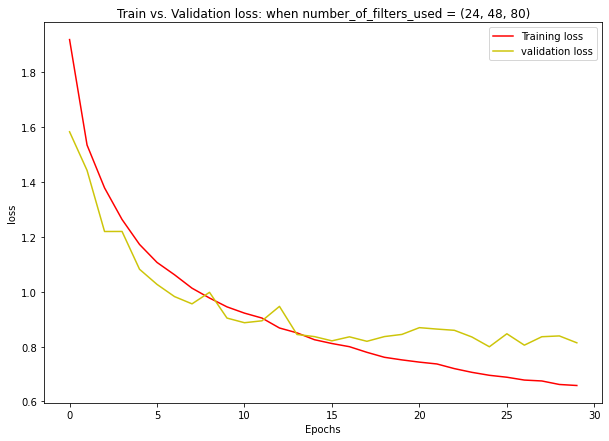

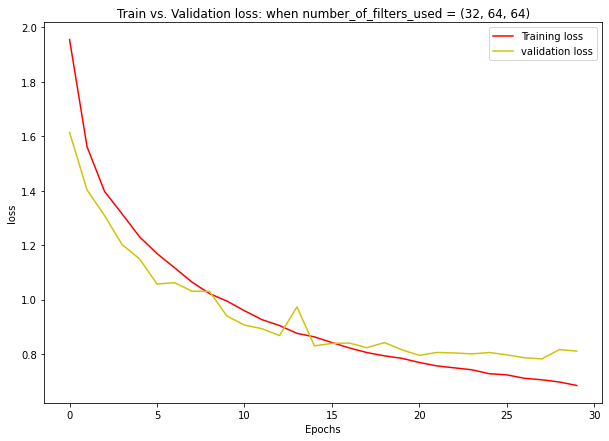

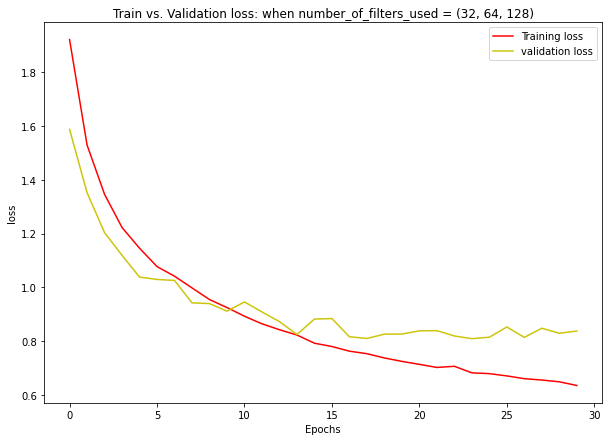

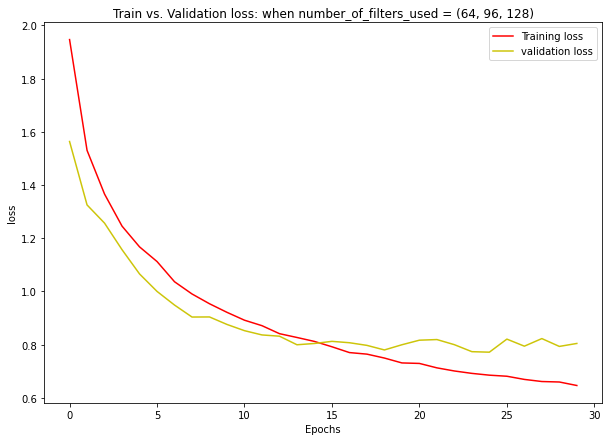

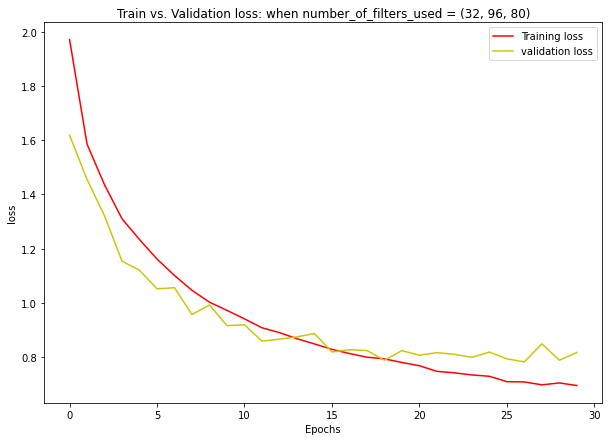

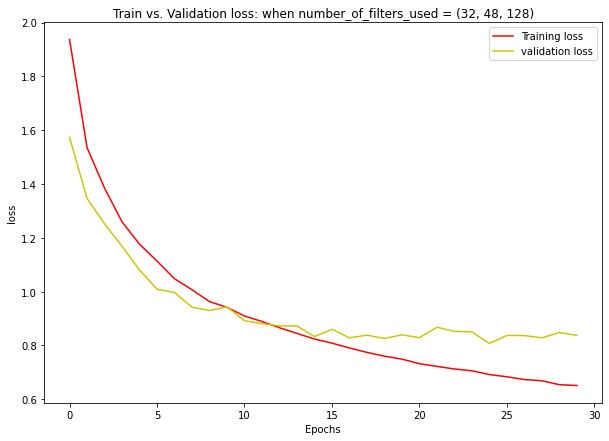

time: 1.23 s (started: 2022-05-28 16:44:15 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different stride values used
generatePlot(history_D, 'number_of_filters_used')

<p>The plots show that training loss and validation loss are off by small margin becuase we have enabled dropout. We also see that validation loss is higher than training loss. Compared to other pairs of filters, (32, 64, 64) experiences less overfitting when there are used consecutively in  the Convolutional layers.</p>

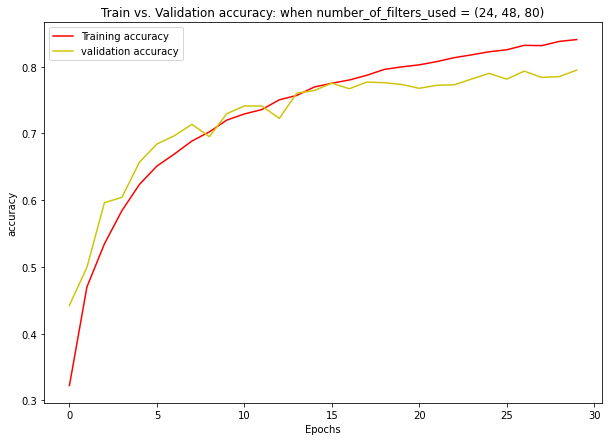

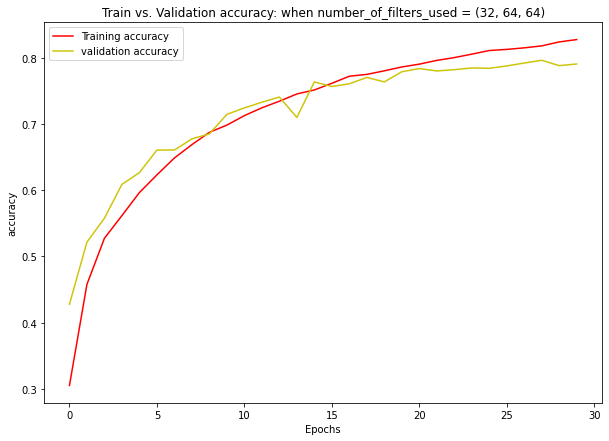

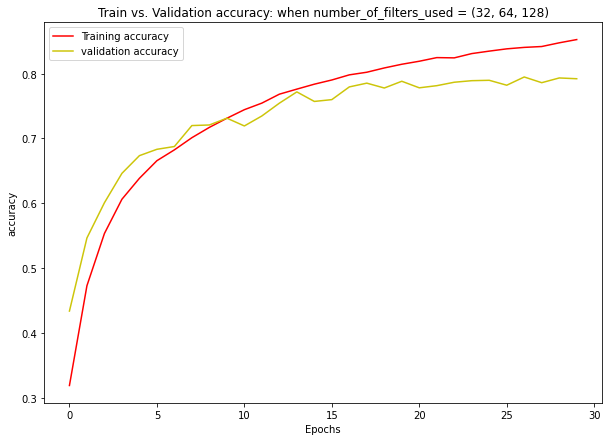

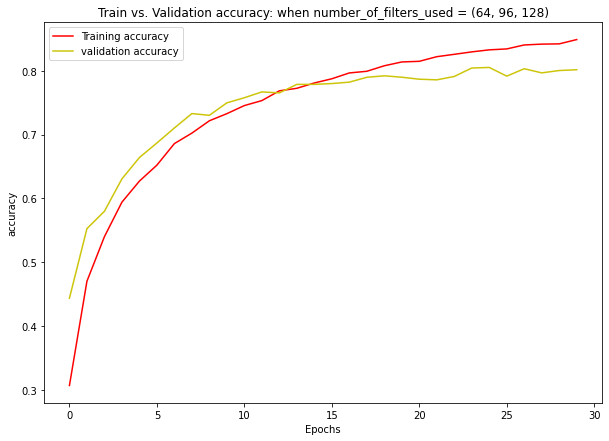

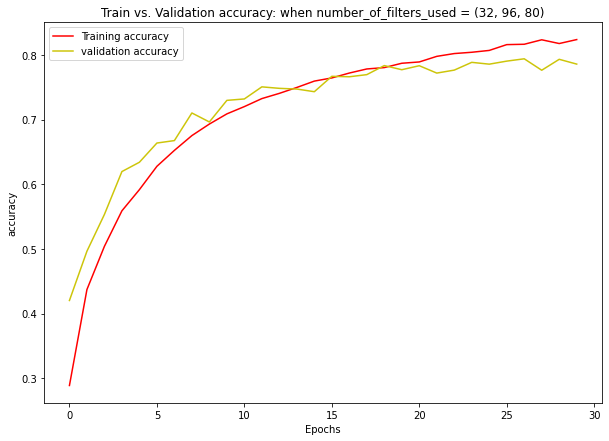

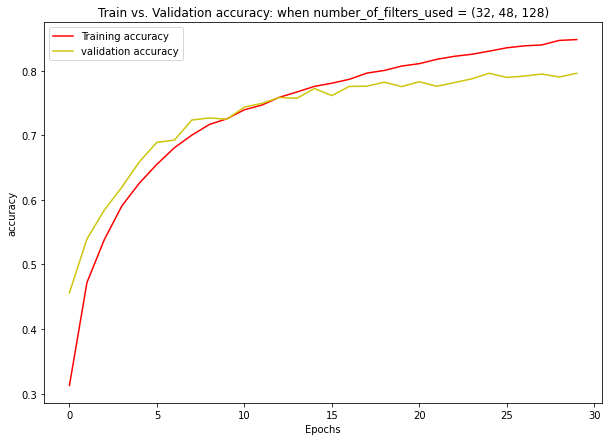

time: 1.2 s (started: 2022-05-28 16:44:16 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'number_of_filters_used')

Amongst all the pairs explored, (32, 64, 64) is the pair with highest validation accuracy and low validation loss.

In [ ]:
# helper function that derives and return the different data frames for validation
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'filter_pairs_used')

time: 2.86 ms (started: 2022-05-28 16:44:17 +00:00)


In [ ]:
val_loss_df

filter_pairs_used  val_loss
0      (24, 48, 80)  0.813829
1      (32, 64, 64)  0.810644
2     (32, 64, 128)  0.837770
3     (64, 96, 128)  0.804535
4      (32, 96, 80)  0.817849
5     (32, 48, 128)  0.837245

time: 7.74 ms (started: 2022-05-28 16:44:17 +00:00)


In [ ]:
val_accuracy_df

filter_pairs_used  val_accuracy_L
0      (24, 48, 80)          0.7949
1      (32, 64, 64)          0.7904
2     (32, 64, 128)          0.7921
3     (64, 96, 128)          0.8014
4      (32, 96, 80)          0.7858
5     (32, 48, 128)          0.7959

time: 7.01 ms (started: 2022-05-28 16:44:17 +00:00)


In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'filter_pairs_used')

time: 1.77 ms (started: 2022-05-28 16:44:17 +00:00)


In [ ]:
train_loss_df

filter_pairs_used  train_loss
0      (24, 48, 80)    0.513565
1      (32, 64, 64)    0.561314
2     (32, 64, 128)    0.497560
3     (64, 96, 128)    0.526103
4      (32, 96, 80)    0.573201
5     (32, 48, 128)    0.496926

time: 7.26 ms (started: 2022-05-28 16:44:17 +00:00)


In [ ]:
train_accuracy_df

filter_pairs_used  train_accuracy
0      (24, 48, 80)        0.898775
1      (32, 64, 64)        0.875750
2     (32, 64, 128)        0.907375
3     (64, 96, 128)        0.895675
4      (32, 96, 80)        0.868350
5     (32, 48, 128)        0.908775

time: 7.05 ms (started: 2022-05-28 16:44:17 +00:00)


##### Removed a CNN layer from the middle layer

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
num_filters_L = [(24, 48, 80),(32, 64, 64), (32, 64, 128), (64, 96, 128), (32, 96, 80), (32, 48, 128)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(num_filters_L)):
  print('Number of filter pairs being used: %s, %s, %s' %(str(num_filters_L[fact][0]), str(num_filters_L[fact][1]), str(num_filters_L[fact][2])))
  model = models.Sequential()
  # get the first indice of the tuple - num_filters_L[fact][0]
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  
  # This Convolutional layer is removed from the network
  # model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][2], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(num_filters_L[fact][2], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  #last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((num_filters_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[num_filters_L[fact]] = history

  # compute the loss and accuracy
  val_loss, val_acc = model.evaluate(valid_images, valid_labels)
  train_loss, train_accuracy = model.evaluate(train_images, train_labels)

  # append the val_loss of the current execution to the list
  train_loss_L.append([num_filters_L[fact], train_loss])
  val_loss_L.append([num_filters_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  train_accuracy_L.append([num_filters_L[fact], train_accuracy])
  val_accuracy_L.append([num_filters_L[fact], val_acc])

Number of filter pairs being used: 24, 48, 80
Epoch 1/30
400/400 [==============================] - 3s 6ms/step - loss: 1.8581 - accuracy: 0.3473 - val_loss: 1.5307 - val_accuracy: 0.4656
Epoch 2/30
400/400 [==============================] - 2s 5ms/step - loss: 1.5014 - accuracy: 0.4872 - val_loss: 1.3011 - val_accuracy: 0.5616
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 1.3460 - accuracy: 0.5543 - val_loss: 1.1960 - val_accuracy: 0.6096
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 1.2326 - accuracy: 0.5996 - val_loss: 1.1065 - val_accuracy: 0.6397
Epoch 5/30
400/400 [==============================] - 2s 5ms/step - loss: 1.1604 - accuracy: 0.6288 - val_loss: 1.0746 - val_accuracy: 0.6638
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 1.0828 - accuracy: 0.6615 - val_loss: 0.9959 - val_accuracy: 0.6900
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 1.0372 - accuracy: 0.6796 - 

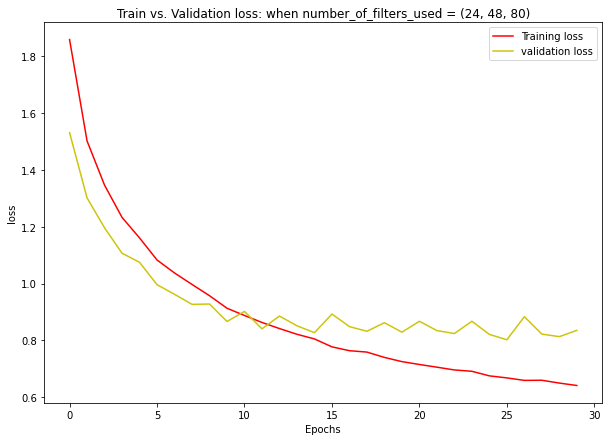

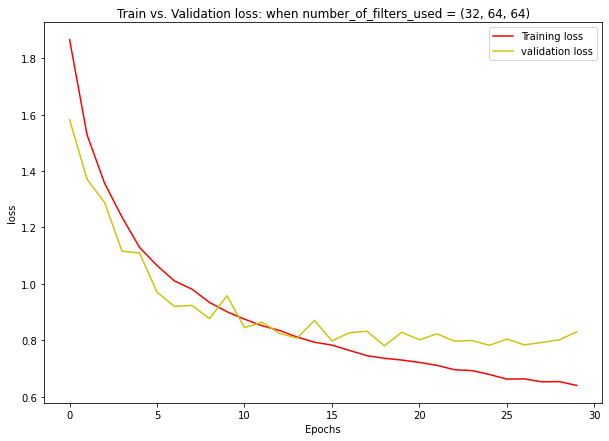

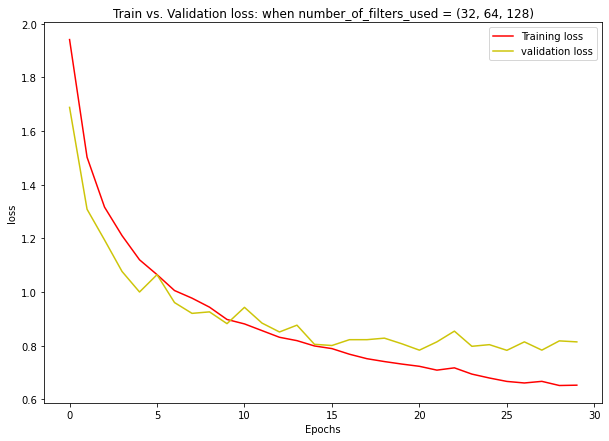

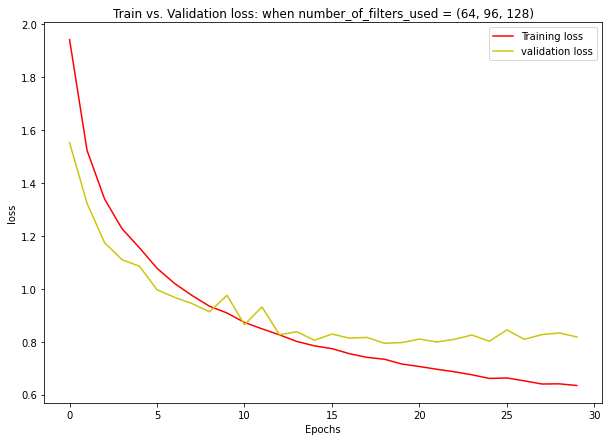

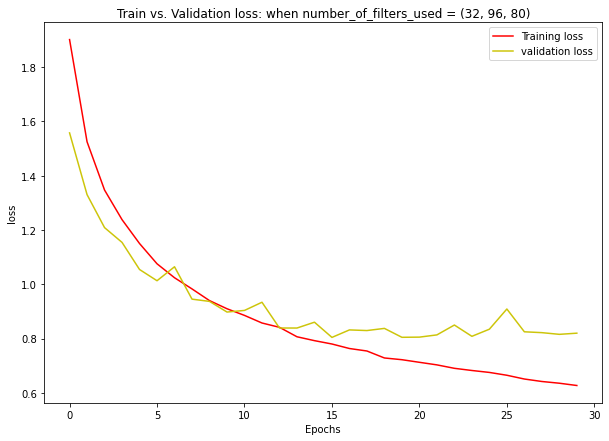

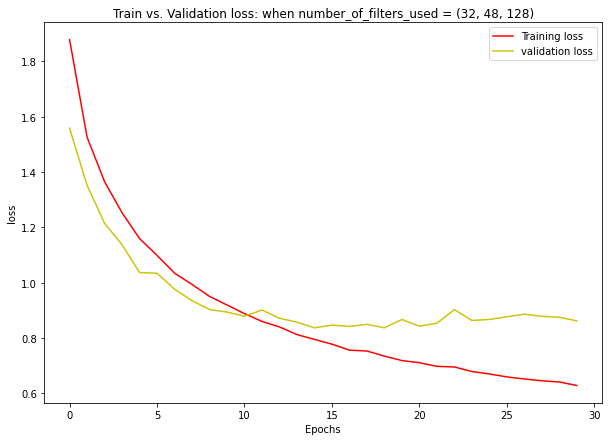

time: 1.27 s (started: 2022-05-28 16:51:45 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different stride values used
generatePlot(history_D, 'number_of_filters_used')

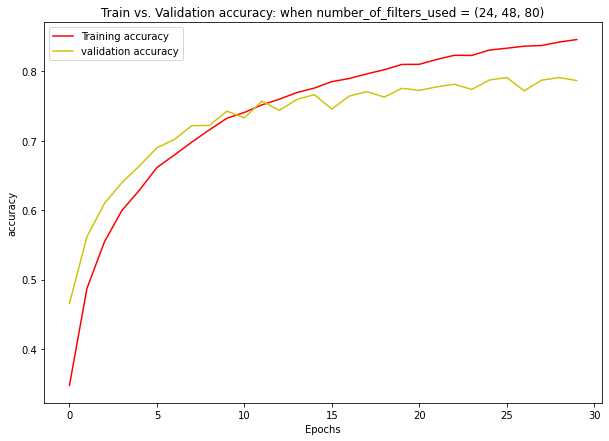

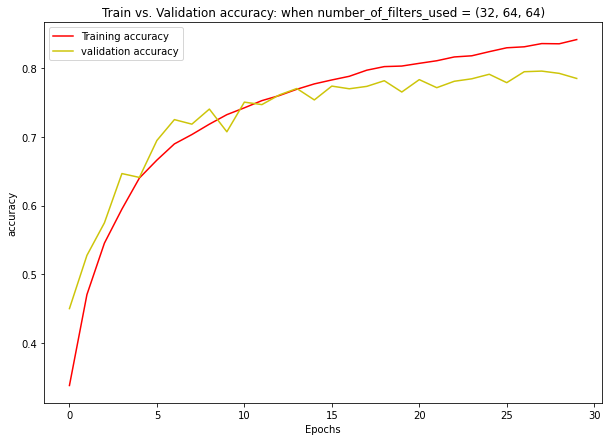

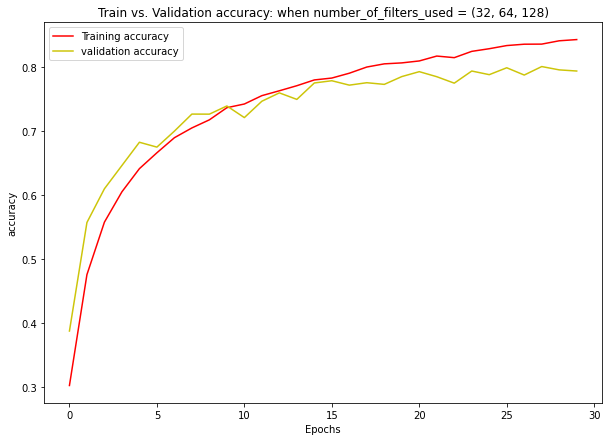

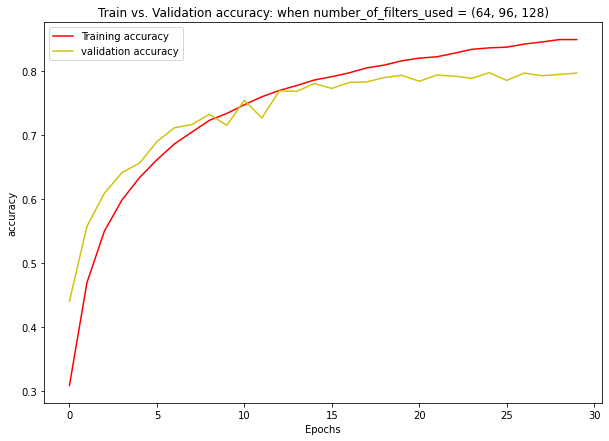

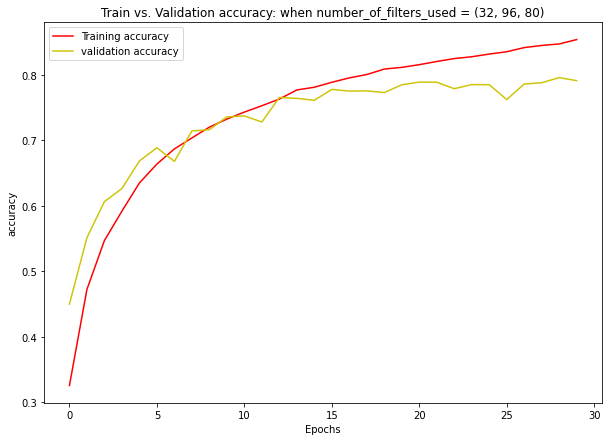

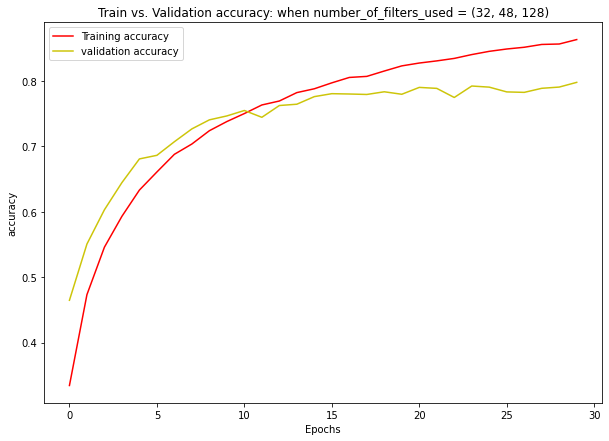

time: 1.25 s (started: 2022-05-28 16:51:47 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'number_of_filters_used')

<p>In this experiment we observer that pair (64, 96, 128) has the highest validation accuracy and low validation loss</p>

In [ ]:
# helper function that derives and return the different data frames for validation
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'filter_pairs_used')

time: 2.82 ms (started: 2022-05-28 16:51:48 +00:00)


In [ ]:
val_loss_df

filter_pairs_used  val_loss
0      (24, 48, 80)  0.835219
1      (32, 64, 64)  0.830244
2     (32, 64, 128)  0.814035
3     (64, 96, 128)  0.817679
4      (32, 96, 80)  0.819811
5     (32, 48, 128)  0.862315

time: 9.07 ms (started: 2022-05-28 16:51:48 +00:00)


In [ ]:
val_accuracy_df

filter_pairs_used  val_accuracy_L
0      (24, 48, 80)          0.7869
1      (32, 64, 64)          0.7847
2     (32, 64, 128)          0.7943
3     (64, 96, 128)          0.7962
4      (32, 96, 80)          0.7908
5     (32, 48, 128)          0.7976

time: 7.11 ms (started: 2022-05-28 16:51:48 +00:00)


In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'filter_pairs_used')

time: 2.04 ms (started: 2022-05-28 16:51:48 +00:00)


In [ ]:
train_loss_df

filter_pairs_used  train_loss
0      (24, 48, 80)    0.498548
1      (32, 64, 64)    0.497898
2     (32, 64, 128)    0.493422
3     (64, 96, 128)    0.485107
4      (32, 96, 80)    0.518951
5     (32, 48, 128)    0.474453

time: 7.88 ms (started: 2022-05-28 16:51:48 +00:00)


In [ ]:
train_accuracy_df

filter_pairs_used  train_accuracy
0      (24, 48, 80)        0.903950
1      (32, 64, 64)        0.891850
2     (32, 64, 128)        0.903900
3     (64, 96, 128)        0.913025
4      (32, 96, 80)        0.902775
5     (32, 48, 128)        0.927050

time: 7.58 ms (started: 2022-05-28 16:51:48 +00:00)


##### Removing one Convolutional layer from the last CNN

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
num_filters_L = [(24, 48, 80),(32, 64, 64), (32, 64, 128), (64, 96, 128), (32, 96, 80), (32, 48, 128)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(num_filters_L)):
  print('Number of filter pairs being used: %s, %s, %s' %(str(num_filters_L[fact][0]), str(num_filters_L[fact][1]), str(num_filters_L[fact][2])))
  model = models.Sequential()
  # get the first indice of the tuple - num_filters_L[fact][0]
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][2], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  #last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((num_filters_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[num_filters_L[fact]] = history

  # compute the loss and accuracy
  val_loss, val_acc = model.evaluate(valid_images, valid_labels)
  train_loss, train_accuracy = model.evaluate(train_images, train_labels)

  # append the val_loss of the current execution to the list
  train_loss_L.append([num_filters_L[fact], train_loss])
  val_loss_L.append([num_filters_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  train_accuracy_L.append([num_filters_L[fact], train_accuracy])
  val_accuracy_L.append([num_filters_L[fact], val_acc])

Number of filter pairs being used: 24, 48, 80
Epoch 1/30
400/400 [==============================] - 3s 6ms/step - loss: 1.8238 - accuracy: 0.3532 - val_loss: 1.4640 - val_accuracy: 0.4905
Epoch 2/30
400/400 [==============================] - 2s 5ms/step - loss: 1.4563 - accuracy: 0.4979 - val_loss: 1.3005 - val_accuracy: 0.5683
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 1.3056 - accuracy: 0.5616 - val_loss: 1.1464 - val_accuracy: 0.6234
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 1.1979 - accuracy: 0.6059 - val_loss: 1.1105 - val_accuracy: 0.6432
Epoch 5/30
400/400 [==============================] - 2s 5ms/step - loss: 1.1255 - accuracy: 0.6344 - val_loss: 1.0299 - val_accuracy: 0.6671
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 1.0665 - accuracy: 0.6590 - val_loss: 1.0497 - val_accuracy: 0.6737
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 1.0257 - accuracy: 0.6758 - 

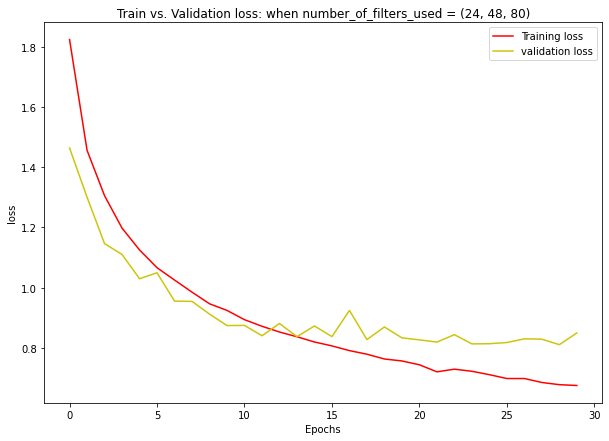

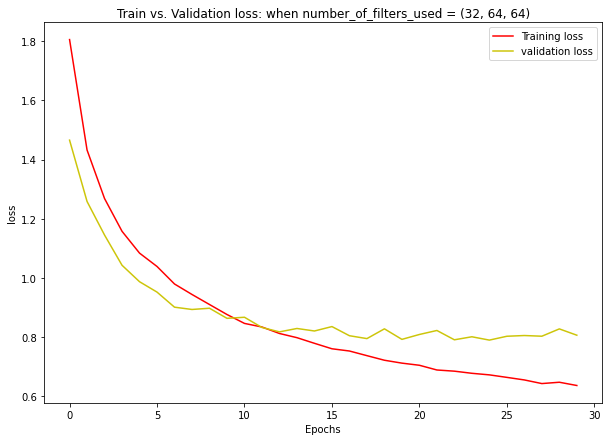

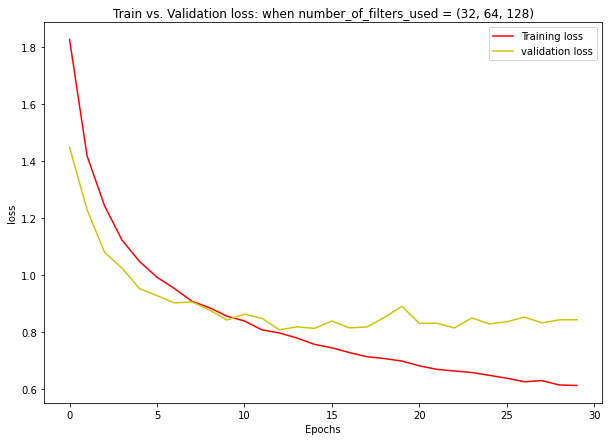

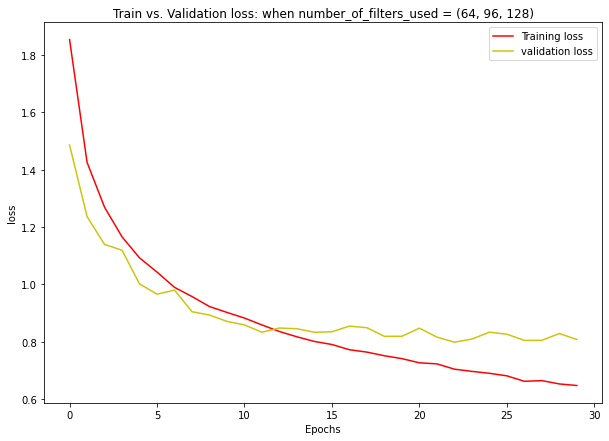

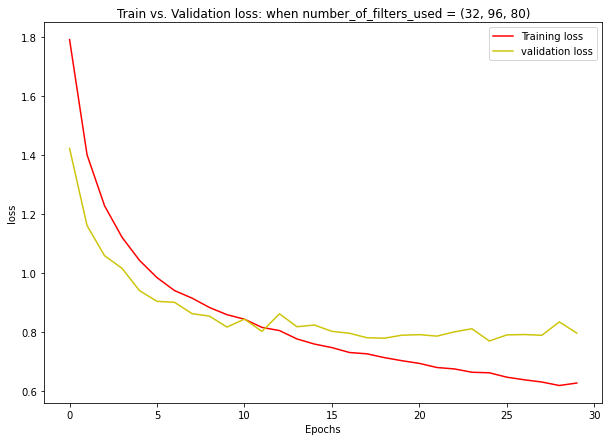

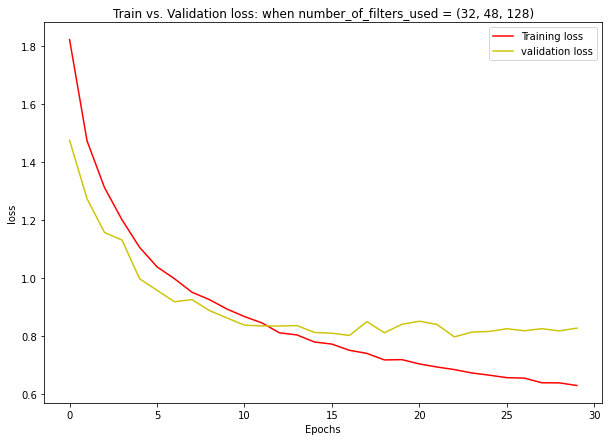

time: 1.19 s (started: 2022-05-28 16:58:42 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different stride values used
generatePlot(history_D, 'number_of_filters_used')

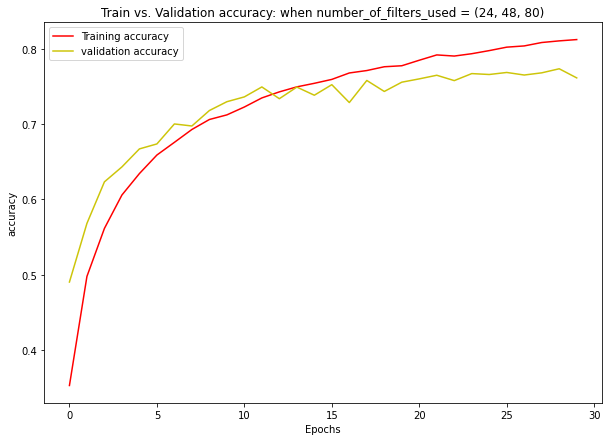

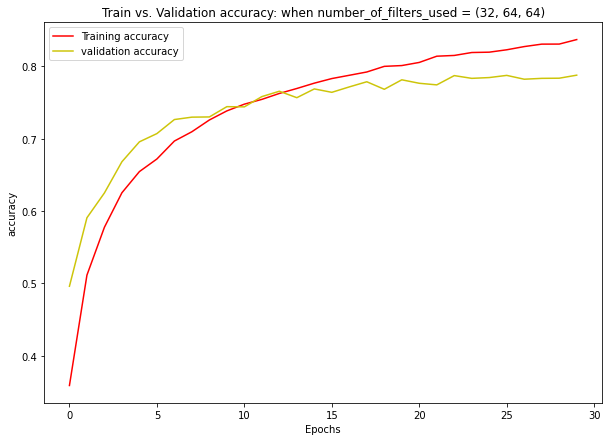

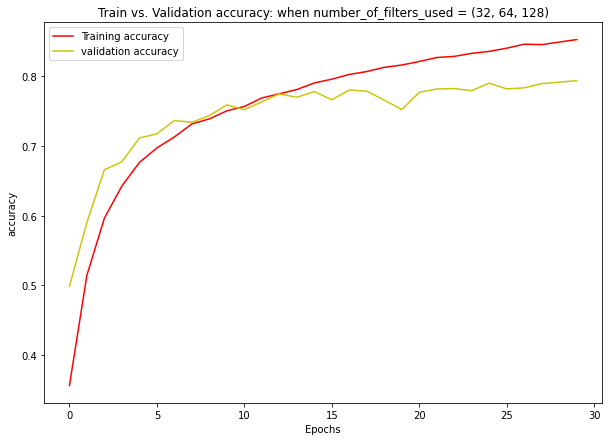

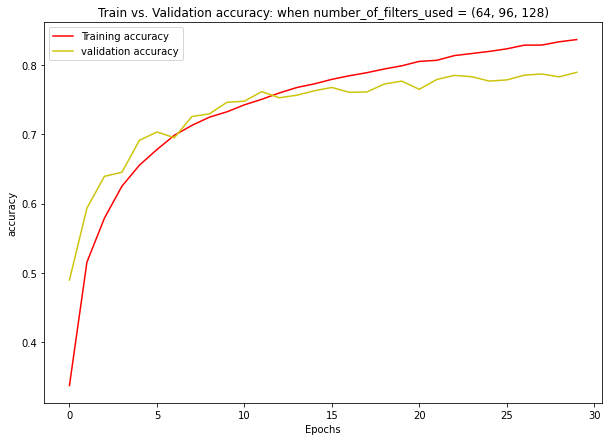

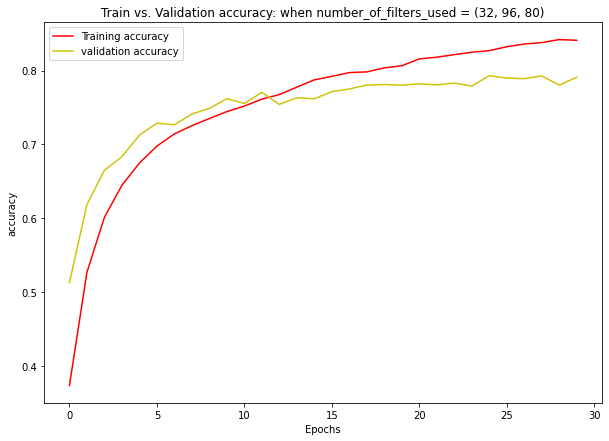

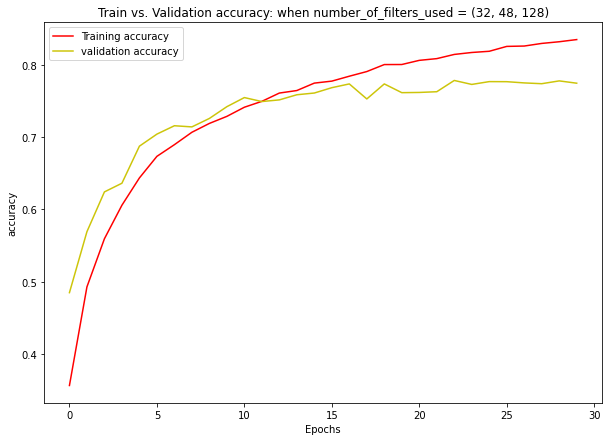

time: 1.15 s (started: 2022-05-28 16:58:44 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'number_of_filters_used')

<p>In this experiment we observer that pair (64, 96, 128) has the highest validation accuracy and low validation loss</p>

In [ ]:
# helper function that derives and return the different data frames for validation
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'filter_pairs_used')

time: 2.97 ms (started: 2022-05-28 16:58:45 +00:00)


In [ ]:
val_loss_df

filter_pairs_used  val_loss
0      (24, 48, 80)  0.849942
1      (32, 64, 64)  0.805711
2     (32, 64, 128)  0.841988
3     (64, 96, 128)  0.807477
4      (32, 96, 80)  0.796447
5     (32, 48, 128)  0.828286

time: 7.57 ms (started: 2022-05-28 16:58:45 +00:00)


In [ ]:
val_accuracy_df

filter_pairs_used  val_accuracy_L
0      (24, 48, 80)          0.7613
1      (32, 64, 64)          0.7878
2     (32, 64, 128)          0.7938
3     (64, 96, 128)          0.7896
4      (32, 96, 80)          0.7909
5     (32, 48, 128)          0.7748

time: 7.75 ms (started: 2022-05-28 16:58:45 +00:00)


In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'filter_pairs_used')

time: 1.56 ms (started: 2022-05-28 16:58:45 +00:00)


In [ ]:
train_loss_df

filter_pairs_used  train_loss
0      (24, 48, 80)    0.530476
1      (32, 64, 64)    0.469557
2     (32, 64, 128)    0.429819
3     (64, 96, 128)    0.465815
4      (32, 96, 80)    0.453246
5     (32, 48, 128)    0.468647

time: 8.6 ms (started: 2022-05-28 16:58:45 +00:00)


In [ ]:
train_accuracy_df

filter_pairs_used  train_accuracy
0      (24, 48, 80)        0.872200
1      (32, 64, 64)        0.899800
2     (32, 64, 128)        0.925375
3     (64, 96, 128)        0.911825
4      (32, 96, 80)        0.916575
5     (32, 48, 128)        0.905775

time: 8.24 ms (started: 2022-05-28 16:58:45 +00:00)


<ul>We peformed three experiments namely:
<li>Added Convolutional layers on the existing CNN layers in the network where we explored the different number of filters.</li>
<li>Removed a Convolutional layer from the middle layer explored the different number of filters optimal for the network.</li>
<li>Removed one Convolutional layer from the last Convolutional layer then explored the different number of filters optimal for the network.<li>
</ul>

<p>Through the different experiments carried out, we discovered that the set (32, 64, 64) had the highest validation accuracy and lowest validation loss amongest all pairs we used. 32 was applied to the first set of Convolutional layer, 64 was applied to the second (in the middle) and third set of Convolutional layer.<p>

##### Removing the middle Convolutional layer from the network. 

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
num_filters_L = [(24, 48, 80),(32, 64, 64), (32, 64, 128), (64, 96, 128), (32, 96, 80), (32, 48, 128)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(num_filters_L)):
  print('Number of filter pairs being used: %s, %s, %s' %(str(num_filters_L[fact][0]), str(num_filters_L[fact][1]), str(num_filters_L[fact][2])))
  model = models.Sequential()
  # get the first indice of the tuple - num_filters_L[fact][0]
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(num_filters_L[fact][0], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  #model.add(layers.Conv2D(num_filters_L[fact][1], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  #model.add(layers.MaxPooling2D((2, 2)))

  # get the second indice of the tuple - num_filters_L[fact][1]
  model.add(layers.Conv2D(num_filters_L[fact][2], (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  #last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((num_filters_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[num_filters_L[fact]] = history

  # compute the loss and accuracy
  val_loss, val_acc = model.evaluate(valid_images, valid_labels)
  train_loss, train_accuracy = model.evaluate(train_images, train_labels)

  # append the val_loss of the current execution to the list
  train_loss_L.append([num_filters_L[fact], train_loss])
  val_loss_L.append([num_filters_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  train_accuracy_L.append([num_filters_L[fact], train_accuracy])
  val_accuracy_L.append([num_filters_L[fact], val_acc])

Number of filter pairs being used: 24, 48, 80
Epoch 1/30
400/400 [==============================] - 2s 5ms/step - loss: 1.7834 - accuracy: 0.3528 - val_loss: 1.4132 - val_accuracy: 0.4989
Epoch 2/30
400/400 [==============================] - 2s 4ms/step - loss: 1.4374 - accuracy: 0.4929 - val_loss: 1.2222 - val_accuracy: 0.5752
Epoch 3/30
400/400 [==============================] - 2s 4ms/step - loss: 1.2897 - accuracy: 0.5542 - val_loss: 1.1330 - val_accuracy: 0.6185
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1835 - accuracy: 0.5991 - val_loss: 1.0342 - val_accuracy: 0.6549
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 1.1182 - accuracy: 0.6223 - val_loss: 1.0320 - val_accuracy: 0.6608
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0648 - accuracy: 0.6454 - val_loss: 0.9618 - val_accuracy: 0.6887
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 1.0171 - accuracy: 0.6619 - 

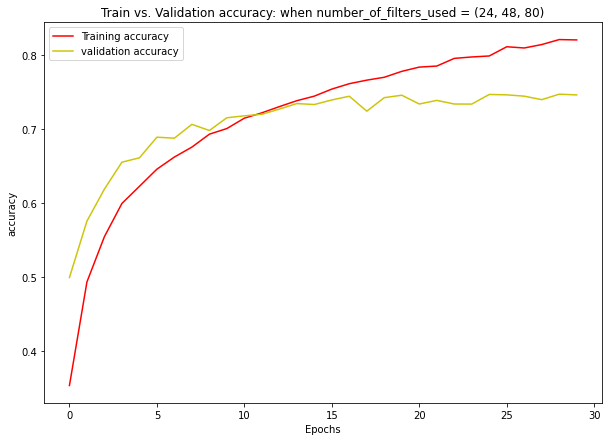

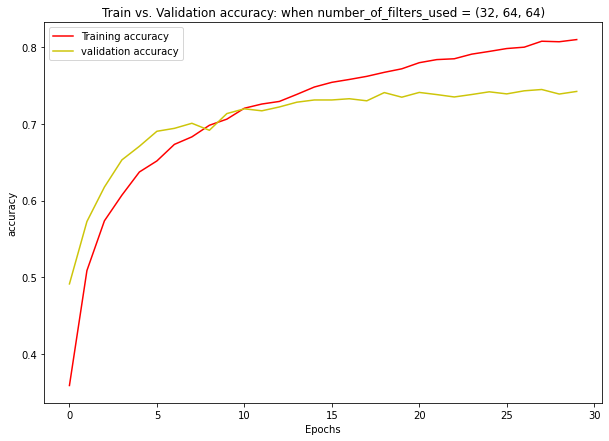

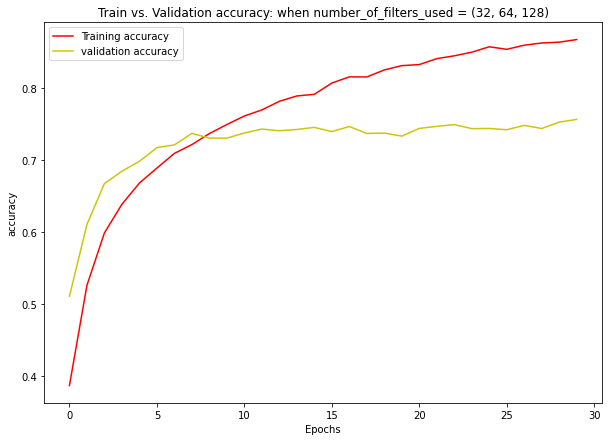

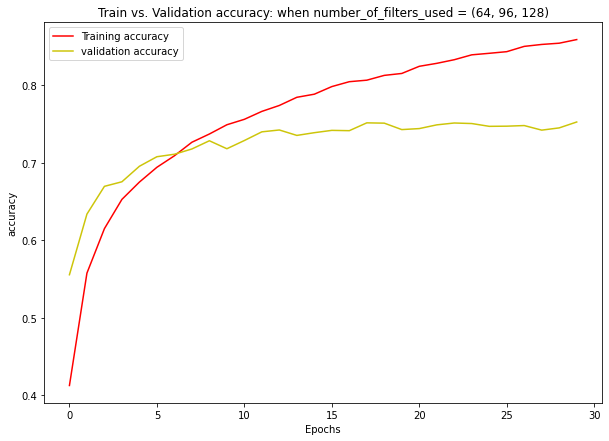

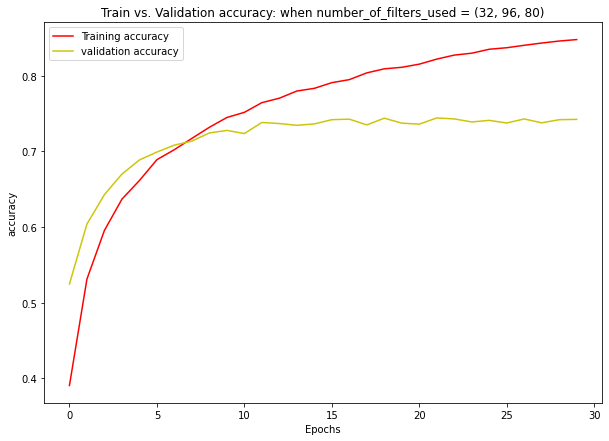

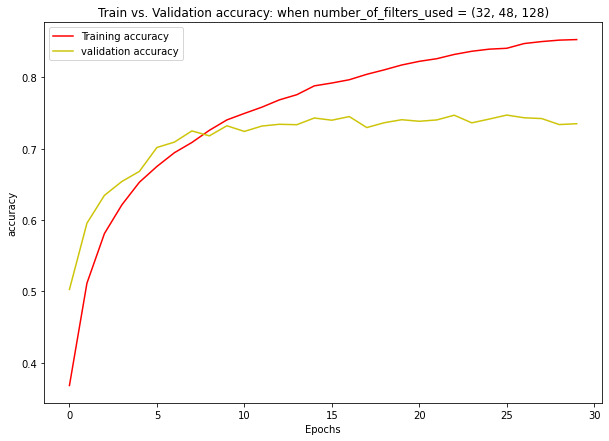

time: 1.2 s (started: 2022-05-28 17:05:07 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'number_of_filters_used')

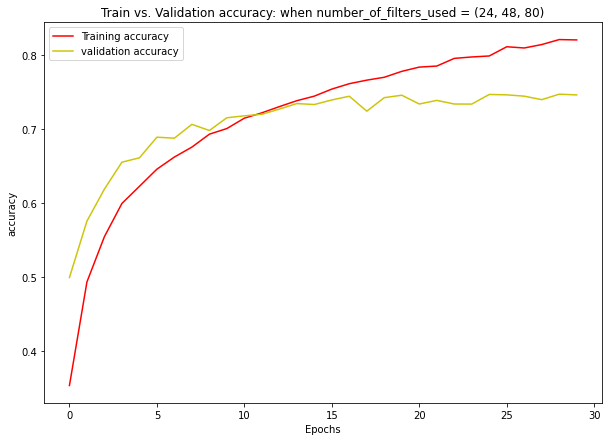

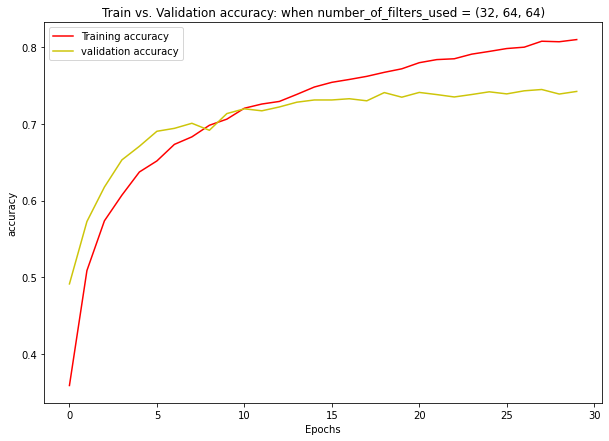

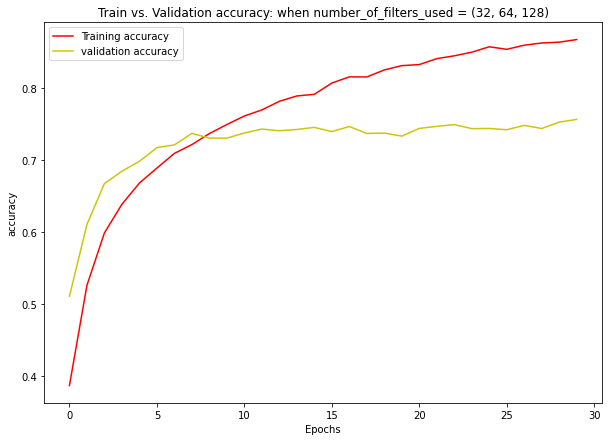

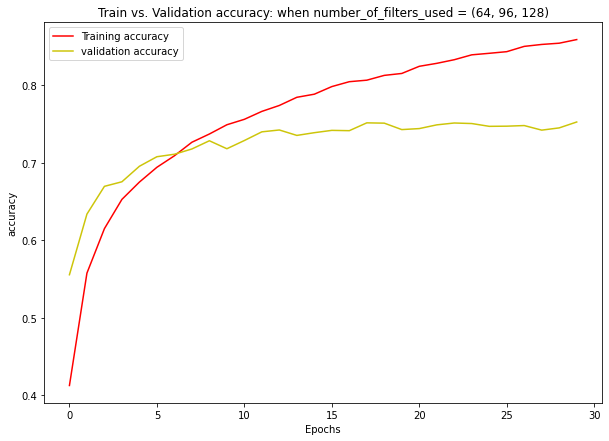

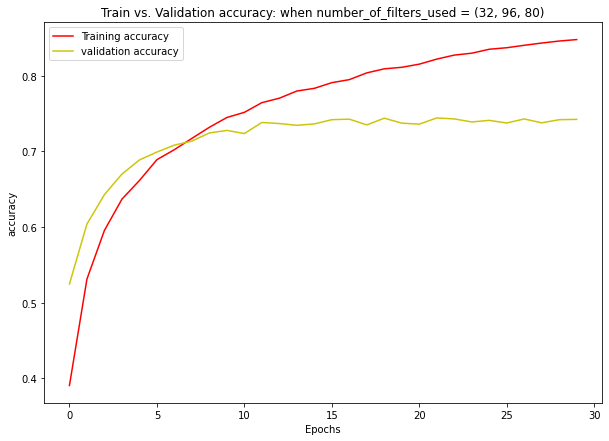

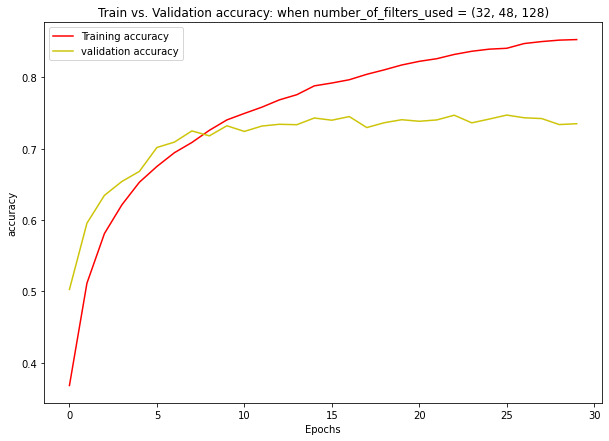

time: 1.18 s (started: 2022-05-28 17:05:08 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'number_of_filters_used')

In [ ]:
# helper function that derives and return the different data frames for validation
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'filter_pairs_used')

time: 2.79 ms (started: 2022-05-28 17:05:09 +00:00)


In [ ]:
val_loss_df

filter_pairs_used  val_loss
0      (24, 48, 80)  0.879020
1      (32, 64, 64)  0.867806
2     (32, 64, 128)  0.948663
3     (64, 96, 128)  0.932751
4      (32, 96, 80)  0.925008
5     (32, 48, 128)  1.007046

time: 7.98 ms (started: 2022-05-28 17:05:09 +00:00)


In [ ]:
val_accuracy_df

filter_pairs_used  val_accuracy_L
0      (24, 48, 80)          0.7459
1      (32, 64, 64)          0.7418
2     (32, 64, 128)          0.7561
3     (64, 96, 128)          0.7525
4      (32, 96, 80)          0.7422
5     (32, 48, 128)          0.7349

time: 8.28 ms (started: 2022-05-28 17:05:09 +00:00)


#### Let's create a network with the best model parameters including the Convolution layers added.

In [ ]:
# a helper function that returns model's history after compiling the network, train and fit the model with the data
history_withMoreLayers = buildbestModel(100, 0.001, 0.001, 0.2, 'Added more Convolution layers')

Debugging if statement: Added more Convolution layers
Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_366 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_367 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_237 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_368 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_369 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_238 (MaxPooli  (None, 8, 8, 64)         0        

In [ ]:
print('The validation accuracy is %.4f.' %(max(history_withMoreLayers.history['val_accuracy'])))
print('The validation loss is %.4f.' %(min(history_withMoreLayers.history['val_loss'])))

The validation accuracy is 0.7925.
The validation loss is 0.7852.
time: 1.6 ms (started: 2022-05-28 17:06:19 +00:00)


##### Save the model to the drive and reload it

In [ ]:
# helper function that saves the current model to the file system.
saveModel('CNN_image_classification_WithMoreLayers.model')

INFO:tensorflow:Assets written to: CNN_image_classification_WithMoreLayers.model/assets
time: 2.35 s (started: 2022-05-28 17:06:19 +00:00)


##### Make the predictions and write the results to a csv file

In [ ]:
# let's make the required predictions
predictions = model.predict([test_images])

time: 741 ms (started: 2022-05-28 17:06:22 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 156 ms (started: 2022-05-28 17:06:22 +00:00)


#### Number of units to be used in the dense layer

<p>Since we increased the number of Convolutional layers, we need to determine the optimal number of units to be used in the dense layer once again.</p>

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
dense_units_L = [16, 32, 64, 128, 256, 512, 1024, 2048]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(dense_units_L)):
  print('Dense units being used are : %s' %(str(dense_units_L[fact])))
  model = models.Sequential()
  
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(128, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #first dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(dense_units_L[fact], activation='relu'))

  #last dropout
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((dense_units_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[dense_units_L[fact]] = history

  # compute the loss and accuracy
  val_loss, val_acc = model.evaluate(valid_images, valid_labels)
  train_loss, train_accuracy = model.evaluate(train_images, train_labels)

  # append the val_loss of the current execution to the list
  train_loss_L.append([dense_units_L[fact], train_loss])
  val_loss_L.append([dense_units_L[fact], val_loss])

  # append the validation accuracy of the current execution to the list 
  train_accuracy_L.append([dense_units_L[fact], train_accuracy])
  val_accuracy_L.append([dense_units_L[fact], val_acc])

Dense units being used are : 16
Epoch 1/30
400/400 [==============================] - 3s 6ms/step - loss: 2.0703 - accuracy: 0.2210 - val_loss: 1.8004 - val_accuracy: 0.3278
Epoch 2/30
400/400 [==============================] - 2s 6ms/step - loss: 1.8402 - accuracy: 0.3042 - val_loss: 1.6758 - val_accuracy: 0.3846
Epoch 3/30
400/400 [==============================] - 2s 6ms/step - loss: 1.7422 - accuracy: 0.3444 - val_loss: 1.5600 - val_accuracy: 0.4553
Epoch 4/30
400/400 [==============================] - 2s 6ms/step - loss: 1.6859 - accuracy: 0.3762 - val_loss: 1.5419 - val_accuracy: 0.4558
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 1.6381 - accuracy: 0.4044 - val_loss: 1.4581 - val_accuracy: 0.5009
Epoch 6/30
400/400 [==============================] - 2s 6ms/step - loss: 1.6037 - accuracy: 0.4253 - val_loss: 1.3819 - val_accuracy: 0.5321
Epoch 7/30
400/400 [==============================] - 2s 6ms/step - loss: 1.5611 - accuracy: 0.4484 - val_loss: 1.43

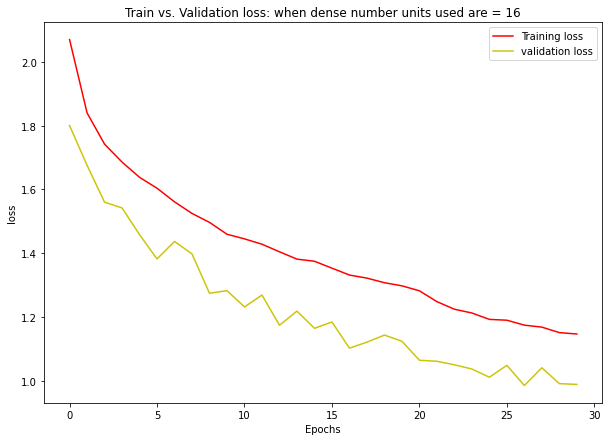

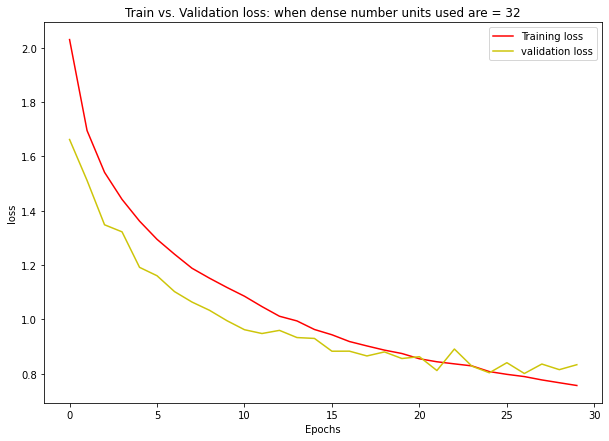

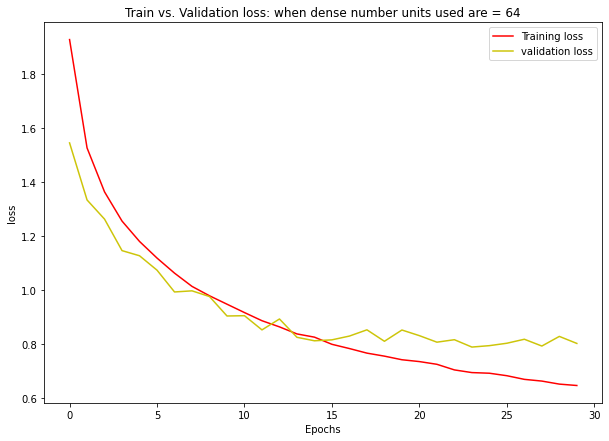

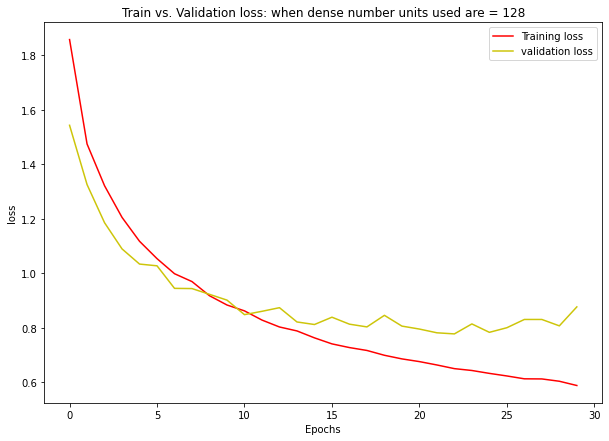

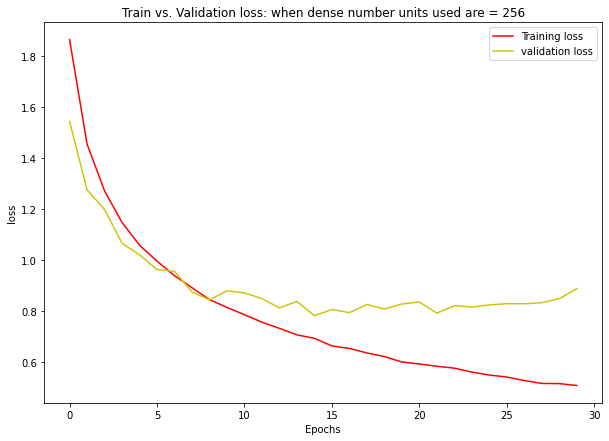

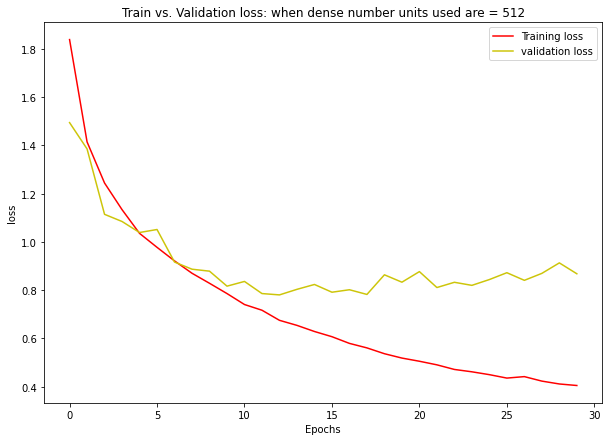

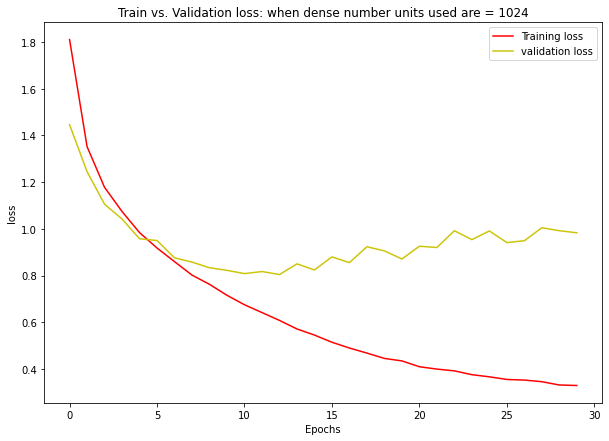

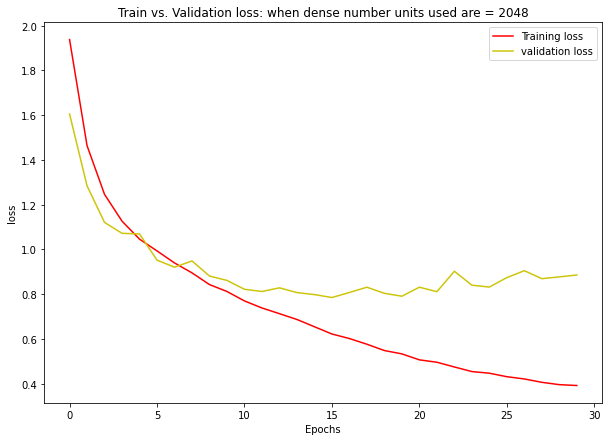

time: 2.02 s (started: 2022-05-28 17:16:52 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different stride values used
generatePlot(history_D, 'dense number units used are')

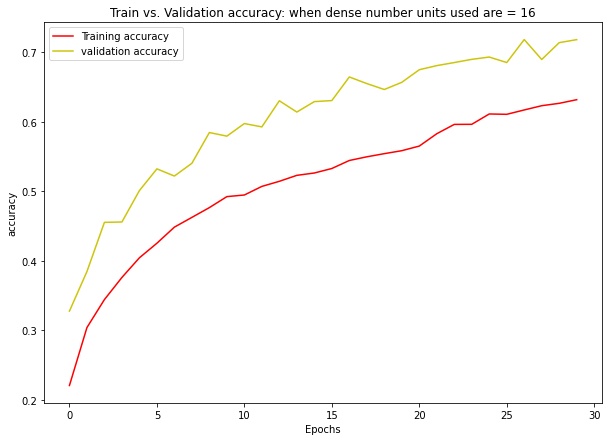

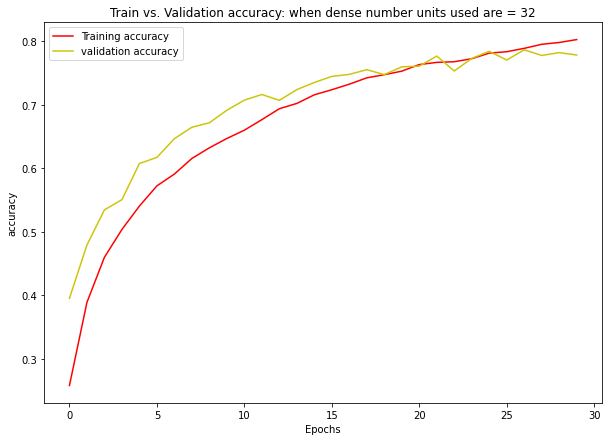

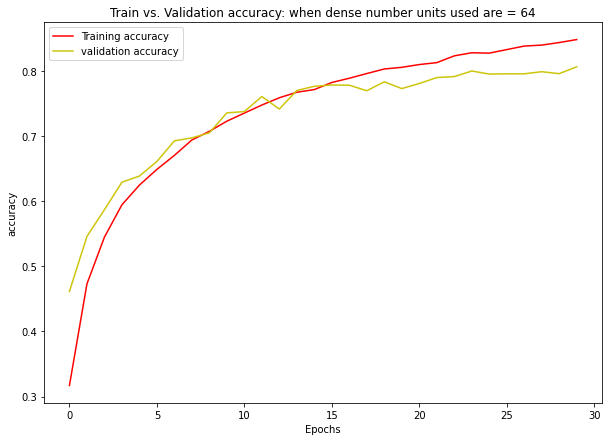

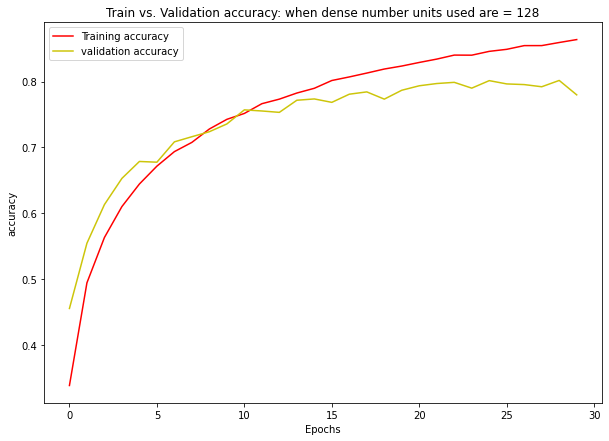

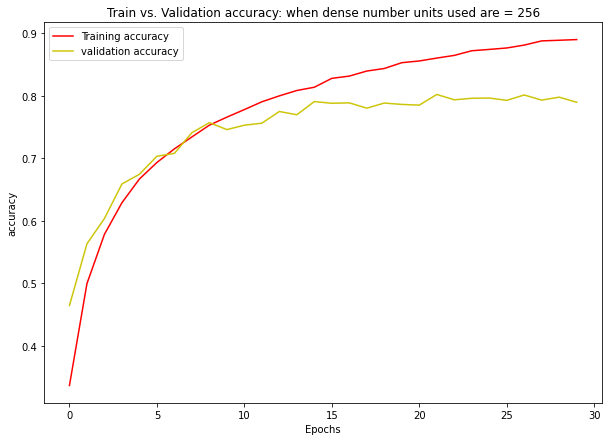

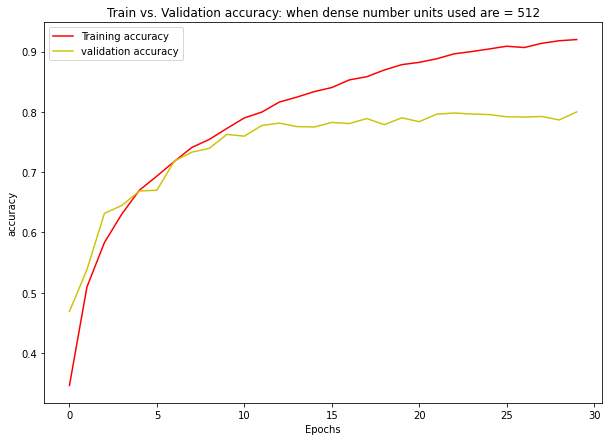

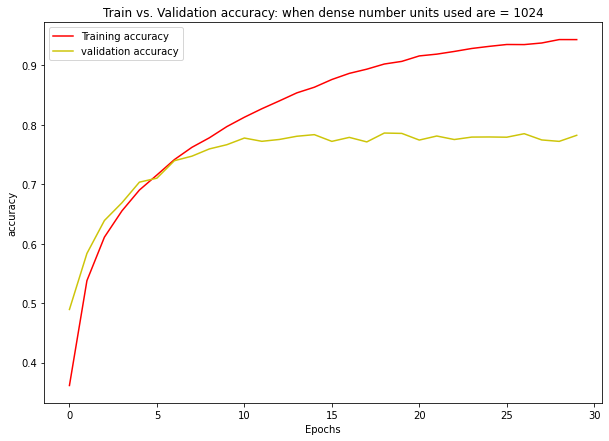

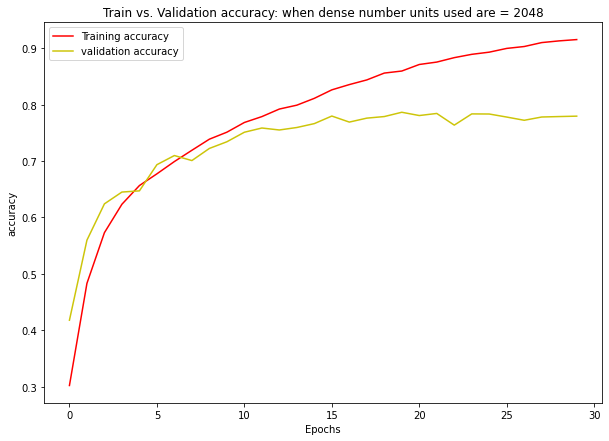

time: 1.69 s (started: 2022-05-28 17:16:54 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different stride values used
generate_accuracy_Plot(history_D, 'dense number units used are')

<p>When we compare the dense units used: 32, 64 and 128, 128 has a high validation accuracy but with alot of overfitting. 64 which is optimal has the lowest validation loss and it experiences less overfitting so we shall continue using 64 as the number of dense units. </p>

In [ ]:
# helper function that derives and return the different data frames for validation
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'number_of_units_used')


time: 2.34 ms (started: 2022-05-28 17:16:56 +00:00)


In [ ]:
val_loss_df

number_of_units_used  val_loss
0                    16  0.988100
1                    32  0.833027
2                    64  0.802818
3                   128  0.876280
4                   256  0.887972
5                   512  0.868204
6                  1024  0.983090
7                  2048  0.885573

time: 7.69 ms (started: 2022-05-28 17:16:56 +00:00)


In [ ]:
val_accuracy_df

number_of_units_used  val_accuracy_L
0                    16          0.7177
1                    32          0.7786
2                    64          0.8064
3                   128          0.7798
4                   256          0.7893
5                   512          0.7999
6                  1024          0.7822
7                  2048          0.7795

time: 6.31 ms (started: 2022-05-28 17:16:56 +00:00)


In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'number_of_units_used')

time: 1.83 ms (started: 2022-05-28 17:16:56 +00:00)


In [ ]:
train_loss_df

number_of_units_used  train_loss
0                    16    0.894451
1                    32    0.637075
2                    64    0.492960
3                   128    0.501984
4                   256    0.409103
5                   512    0.270833
6                  1024    0.215899
7                  2048    0.238560

time: 7.38 ms (started: 2022-05-28 17:16:56 +00:00)


In [ ]:
train_accuracy_df

number_of_units_used  train_accuracy
0                    16        0.756050
1                    32        0.850725
2                    64        0.908375
3                   128        0.899900
4                   256        0.933775
5                   512        0.980275
6                  1024        0.990000
7                  2048        0.983050

time: 6.44 ms (started: 2022-05-28 17:16:56 +00:00)


#### let's explore the dropout rate since we just increased the number of Convolution layers.

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
dropout_L = [round((i *0.1), 3) for i in range(1, 9)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(dropout_L)):
  print('Dropout rate being used is %.3f' %dropout_L[fact])
  model = models.Sequential()
  
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # added
  # To be model.add(layers.Dropout(dropout_L[fact]))

  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # To be added
  # model.add(layers.Dropout(dropout_L[fact]))

  model.add(layers.Conv2D(128, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(128, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #first dropout
  model.add(layers.Dropout(dropout_L[fact]))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  #last dropout
  model.add(layers.Dropout(dropout_L[fact]))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((dropout_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[dropout_L[fact]] = history

  # compute the loss and accuracy
  val_loss, val_acc = model.evaluate(valid_images, valid_labels)
  train_loss, train_accuracy = model.evaluate(train_images, train_labels)

  # append the train_loss val_loss of the current execution to the list
  train_loss_L.append([dropout_L[fact], train_loss])
  val_loss_L.append([dropout_L[fact], val_loss])

  # append the validation and training accuracy of the current execution to the list 
  train_accuracy_L.append([dropout_L[fact], train_accuracy])
  val_accuracy_L.append([dropout_L[fact], val_acc])

Dropout rate being used is 0.100
Epoch 1/30
400/400 [==============================] - 3s 7ms/step - loss: 1.9098 - accuracy: 0.3150 - val_loss: 1.5275 - val_accuracy: 0.4482
Epoch 2/30
400/400 [==============================] - 2s 6ms/step - loss: 1.5031 - accuracy: 0.4787 - val_loss: 1.4009 - val_accuracy: 0.5207
Epoch 3/30
400/400 [==============================] - 2s 6ms/step - loss: 1.3526 - accuracy: 0.5408 - val_loss: 1.2825 - val_accuracy: 0.5683
Epoch 4/30
400/400 [==============================] - 2s 6ms/step - loss: 1.2482 - accuracy: 0.5859 - val_loss: 1.1796 - val_accuracy: 0.6109
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1672 - accuracy: 0.6204 - val_loss: 1.1377 - val_accuracy: 0.6356
Epoch 6/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1034 - accuracy: 0.6472 - val_loss: 1.1022 - val_accuracy: 0.6543
Epoch 7/30
400/400 [==============================] - 2s 6ms/step - loss: 1.0510 - accuracy: 0.6688 - val_loss: 1.0

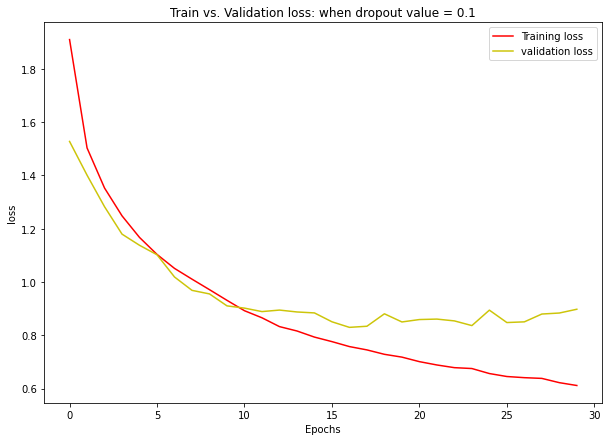

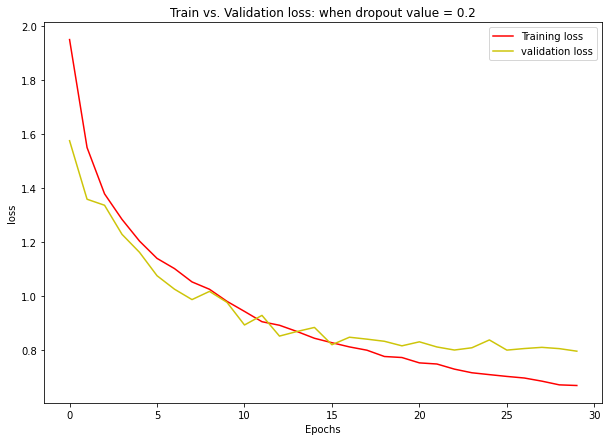

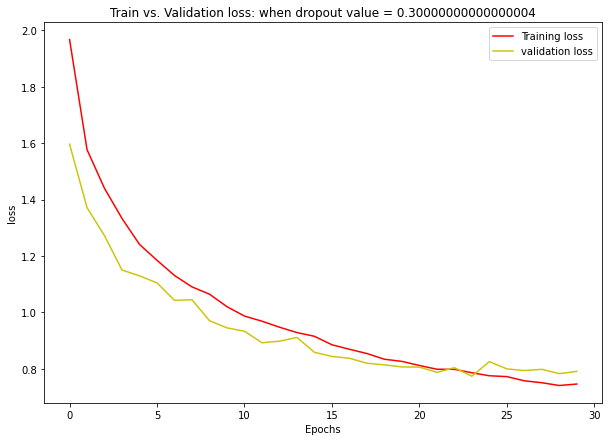

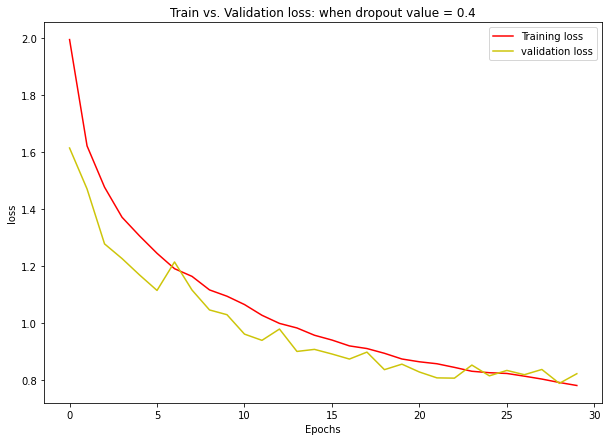

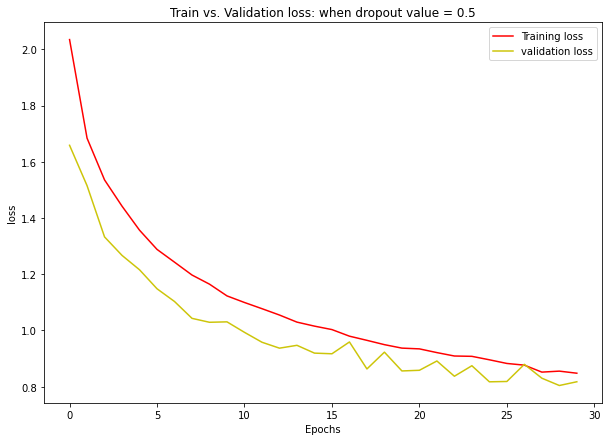

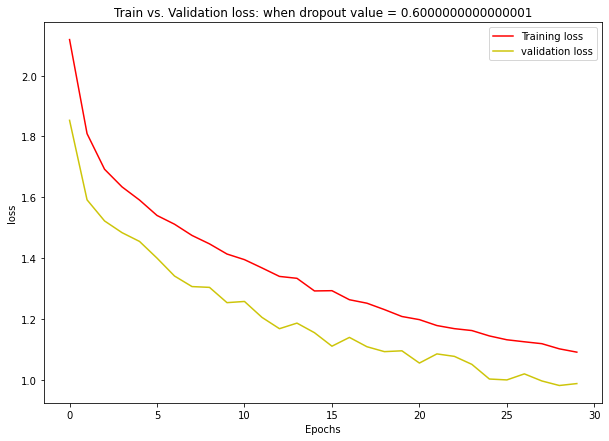

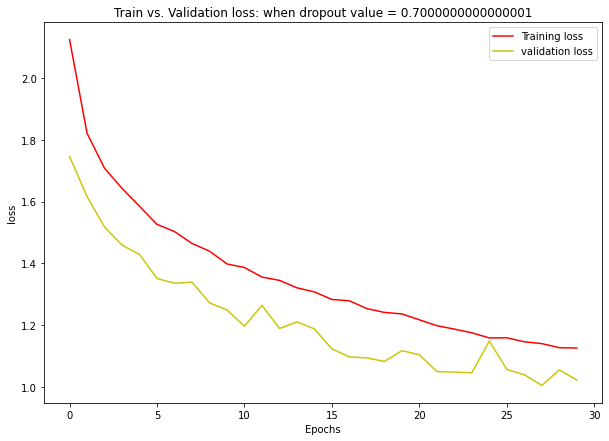

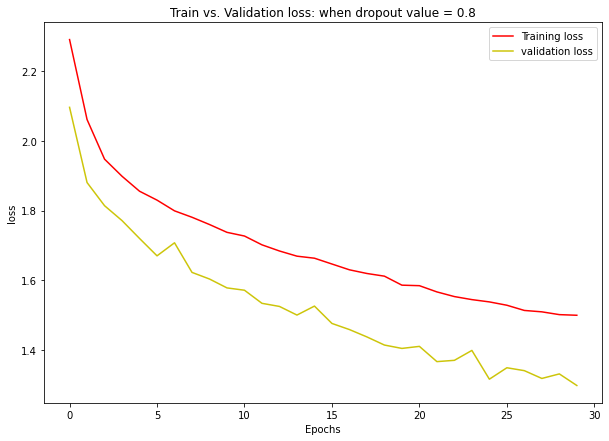

time: 1.65 s (started: 2022-05-28 17:27:26 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different dropout rates used
generatePlot(history_D, 'dropout value')

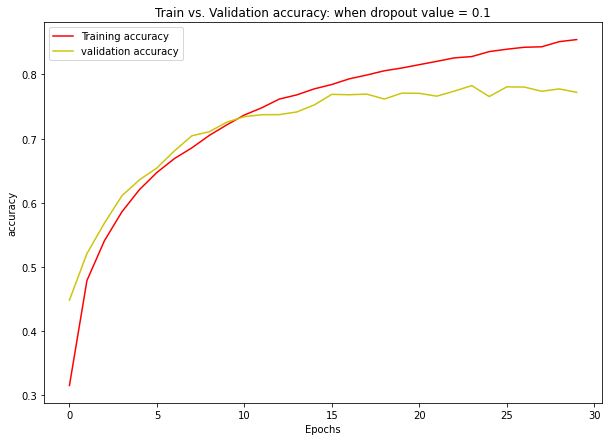

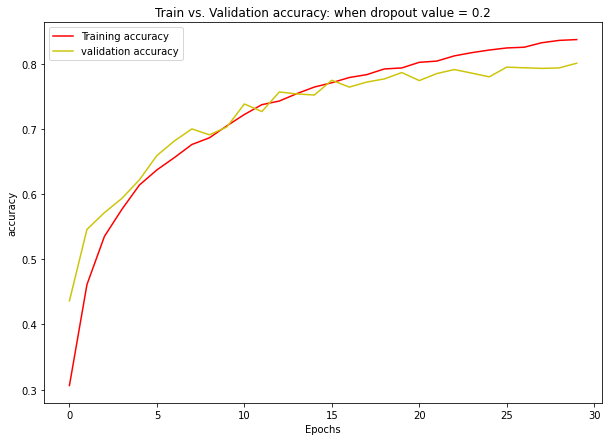

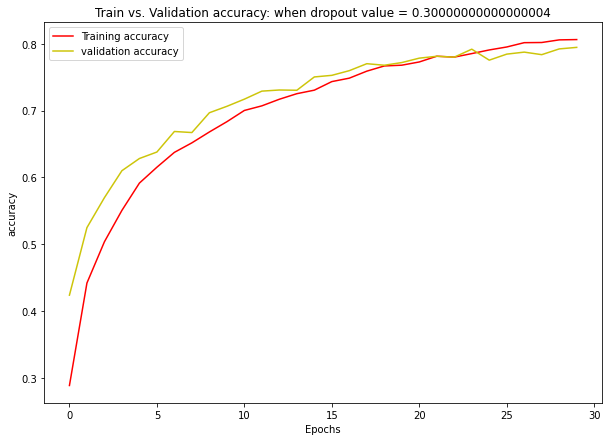

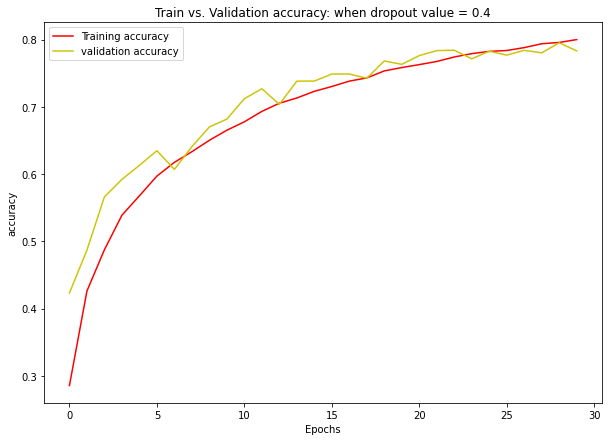

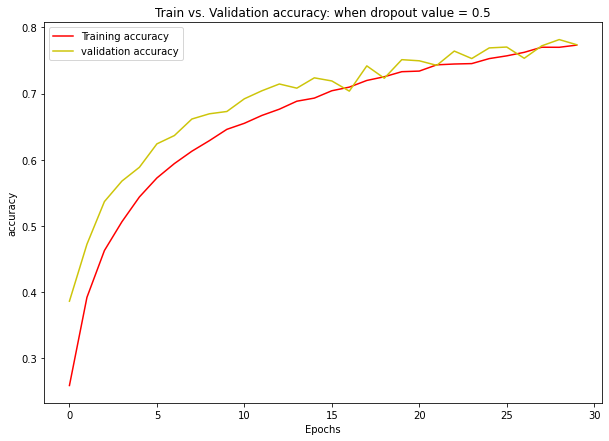

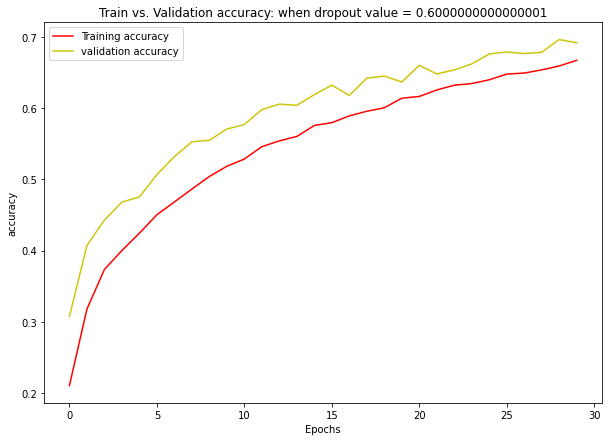

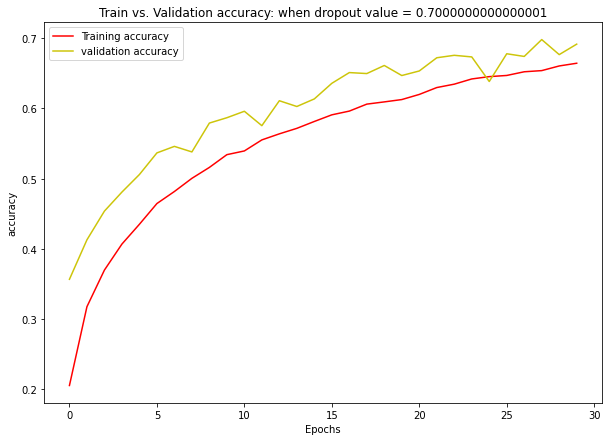

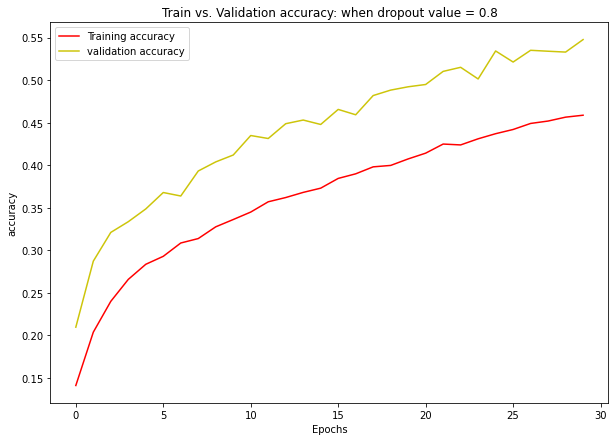

time: 1.67 s (started: 2022-05-28 17:27:28 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different dropout rates used
generate_accuracy_Plot(history_D, 'dropout value')

<p> As we shown above, the dropout rate of 0.8's training and validation accuracy  is so bumpy and unstable, which makes it unsuitable to be used as the optimal value. With 0.5, 0.6 and 0.7, the validation accuracy is higher than the training accuracy implying that the model is under training data. With 0.1, 0.2, 0.3 and  0.4, as the training epochs increases the training accuracy is higher than the validation accuracy. We observe 0.3 is the optimal dropout rate in this experiment since it experience less overfitting. </p>

In [ ]:
# helper function that derives and return the different data frames for dropout rates
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'dropout')

time: 3.09 ms (started: 2022-05-28 17:27:29 +00:00)


In [ ]:
val_loss_df

dropout  val_loss
0      0.1  0.897722
1      0.2  0.794932
2      0.3  0.790965
3      0.4  0.821186
4      0.5  0.817713
5      0.6  0.987571
6      0.7  1.023510
7      0.8  1.296815

time: 8.2 ms (started: 2022-05-28 17:27:29 +00:00)


In [ ]:
val_accuracy_df

dropout  val_accuracy_L
0      0.1          0.7722
1      0.2          0.8007
2      0.3          0.7944
3      0.4          0.7831
4      0.5          0.7738
5      0.6          0.6914
6      0.7          0.6916
7      0.8          0.5476

time: 6.34 ms (started: 2022-05-28 17:27:29 +00:00)


<p>We observe that 0.2 is the optimal dropout rate, however, we didnot see any changes in the validation loss since we are gettting a high value. So, we would rather move forward with results where added extra Convolutional layers to the network.</p>

In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'dropout')

time: 1.64 ms (started: 2022-05-28 17:27:29 +00:00)


In [ ]:
train_loss_df

dropout  train_loss
0      0.1    0.539953
1      0.2    0.528909
2      0.3    0.600097
3      0.4    0.642721
4      0.5    0.682684
5      0.6    0.914152
6      0.7    0.931912
7      0.8    1.273798

time: 5.03 ms (started: 2022-05-28 17:27:29 +00:00)


In [ ]:
train_accuracy_df

dropout  train_accuracy
0      0.1        0.882750
1      0.2        0.893825
2      0.3        0.859875
3      0.4        0.846025
4      0.5        0.825325
5      0.6        0.724875
6      0.7        0.723475
7      0.8        0.551025

time: 5.85 ms (started: 2022-05-28 17:27:29 +00:00)


#### More dropout rate exploration when the dropout layer is added after every activation layer. 

In [ ]:
seed = 7                                      # random seed to reproduce the same output
history_D = {}
val_loss_L = []                               # list of val_loss
val_accuracy_L = []                           # list of val accuracy
train_loss_L = []                             # list of train loss
train_accuracy_L = []                         # list of train accuracy
dropout_L = [round((i *0.1), 3) for i in range(1, 9)]
recordTime_L = []                             # list of run time execution for each mini batch size
for fact in range(len(dropout_L)):
  print('Dropout rate being used is %.3f' %dropout_L[fact])
  model = models.Sequential()
  
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # This is added
  model.add(layers.Dropout(dropout_L[fact]))

  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # This is added
  model.add(layers.Dropout(dropout_L[fact]))

  model.add(layers.Conv2D(128, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(128, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #first dropout
  model.add(layers.Dropout(dropout_L[fact]))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))

  #last dropout
  model.add(layers.Dropout(dropout_L[fact]))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above

  #print(learningRate_L[eta])
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile the model
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
  # startime
  startTime = time.time()
  # train the model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))
  # endtime
  endTime = time.time()

  recordTime_L.append((dropout_L[fact], endTime - startTime))
  # insert the history of the current execution into a dictionary.
  history_D[dropout_L[fact]] = history

  # compute the loss and accuracy
  val_loss, val_acc = model.evaluate(valid_images, valid_labels)
  train_loss, train_accuracy = model.evaluate(train_images, train_labels)

  # append the train_loss val_loss of the current execution to the list
  train_loss_L.append([dropout_L[fact], train_loss])
  val_loss_L.append([dropout_L[fact], val_loss])

  # append the validation and training accuracy of the current execution to the list 
  train_accuracy_L.append([dropout_L[fact], train_accuracy])
  val_accuracy_L.append([dropout_L[fact], val_acc])

Dropout rate being used is 0.100
Epoch 1/30
400/400 [==============================] - 4s 7ms/step - loss: 1.9302 - accuracy: 0.3207 - val_loss: 1.6001 - val_accuracy: 0.4336
Epoch 2/30
400/400 [==============================] - 2s 6ms/step - loss: 1.5797 - accuracy: 0.4447 - val_loss: 1.4415 - val_accuracy: 0.5115
Epoch 3/30
400/400 [==============================] - 2s 6ms/step - loss: 1.3986 - accuracy: 0.5217 - val_loss: 1.2640 - val_accuracy: 0.5814
Epoch 4/30
400/400 [==============================] - 2s 6ms/step - loss: 1.2845 - accuracy: 0.5720 - val_loss: 1.1798 - val_accuracy: 0.6205
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1986 - accuracy: 0.6120 - val_loss: 1.0991 - val_accuracy: 0.6524
Epoch 6/30
400/400 [==============================] - 2s 6ms/step - loss: 1.1350 - accuracy: 0.6390 - val_loss: 1.0584 - val_accuracy: 0.6639
Epoch 7/30
400/400 [==============================] - 2s 6ms/step - loss: 1.0929 - accuracy: 0.6571 - val_loss: 1.0

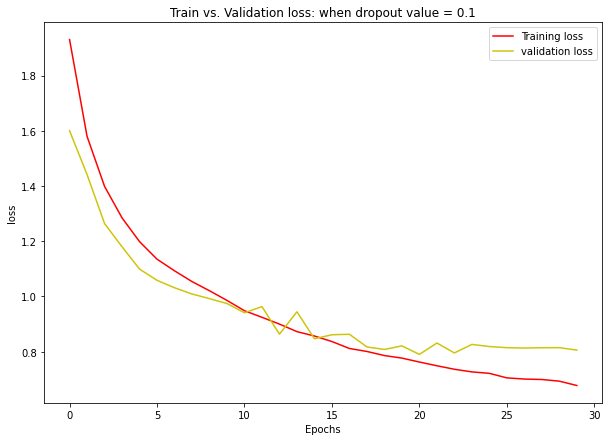

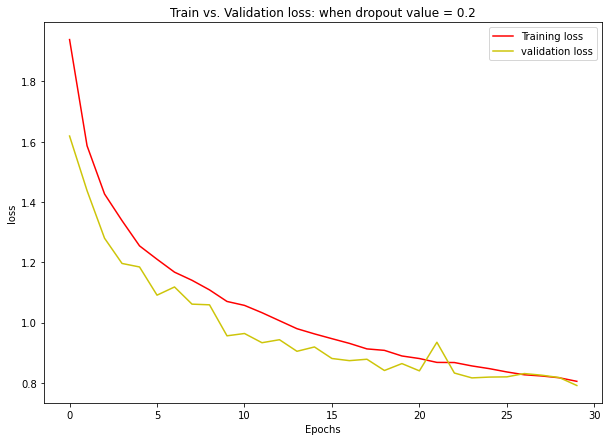

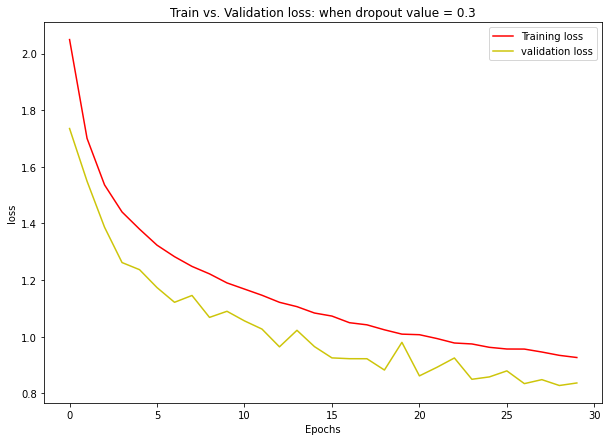

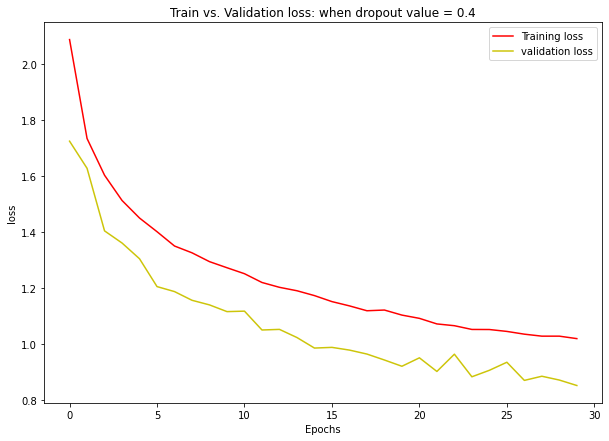

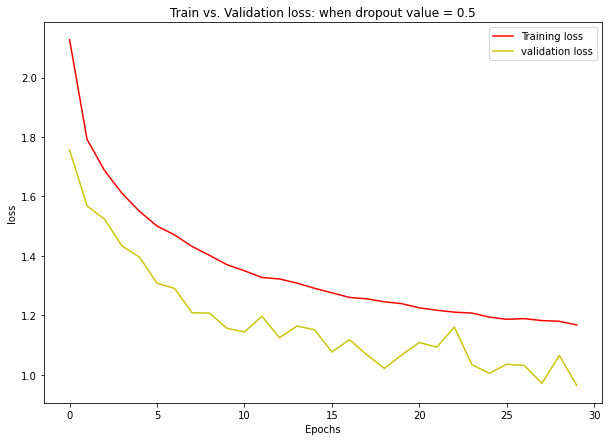

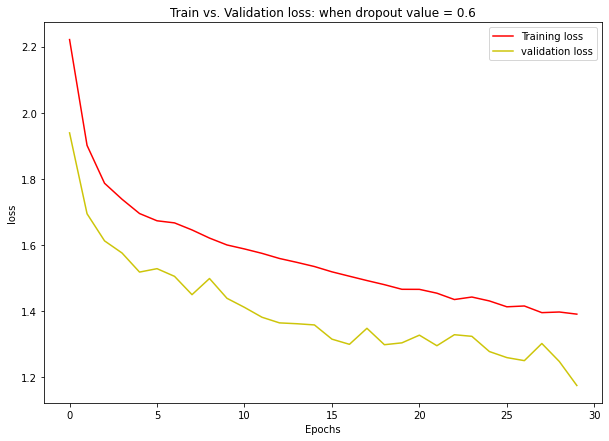

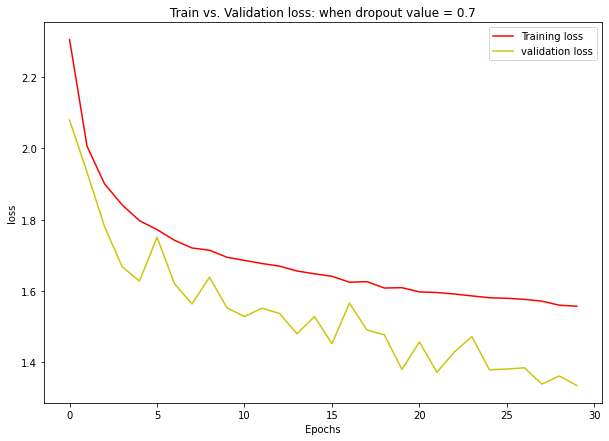

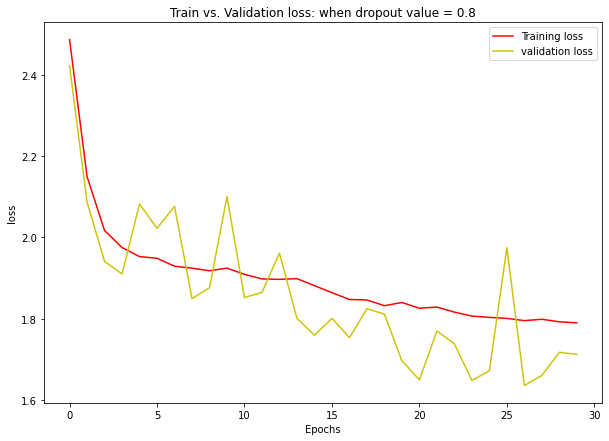

time: 1.61 s (started: 2022-05-28 17:38:19 +00:00)


In [ ]:
# a helper function used to prints the loss line charts for the different dropout rates used
generatePlot(history_D, 'dropout value')

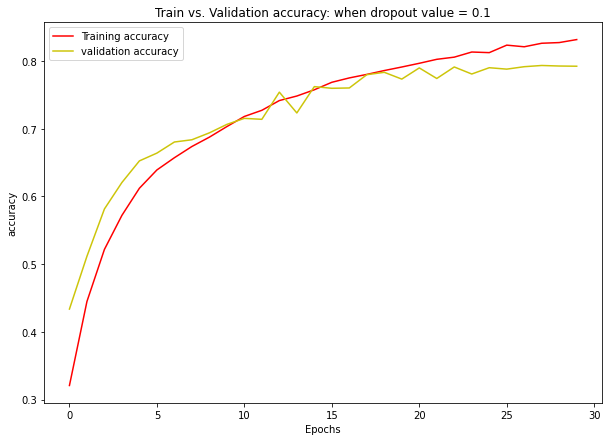

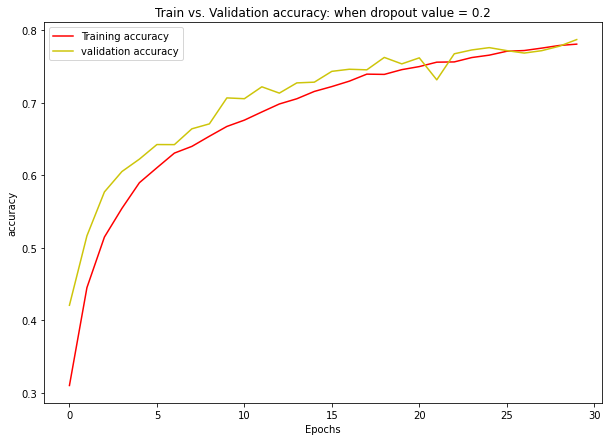

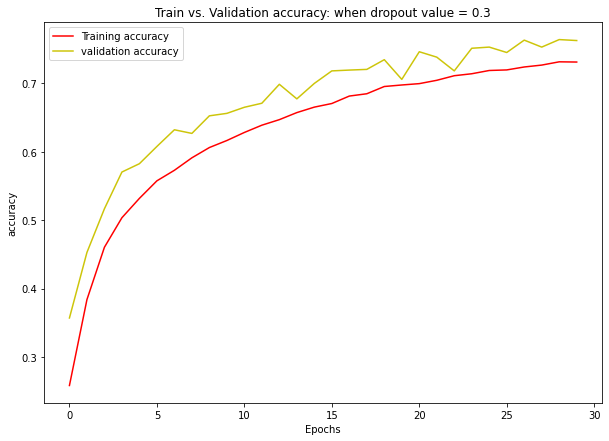

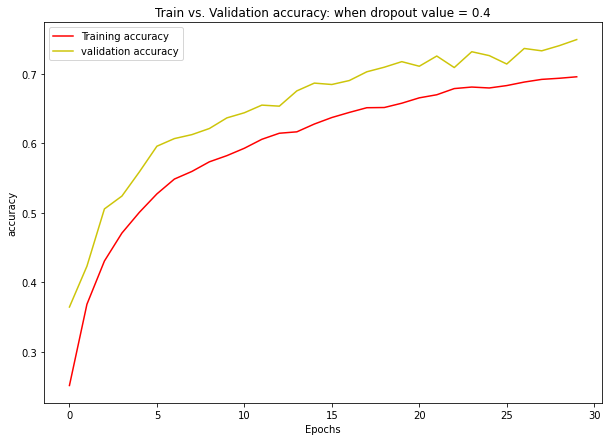

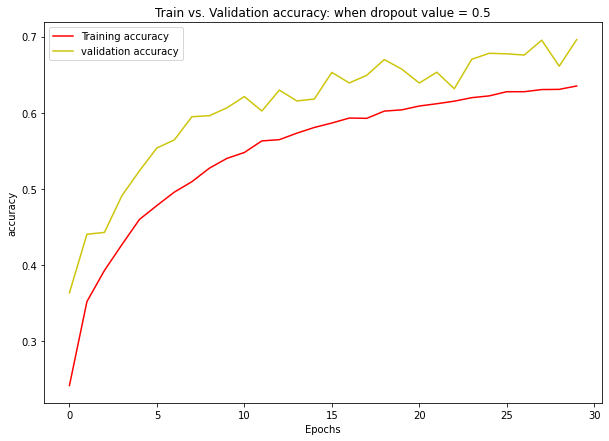

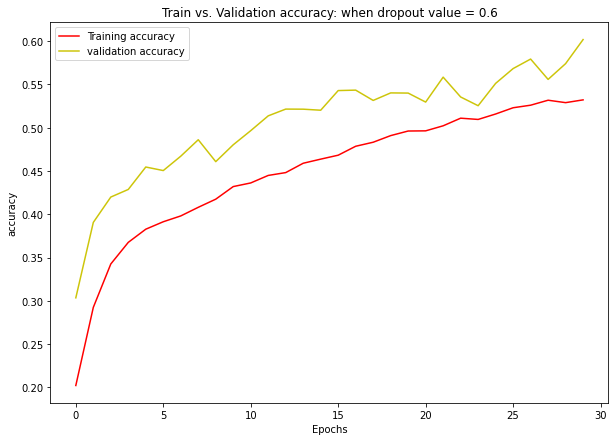

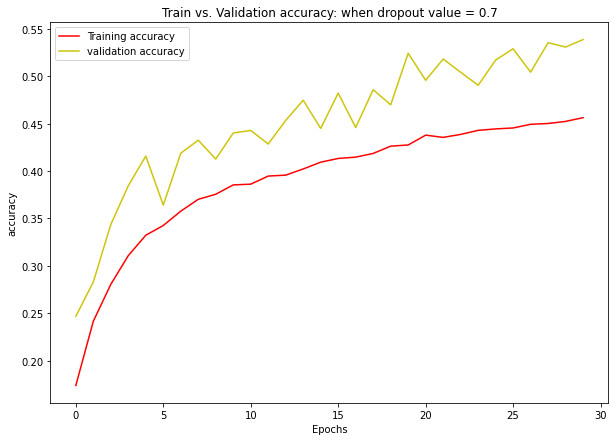

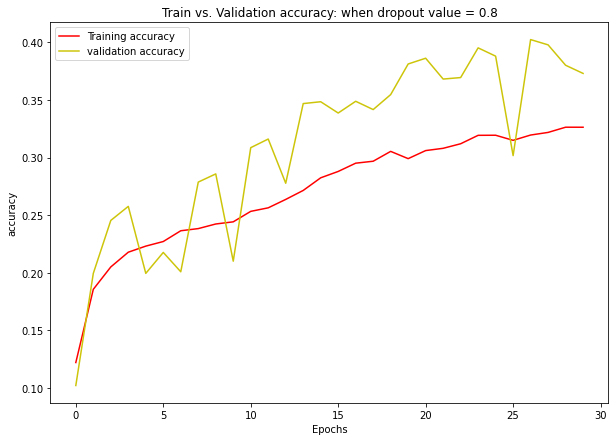

time: 1.94 s (started: 2022-05-28 17:38:21 +00:00)


In [ ]:
# a helper function used to prints the accuracy line charts for the different dropout rates used
generate_accuracy_Plot(history_D, 'dropout value')

In [ ]:
# helper function that derives and return the different data frames for dropout rates
val_loss_df, val_accuracy_df, recordTime_df = deriveDataFrame(val_loss_L, val_accuracy_L, recordTime_L, 'dropout')

time: 2.58 ms (started: 2022-05-28 17:38:23 +00:00)


In [ ]:
val_loss_df

dropout  val_loss
0      0.1  0.805597
1      0.2  0.790993
2      0.3  0.836448
3      0.4  0.853199
4      0.5  0.964149
5      0.6  1.175650
6      0.7  1.334120
7      0.8  1.712283

time: 7.04 ms (started: 2022-05-28 17:38:23 +00:00)


In [ ]:
val_accuracy_df

dropout  val_accuracy_L
0      0.1          0.7922
1      0.2          0.7872
2      0.3          0.7627
3      0.4          0.7495
4      0.5          0.6960
5      0.6          0.6018
6      0.7          0.5386
7      0.8          0.3731

time: 5.63 ms (started: 2022-05-28 17:38:23 +00:00)


In [ ]:
# helper function that returns the data frame for the train loss and accuracy
train_loss_df, train_accuracy_df= deriveAccuracy_df(train_loss_L, train_accuracy_L, 'dropout')

time: 1.39 ms (started: 2022-05-28 17:38:23 +00:00)


In [ ]:
train_accuracy_df

dropout  train_accuracy
0      0.1        0.887100
1      0.2        0.847225
2      0.3        0.795275
3      0.4        0.773500
4      0.5        0.716075
5      0.6        0.607650
6      0.7        0.540300
7      0.8        0.375250

time: 6.9 ms (started: 2022-05-28 17:38:23 +00:00)


## Adding Batch Normalization

Batch Normalization is used to standardize the input images before or after the activation of the previous layer, in our case we shall add it after the activation function of the previous layer so that the model can attain the best peformance.

In [ ]:
#seed = 7                                      # random seed to reproduce the same output
model = models.Sequential()
  
model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
 

model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
  
#last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

#print(learningRate_L[eta])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# compile the model
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

# train the model
history_batchNorm = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, 
                      validation_data=(valid_images, valid_labels))


Epoch 1/30
400/400 [==============================] - 4s 8ms/step - loss: 1.8312 - accuracy: 0.4486 - val_loss: 2.3544 - val_accuracy: 0.2721
Epoch 2/30
400/400 [==============================] - 3s 7ms/step - loss: 1.2986 - accuracy: 0.6271 - val_loss: 1.3202 - val_accuracy: 0.6168
Epoch 3/30
400/400 [==============================] - 3s 7ms/step - loss: 1.0838 - accuracy: 0.7019 - val_loss: 1.3200 - val_accuracy: 0.6240
Epoch 4/30
400/400 [==============================] - 3s 7ms/step - loss: 0.9718 - accuracy: 0.7340 - val_loss: 1.2282 - val_accuracy: 0.6583
Epoch 5/30
400/400 [==============================] - 3s 7ms/step - loss: 0.8869 - accuracy: 0.7616 - val_loss: 1.0485 - val_accuracy: 0.7088
Epoch 6/30
400/400 [==============================] - 3s 7ms/step - loss: 0.8207 - accuracy: 0.7844 - val_loss: 0.9634 - val_accuracy: 0.7361
Epoch 7/30
400/400 [==============================] - 3s 7ms/step - loss: 0.7869 - accuracy: 0.7971 - val_loss: 0.9612 - val_accuracy: 0.7375
Epoch 

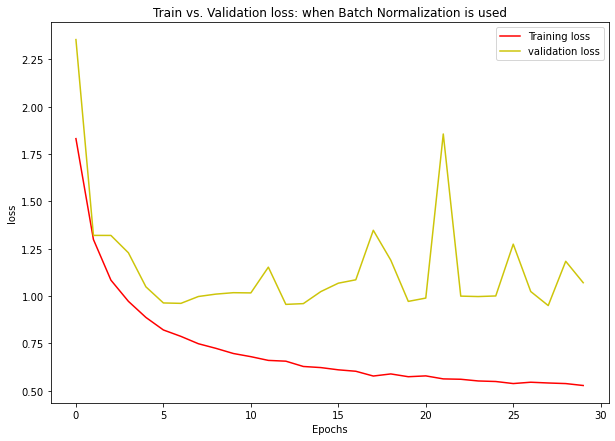

time: 178 ms (started: 2022-05-28 17:39:46 +00:00)


In [ ]:
# set the figure
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), history_batchNorm.history['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), history_batchNorm.history['val_loss'], '#cdc50a')
plt.title('Train vs. Validation loss: when Batch Normalization is used')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'validation loss'])
plt.show()

<Figure size 720x504 with 0 Axes>

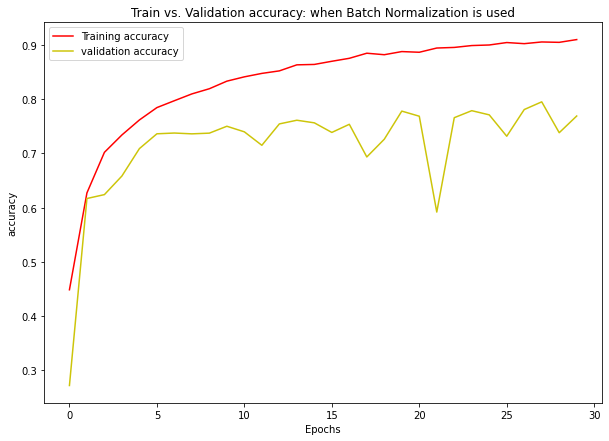

time: 186 ms (started: 2022-05-28 17:39:46 +00:00)


In [ ]:
# set the figure
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), history_batchNorm.history['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), history_batchNorm.history['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation accuracy: when Batch Normalization is used')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['Training accuracy', 'validation accuracy'])
plt.show()

In [ ]:
# create a data frame containing the loss and accuracy of the model
data = {'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        'val_loss': history_batchNorm.history['val_loss'], 
        'val_accuracy': history_batchNorm.history['val_accuracy'],
        'loss':history_batchNorm.history['loss'],
        'training accuracy':history_batchNorm.history['accuracy']}
# create a data frame
val_accuracy_loss_df = pd.DataFrame(data)

time: 4.39 ms (started: 2022-05-28 17:39:46 +00:00)


In [ ]:
# sort the data frame by validation accuracy
val_accuracy_loss_df.sort_values(by=['val_accuracy'], inplace=True, ascending=False) # the first five records
print(val_accuracy_loss_df)

    Epoch  val_loss  val_accuracy      loss  training accuracy
27     28  0.949543        0.7950  0.540647           0.905375
26     27  1.023703        0.7808  0.544636           0.902250
23     24  0.997141        0.7787  0.551304           0.898750
19     20  0.971570        0.7779  0.573718           0.887650
24     25  1.000250        0.7710  0.548466           0.899800
29     30  1.070232        0.7689  0.527339           0.909775
20     21  0.989125        0.7685  0.578133           0.886400
22     23  0.999391        0.7658  0.560307           0.895300
13     14  0.959798        0.7611  0.627832           0.863200
14     15  1.023399        0.7563  0.621987           0.863950
12     13  0.955810        0.7543  0.655820           0.852075
16     17  1.085639        0.7536  0.602577           0.875250
9      10  1.017538        0.7500  0.696357           0.833125
10     11  1.016390        0.7397  0.679663           0.841075
15     16  1.067749        0.7386  0.610157           0

## qa

In [ ]:
data_augmentation = Sequential([layers.RandomFlip("horizontal", input_shape=(32,32,3)
                                                ),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomFlip(mode='horizontal_and_vertical'),
    layers.RandomContrast(0.1),
    
    
    #layers.RandomWidth(0.1),
  ]
)

time: 18.6 ms (started: 2022-05-28 17:39:46 +00:00)


In [ ]:
resize_and_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1./255)                                         
])

time: 4.8 ms (started: 2022-05-28 17:39:46 +00:00)


In [ ]:
model = tf.keras.Sequential([
   #resize_and_rescale,
   data_augmentation,
   layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)),                 
   layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', kernel_regularizer=l2(0.001), activation='relu'),
   layers.BatchNormalization(),
   layers.MaxPooling2D((2, 2)),

   layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'),
   layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'),
   layers.BatchNormalization(),
   layers.MaxPooling2D((2, 2)),

   layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'),
   layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'),
   layers.BatchNormalization(),
   layers.MaxPooling2D((2, 2)),

   #first dropout
   layers.Dropout(0.2),
   layers.Flatten(),
   layers.Dense(64, activation='relu'),
   # adding Batch Normalization layers
   layers.BatchNormalization(),

   #last dropout
   layers.Dropout(0.2),
   layers.Dense(10, activation='softmax')  # As noted above

])
#print(learningRate_L[eta])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# compile the model
model.compile(optimizer=opt,
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # For TF2
              loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

# train the model
history_Aug = model.fit(train_images, to_categorical(train_labels), epochs=EPOCHS, batch_size=32, 
                      validation_data=(valid_images, to_categorical(valid_labels)))

Epoch 1/30
400/400 [==============================] - 6s 10ms/step - loss: 2.2598 - accuracy: 0.2974 - val_loss: 2.8267 - val_accuracy: 0.1618
Epoch 2/30
400/400 [==============================] - 4s 9ms/step - loss: 1.9177 - accuracy: 0.3905 - val_loss: 1.8342 - val_accuracy: 0.4124
Epoch 3/30
400/400 [==============================] - 4s 9ms/step - loss: 1.7832 - accuracy: 0.4277 - val_loss: 2.0598 - val_accuracy: 0.3800
Epoch 4/30
400/400 [==============================] - 4s 9ms/step - loss: 1.6834 - accuracy: 0.4594 - val_loss: 2.0096 - val_accuracy: 0.3526
Epoch 5/30
400/400 [==============================] - 4s 9ms/step - loss: 1.5974 - accuracy: 0.4850 - val_loss: 1.5903 - val_accuracy: 0.4913
Epoch 6/30
400/400 [==============================] - 4s 9ms/step - loss: 1.5326 - accuracy: 0.5073 - val_loss: 1.7453 - val_accuracy: 0.4649
Epoch 7/30
400/400 [==============================] - 4s 9ms/step - loss: 1.4827 - accuracy: 0.5274 - val_loss: 1.8752 - val_accuracy: 0.4337
Epoch

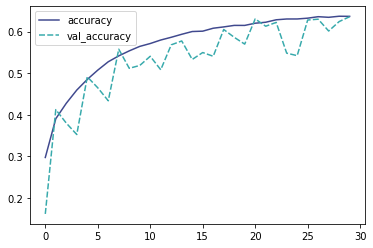

time: 247 ms (started: 2022-05-28 17:56:41 +00:00)


In [ ]:
import seaborn as sns
# create a data frame derive the different plots
df_history = pd.DataFrame(history_Aug.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="mako", linewidth=1.5);

## More Experiment on Data Augmentation

In [ ]:
seed = 7
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#first dropout
#model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
  
#last dropout
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
#history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, validation_data=(valid_images, valid_labels))
history = model.fit(datagen.flow(train_images, to_categorical(train_labels), batch_size=32), 
                              epochs=EPOCHS, 
                              validation_data=datagen.flow(valid_images, to_categorical(valid_labels)), steps_per_epoch= train_images.shape[0]/32
                              )

Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_552 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_553 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_330 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_554 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_555 (Conv2D)         (None, 16, 16, 64)     

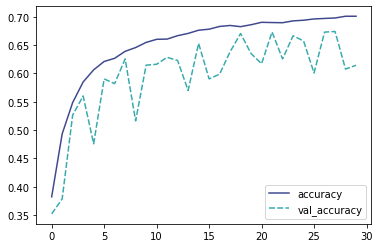

time: 207 ms (started: 2022-05-28 18:27:22 +00:00)


In [ ]:
import seaborn as sns
# create a data frame derive the different plots
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="mako", linewidth=1.5);

## last experiment on data arugumentation


0.25 did n't work.

In [ ]:
seed = 7
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
  
#last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
#history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, validation_data=(valid_images, valid_labels))
history = model.fit(datagen.flow(train_images, to_categorical(train_labels), batch_size=32), 
                              epochs=EPOCHS, 
                              validation_data=datagen.flow(valid_images, to_categorical(valid_labels)), 
                    steps_per_epoch= train_images.shape[0]/32
                              )

Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_672 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_673 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_104 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_390 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_674 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_675 (Conv2D)         (None, 16, 16, 64)     

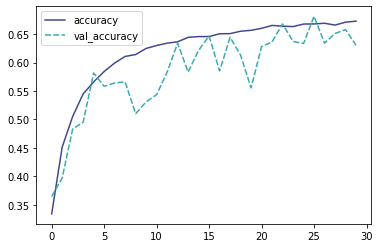

time: 219 ms (started: 2022-05-28 20:19:46 +00:00)


In [ ]:
import seaborn as sns
# create a data frame derive the different plots
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="mako", linewidth=1.5);

## experiment 2

In [ ]:
seed = 7
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
  
#last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
#history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, validation_data=(valid_images, valid_labels))
history = model.fit(datagen.flow(train_images, to_categorical(train_labels), batch_size=32), 
                              epochs=EPOCHS, 
                              validation_data=datagen.flow(valid_images, to_categorical(valid_labels)), 
                    steps_per_epoch= train_images.shape[0]/32
                              )

Model: "sequential_163"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_678 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_679 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_108 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_393 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_680 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_681 (Conv2D)         (None, 16, 16, 64)     

### constant added

#### Aug

In [ ]:
datagen=ImageDataGenerator(
    # Set input mean to 0 over the dataset, featurewise
    #featurewise_center=True,

    # Set each sample mean to 0 
    #samplewise_center=False, 
    
    # Divide inputs by the std of the dataset, feature-wise
    #featurewise_std_normalization=True, 
    
    # Apply ZCA whitening
    zca_whitening=True, 
    
    # Degree range of random rotations
    # it was 20
    rotation_range=20, 
    
    # Range for random zoom
    zoom_range=0.2, 
    
    # fraction of total width
    width_shift_range=0.1, 
    
    # fraction of total height
    height_shift_range=0.1, 
    
    # randomly flip inputs horizontally
    horizontal_flip=True,
    
    # randomly flips inputs vertically
    # vertical_flip=True

    # fraction of images reversed for validation 
    #validation_split=0.2,

    shear_range=0.2,
    # fill_mode='constant',
    # fill_mode='reflect'
    # cval=125
    # values greater than 1.0 make the image brighter [0.5, 1.0]
    # values greater than 1.0 make a darker image like [1.0, 2.0] 
    brightness_range=[2.0,1.0]

 )

# computes the internal data stats related to the data-dependent transformations.
datagen.fit(train_images)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


time: 5.42 s (started: 2022-05-28 23:01:36 +00:00)


In [ ]:
seed = 7
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#first dropout
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# adding Batch Normalization layers
model.add(layers.BatchNormalization())
  
#last dropout
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
#history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, validation_data=(valid_images, valid_labels))
history = model.fit(datagen.flow(train_images, to_categorical(train_labels), batch_size=32), 
                              epochs=30, 
                              validation_data=datagen.flow(valid_images, to_categorical(valid_labels)), 
                    steps_per_epoch= train_images.shape[0]/32
                              )

Model: "sequential_180"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_780 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_781 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_176 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_444 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_782 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_783 (Conv2D)         (None, 16, 16, 64)     

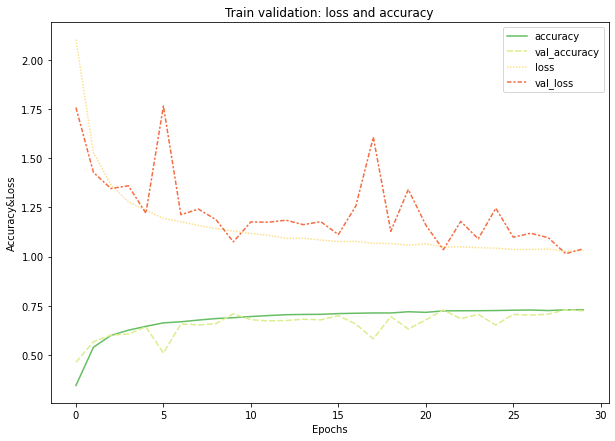

time: 271 ms (started: 2022-05-29 00:15:39 +00:00)


In [ ]:
import seaborn as sns
# create a data frame derive the different plots
plt.figure(figsize=(10, 7))
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy', 'loss', 'val_loss']], palette="RdYlGn_r", linewidth=1.5);
plt.ylabel('Accuracy&Loss')
plt.xlabel('Epochs')
plt.title('Train validation: loss and accuracy');

#### Make the predictions and write the results to a csv file

In [ ]:
# let's make the required predictions
predictions = model.predict([test_images])

time: 901 ms (started: 2022-05-29 00:15:48 +00:00)


In [ ]:
# let's convert a numpy array into a list
predictions_L = predictions.tolist()

# helper function that writes predictions Results to a csv file
writeResultsToCsv(predictions_L)

time: 136 ms (started: 2022-05-29 00:15:51 +00:00)


## GridSearch

In [ ]:
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

time: 1.21 ms (started: 2022-05-29 02:25:06 +00:00)


In [ ]:
def deriveModelWithDropout(dropout_rate=0.0):
  """Function that derives and return the network model"""
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  # adding Batch Normalization layers
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))


  model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  # adding Batch Normalization layers
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), strides=(1,1) ,padding='same', kernel_regularizer=l2(0.001), activation='relu'))
  # adding Batch Normalization layers
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  #first dropout
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  # adding Batch Normalization layers
  model.add(layers.BatchNormalization())
  
  #last dropout
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above
  # model.summary()

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

# train the model
#history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=100, validation_data=(valid_images, valid_labels))
"""
history = model.fit(datagen.flow(train_images, to_categorical(train_labels), batch_size=32), 
                              epochs=10, 
                              validation_data=datagen.flow(valid_images, to_categorical(valid_labels)), 
                    steps_per_epoch= train_images.shape[0]/32
                              )
"""

'\nhistory = model.fit(datagen.flow(train_images, to_categorical(train_labels), batch_size=32), \n                              epochs=10, \n                              validation_data=datagen.flow(valid_images, to_categorical(valid_labels)), \n                    steps_per_epoch= train_images.shape[0]/32\n                              )\n'

time: 35.2 ms (started: 2022-05-29 02:25:08 +00:00)


In [ ]:
# define the parameters
grid_paramters = {
    'batch_size' : [32, 64], 
    'dropout_rate' : [0.0, 0.1, 0.2, 0.3],
    #'epochs' : [10, 25, 30]
    }

time: 1.33 ms (started: 2022-05-29 02:25:15 +00:00)


In [ ]:
# create the model 
# keep the verbose to zero so that we don't display all the details of each epoc
model_history_dropout =  KerasClassifier(build_fn=deriveModelWithDropout, epochs=25, verbose=2)

time: 1.47 ms (started: 2022-05-29 02:25:21 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# create an estimator object
random_est = RandomizedSearchCV(estimator=model_history_dropout, param_distributions=grid_paramters, cv=5, n_iter=100, n_jobs=-1)

NameError: ignored

In [ ]:
# search the whole space with fit
randomSearch_res = random_est.fit(train_images, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


# custom classes

In [3]:
input_slice = slice(0, 5)
input_slice

slice(0, 5, None)

In [6]:
np.arange(7)[input_slice]

array([0, 1, 2, 3, 4])